# <center> Physics-guided descriptors for prediction of structural polymorphs 
## <center> (ML model: creation and test)
### <center> Bastien F. Grosso, Nicola A. Spaldin, and Aria Mansouri Tehrani
### <center> for questions or remarks: bastien.grosso@mat.ethz.ch

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from time import time
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from collections import OrderedDict
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
import glob
from sklearn.model_selection import GridSearchCV
from numpy import random
from numpy.linalg import norm

In [3]:
# Set a random seed to ensure reproducibility across runs
RNG_SEED = 64
np.random.seed(seed=RNG_SEED)

# Importing the data from the csv files and preparing it for the fitting

In [4]:
PATH = './Distortion_modes_Descriptors_data/'

data_path1 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_1modes_minbond_1.8.csv')
data_path2 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_2modes_minbond_1.8.csv')
data_path3 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_3modes_minbond_1.8.csv')
data_path4 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_4modes_minbond_1.8.csv')
data_path5 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_5modes_minbond_1.8.csv')
data_path6 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_6modes_minbond_1.8.csv')
data_path7 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_7modes_minbond_1.8.csv')


data_path1_15 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_1modes_minbond_1.5.csv')
data_path2_15 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_2modes_minbond_1.5.csv')
data_path3_15 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_3modes_minbond_1.5.csv')
data_path4_15 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_4modes_minbond_1.5.csv')
data_path5_15 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_5modes_minbond_1.5.csv')
data_path6_15 = os.path.join(PATH, 'EnergyModes_amplitudes_Random_6modes_minbond_1.5.csv')


dp1 = pd.read_csv(data_path1)
dp2 = pd.read_csv(data_path2)
dp3 = pd.read_csv(data_path3)
dp4 = pd.read_csv(data_path4)
dp5 = pd.read_csv(data_path5)
dp6 = pd.read_csv(data_path6)
dp7 = pd.read_csv(data_path7)

dq1 = pd.read_csv(data_path1_15)
dq2 = pd.read_csv(data_path2_15)
dq3 = pd.read_csv(data_path3_15)
dq4 = pd.read_csv(data_path4_15)
dq5 = pd.read_csv(data_path5_15)
dq6 = pd.read_csv(data_path6_15)


In [5]:
bool_invalid_E1 = dp1['E'] < -2000
bool_invalid_E2 = dp2['E'] < -2000
bool_invalid_E3 = dp3['E'] < -2000
bool_invalid_E4 = dp4['E'] < -2000
bool_invalid_E5 = dp5['E'] < -2000
bool_invalid_E6 = dp6['E'] < -2000
bool_invalid_E7 = dp7['E'] < -2000

bool_invalid_E1_15 = dq1['E'] < -2000
bool_invalid_E2_15 = dq2['E'] < -2000
bool_invalid_E3_15 = dq3['E'] < -2000
bool_invalid_E4_15 = dq4['E'] < -2000
bool_invalid_E5_15 = dq5['E'] < -2000
bool_invalid_E6_15 = dq6['E'] < -2000

dp1_train = dp1.drop(dp1.loc[bool_invalid_E1].index, axis=0)
dp2_train = dp2.drop(dp2.loc[bool_invalid_E2].index, axis=0)
dp3_train = dp3.drop(dp3.loc[bool_invalid_E3].index, axis=0)
dp4_train = dp4.drop(dp4.loc[bool_invalid_E4].index, axis=0)
dp5_train = dp5.drop(dp5.loc[bool_invalid_E5].index, axis=0)
dp6_train = dp6.drop(dp6.loc[bool_invalid_E6].index, axis=0)
dp7_train = dp7.drop(dp7.loc[bool_invalid_E7].index, axis=0)

dq1_train= dq1.drop(dq1.loc[bool_invalid_E1_15].index, axis=0)
dq2_train = dq2.drop(dq2.loc[bool_invalid_E2_15].index, axis=0)
dq3_train = dq3.drop(dq3.loc[bool_invalid_E3_15].index, axis=0)
dq4_train = dq4.drop(dq4.loc[bool_invalid_E4_15].index, axis=0)
dq5_train = dq5.drop(dq5.loc[bool_invalid_E5_15].index, axis=0)
dq6_train = dq6.drop(dq6.loc[bool_invalid_E6_15].index, axis=0)

dp_train = pd.concat([dp1_train,dp2_train,dp3_train,dp4_train,dp5_train,dp6_train,dp7_train])

dq_train = pd.concat([dq1_train,dq2_train,dq3_train,dq4_train,dq5_train,dq6_train])

dp_train.shape

(6433, 29)

In [6]:
#for dq: getting rid of min bond between 1.5 and 1.8 to be consistent with dp
bool_invalid_min_d = dq_train['min_d'] > 1.8
dq_train = dq_train[bool_invalid_min_d]
dq_train.shape

(3136, 29)

In [7]:
#combining two batches:
df_train = pd.concat([dp_train, dq_train])

df_train.shape

(9569, 29)

In [8]:
X = df_train[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12','M13','M14','M15','M16','M17','M18','M19','M20','M21']]
y = df_train['E']

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (9569, 21)
Shape of y: (9569,)


In [9]:
df1_train = pd.concat([dp1_train, dq1_train])
bool_invalid_min_d = []
bool_invalid_min_d = df1_train['min_d'] > 1.8
dff1_train = df1_train[bool_invalid_min_d]

df2_train = pd.concat([dp2_train, dq2_train])
bool_invalid_min_d = []
bool_invalid_min_d = df2_train['min_d'] > 1.8
dff2_train = df2_train[bool_invalid_min_d]

df3_train = pd.concat([dp3_train, dq3_train])
bool_invalid_min_d = []
bool_invalid_min_d = df3_train['min_d'] > 1.8
dff3_train = df3_train[bool_invalid_min_d]

df4_train = pd.concat([dp4_train, dq4_train])
bool_invalid_min_d = []
bool_invalid_min_d = df4_train['min_d'] > 1.8
dff4_train = df4_train[bool_invalid_min_d]

df5_train = pd.concat([dp5_train, dq5_train])
bool_invalid_min_d = []
bool_invalid_min_d = df5_train['min_d'] > 1.8
dff5_train = df5_train[bool_invalid_min_d]

df6_train = pd.concat([dp6_train, dq6_train])
bool_invalid_min_d = []
bool_invalid_min_d = df6_train['min_d'] > 1.8
dff6_train = df6_train[bool_invalid_min_d]

df7_train = pd.concat([dp7_train])
bool_invalid_min_d = []
bool_invalid_min_d = df7_train['min_d'] > 1.8
dff7_train = df7_train[bool_invalid_min_d]

print(dff1_train.shape[0] + dff2_train.shape[0] + dff3_train.shape[0] + dff4_train.shape[0] + dff5_train.shape[0] + dff6_train.shape[0] + dff7_train.shape[0])

9569


# Visualization of the data

In [13]:
def plot_energies(df_train,Nmodes,nbins,lim_count,decomp=0):
    
    ref_GS = -33.55
    ref_R3c_cub = -33.334
    ref_cub = -32.68
    
    y = df_train['E']
    
    title_plot = str(Nmodes)+'modes'+ ' / ' + str(len(y))+' data'
        
    print(str(Nmodes)+" modes, number of entries : ",len(y), " / min of energy : ", min(y)-ref_GS, " / max of energy : ", max(y)-ref_GS)
    
    fig,ax = plt.subplots(figsize=(12,12))
    plt.hist(y-ref_GS, bins=nbins, alpha = 0.5);
    plt.title(title_plot)
    plt.xticks([0,0.5,1,1.5,2,2.5,3],['0','0.5','1','1.5','2','2.5','3'],fontsize=40)
    plt.yticks([0,50,100,150,200,250,300,350],['0','50','100','150','200','250','300','350'],fontsize=40)
    plt.xlim(-0.05,3)
    plt.ylim(0,lim_count)
    plt.grid(b=True, which='major', color='gray', alpha=0.2, linestyle='dashdot', lw=1)
    plt.axvline(x=ref_cub-ref_GS,color='r', linestyle='--',lw=3)
    plt.axvline(x=ref_GS-ref_GS,color='g', linestyle='-',lw=3)
    plt.axvline(x=ref_R3c_cub-ref_GS,color='g', linestyle='--',lw=3)
    plt.xlabel('Energy [eV]',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    
    titl_fig = "Histogram_" + str(Nmodes) + "modes.png"


All modes, number of entries :  9569  / min of energy :  0.20649669937499482  / max of energy :  5.894585159999998
1 modes, number of entries :  1922  / min of energy :  0.2634633049999948  / max of energy :  2.565059629999997
2 modes, number of entries :  1768  / min of energy :  0.2162710249999975  / max of energy :  4.276433052499996
3 modes, number of entries :  1574  / min of energy :  0.21713859499999444  / max of energy :  5.894585159999998
4 modes, number of entries :  1424  / min of energy :  0.2320865924999964  / max of energy :  4.333409557499998
5 modes, number of entries :  1266  / min of energy :  0.20649669937499482  / max of energy :  3.954966728749998
6 modes, number of entries :  1139  / min of energy :  0.23106153437499444  / max of energy :  3.410215686249998
7 modes, number of entries :  476  / min of energy :  0.2734591149999943  / max of energy :  2.9748083937499956


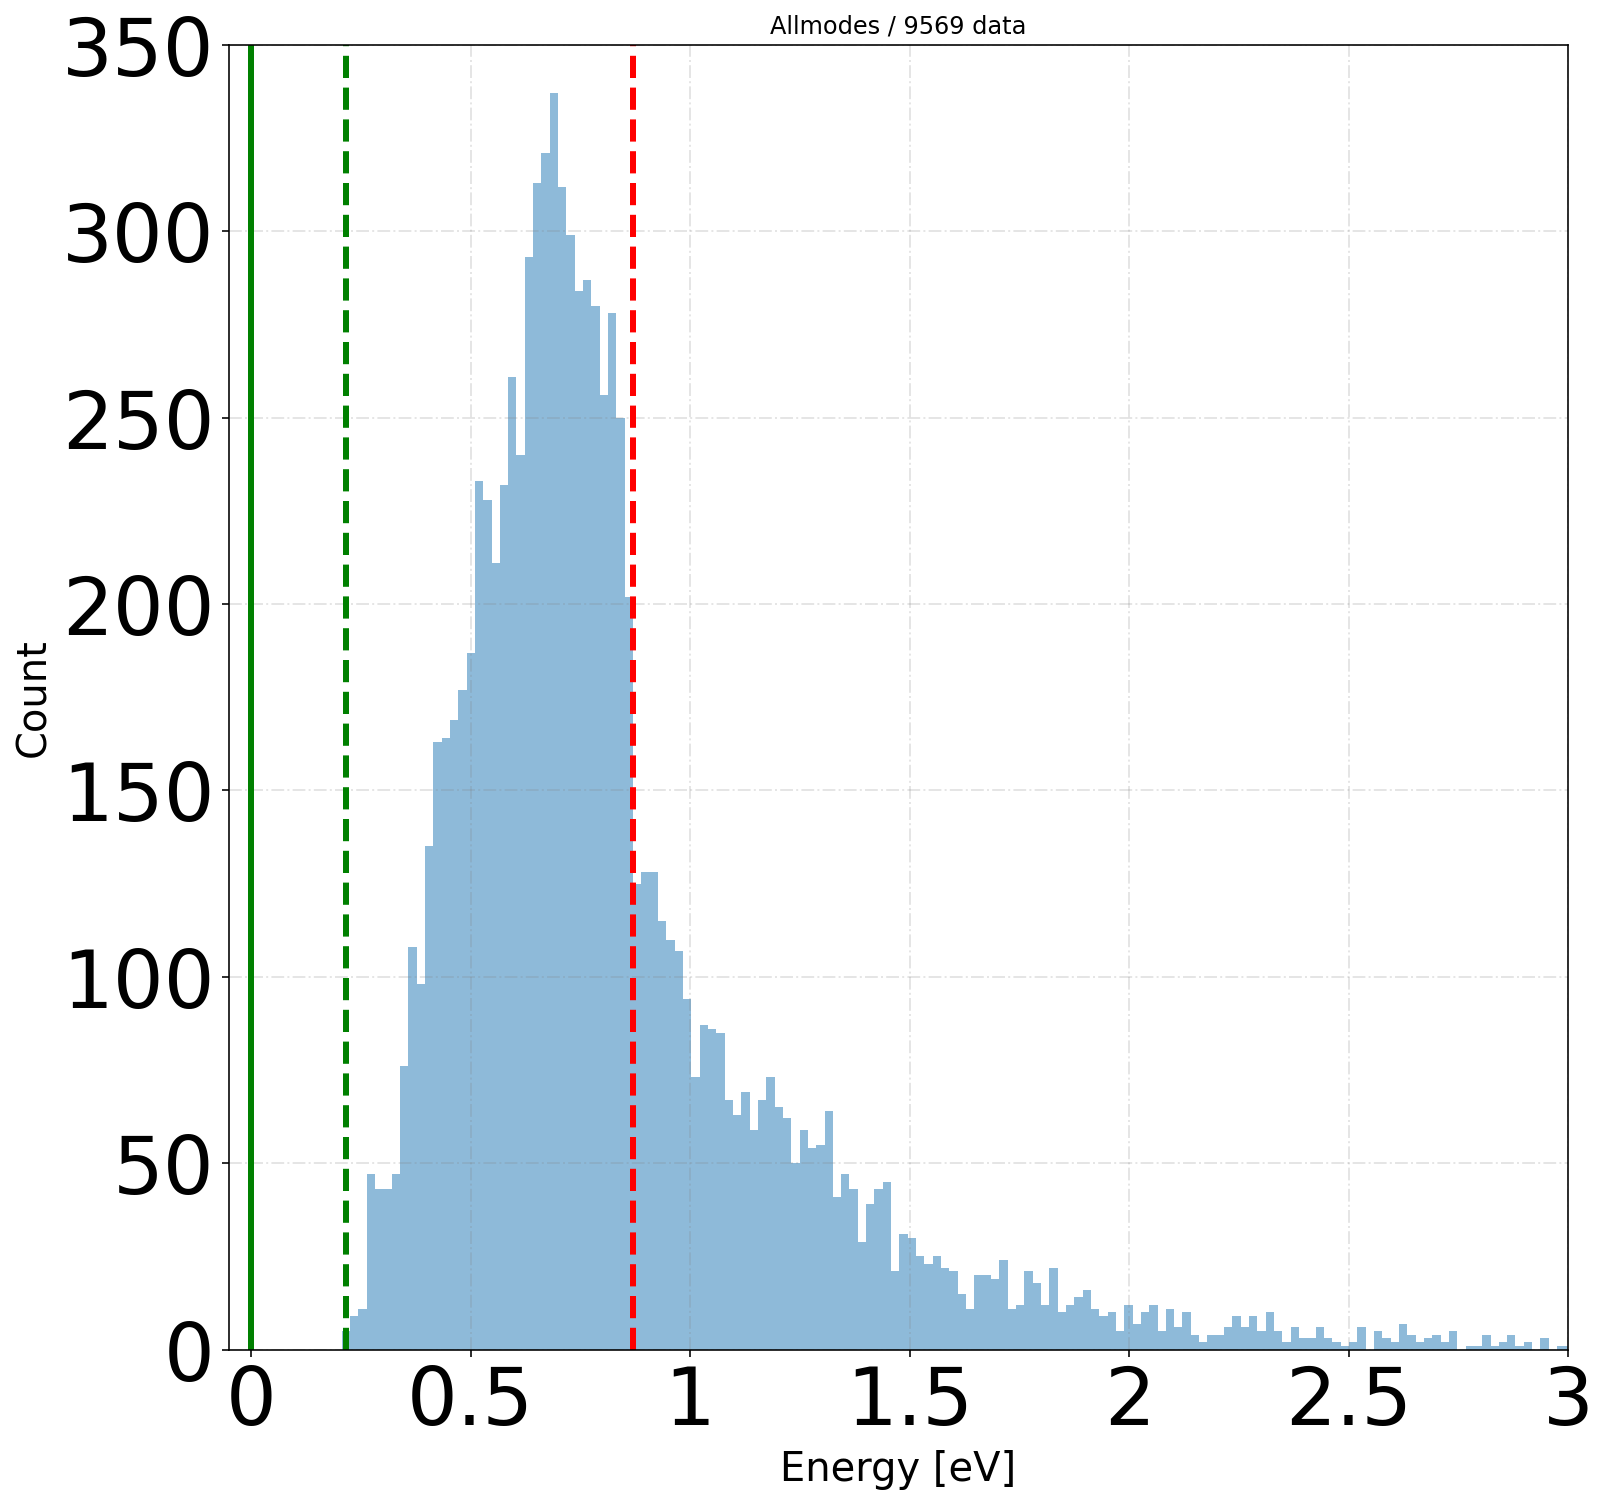

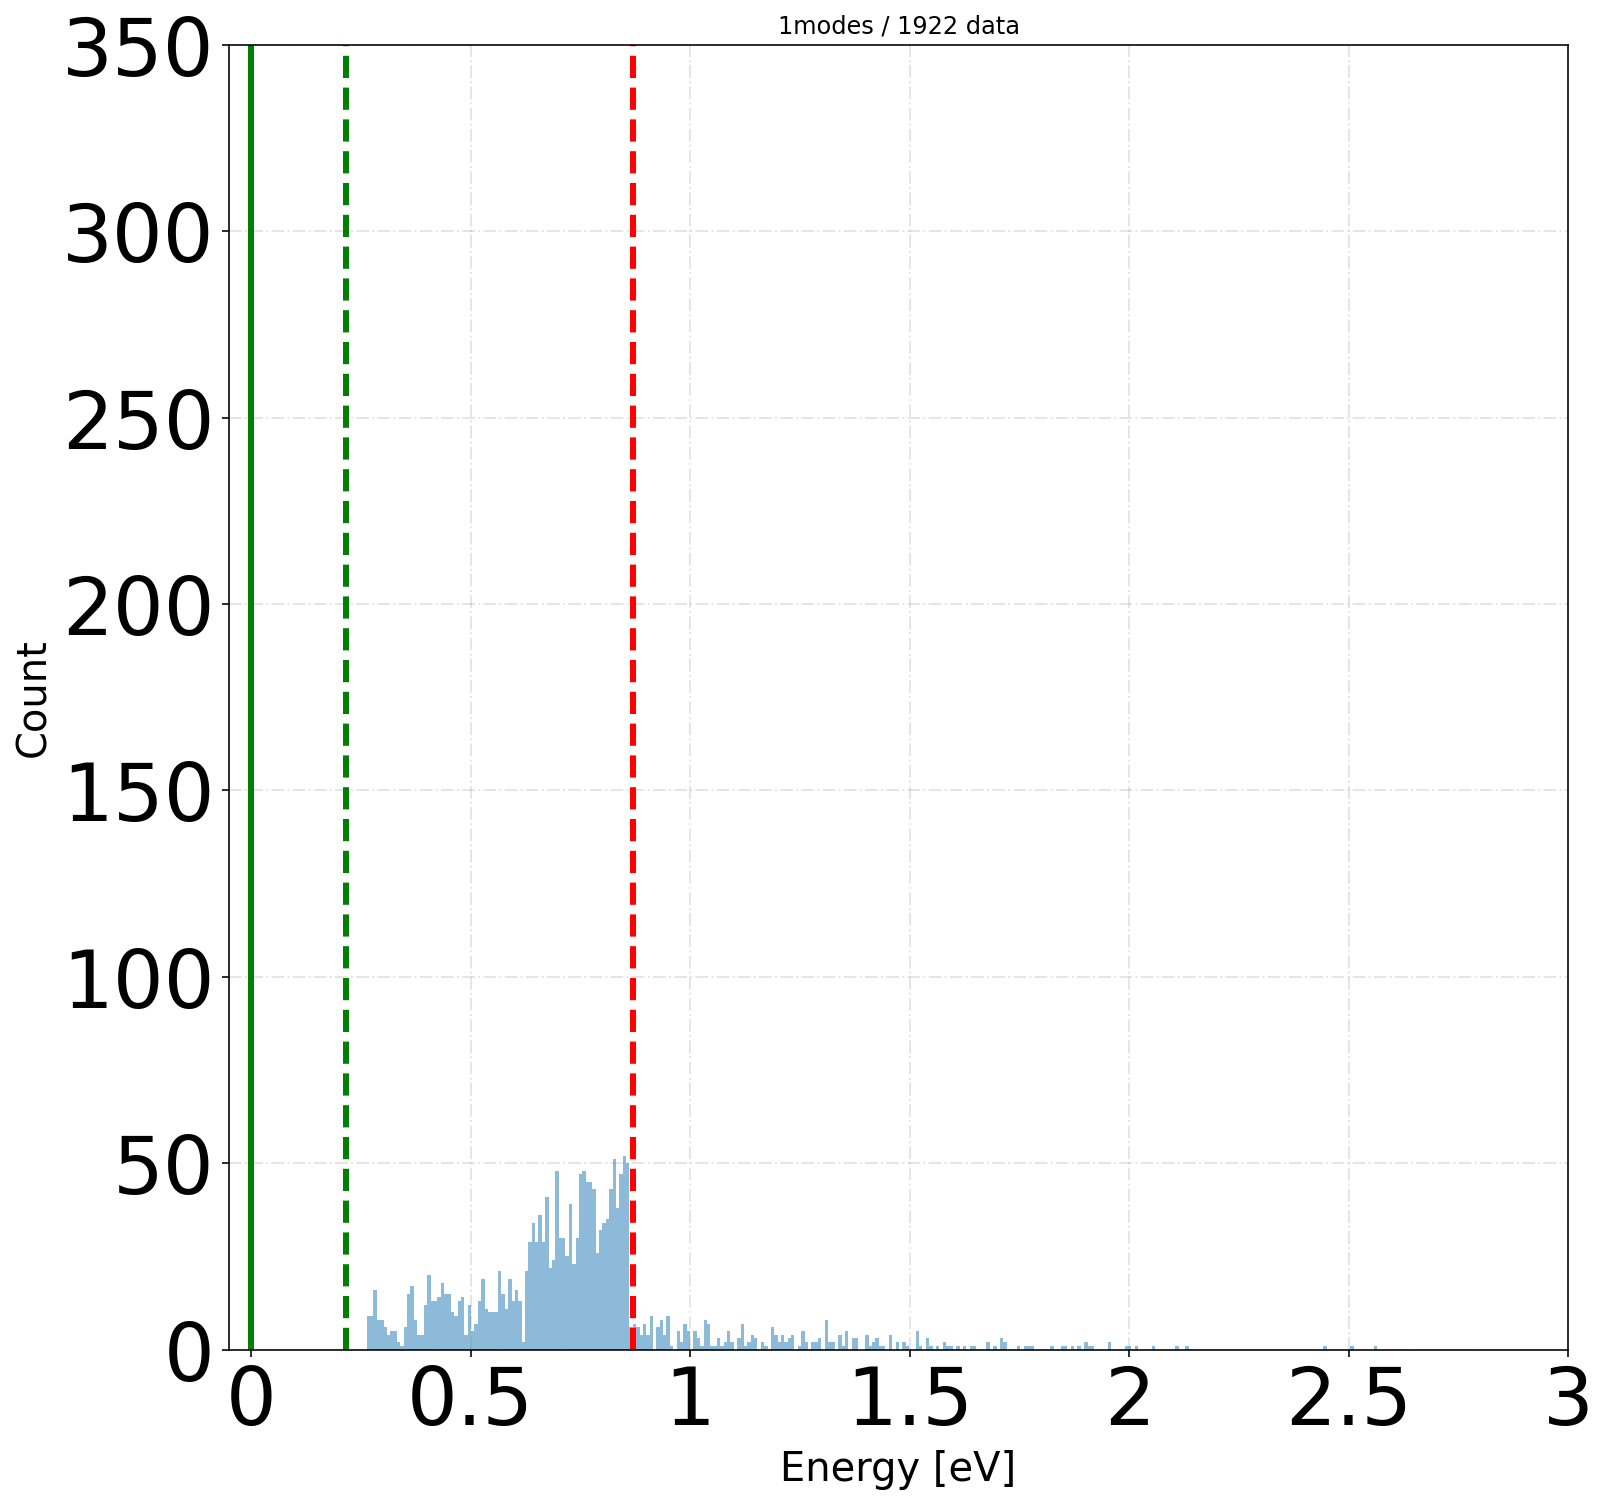

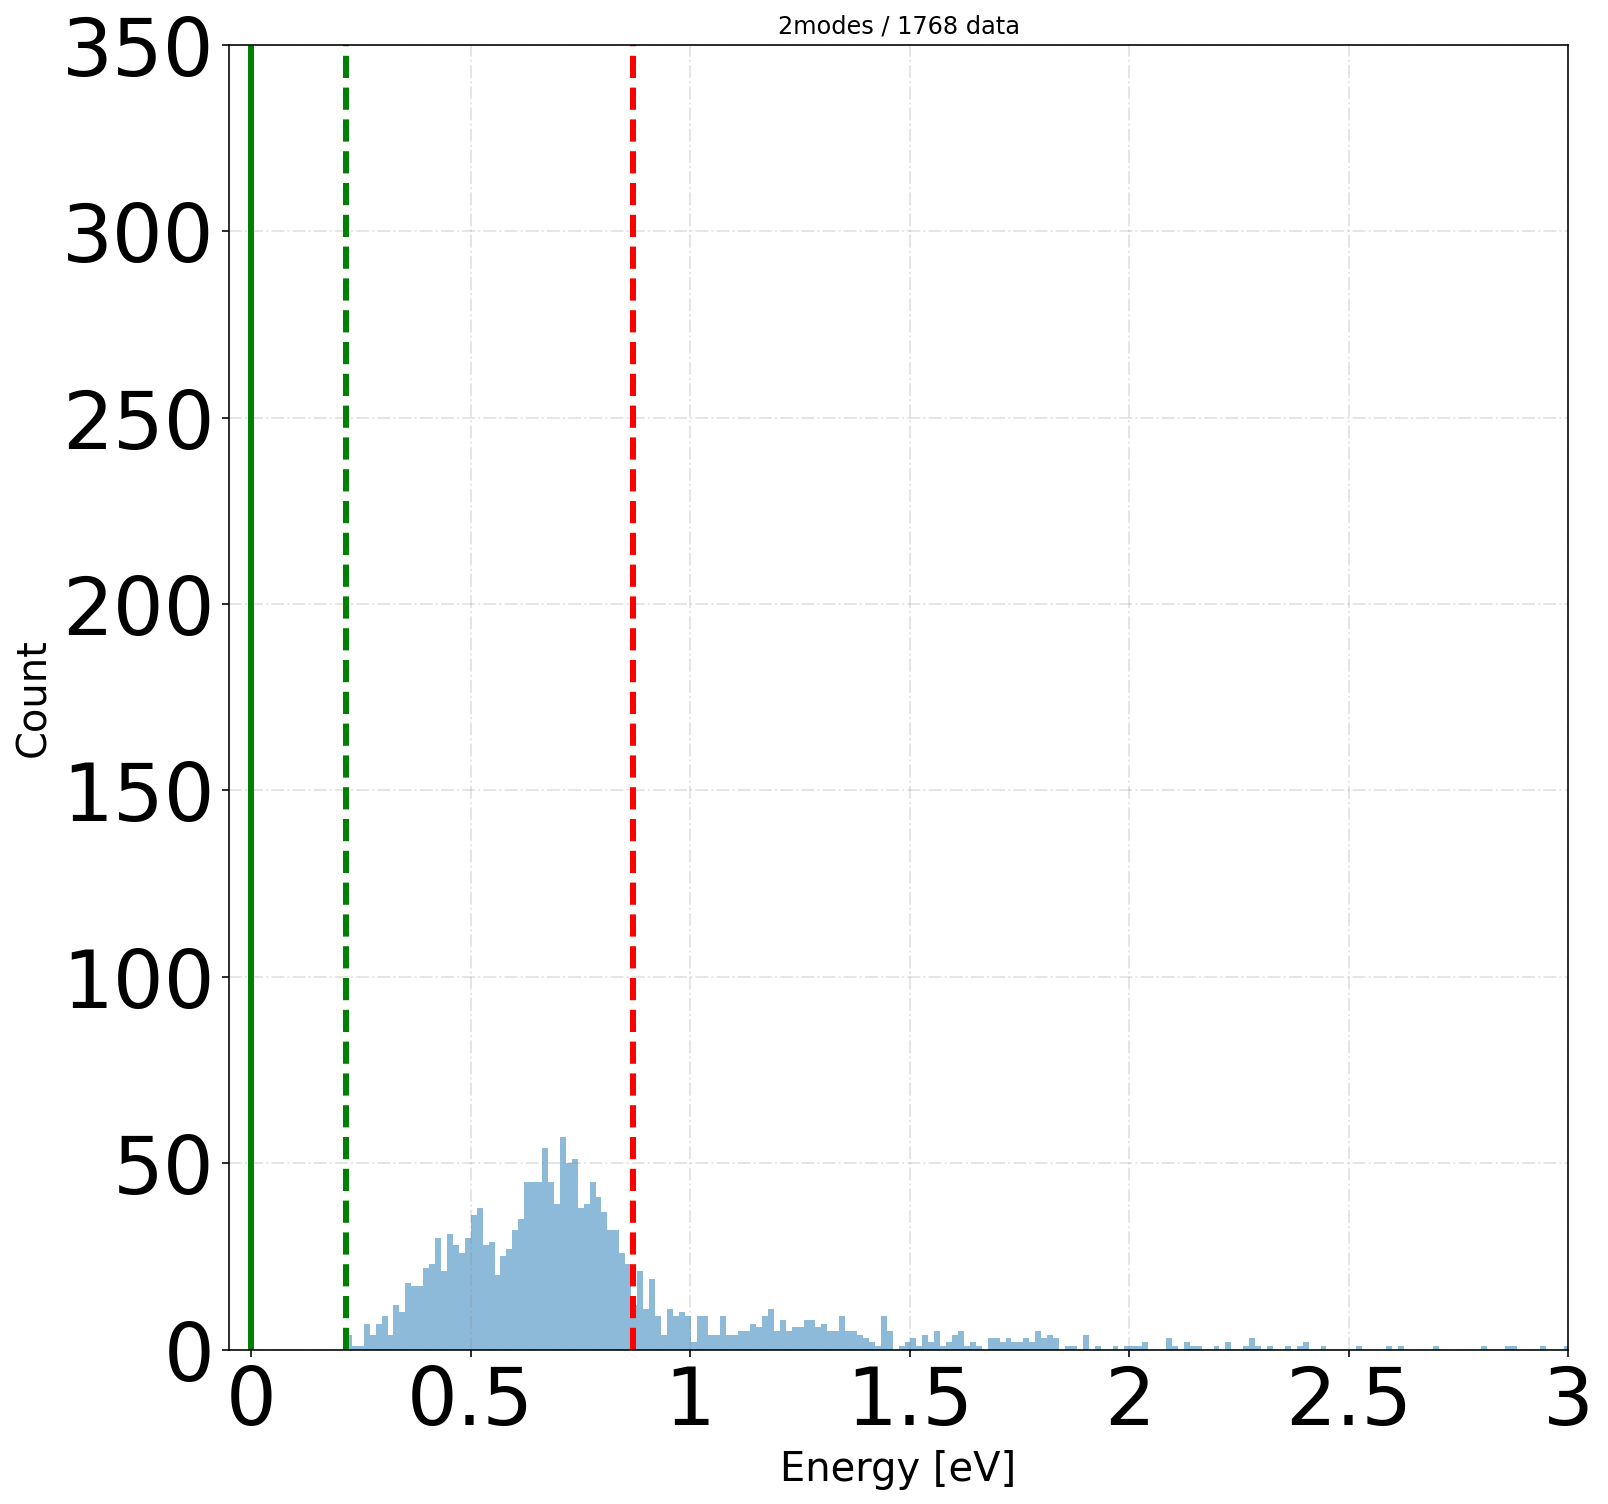

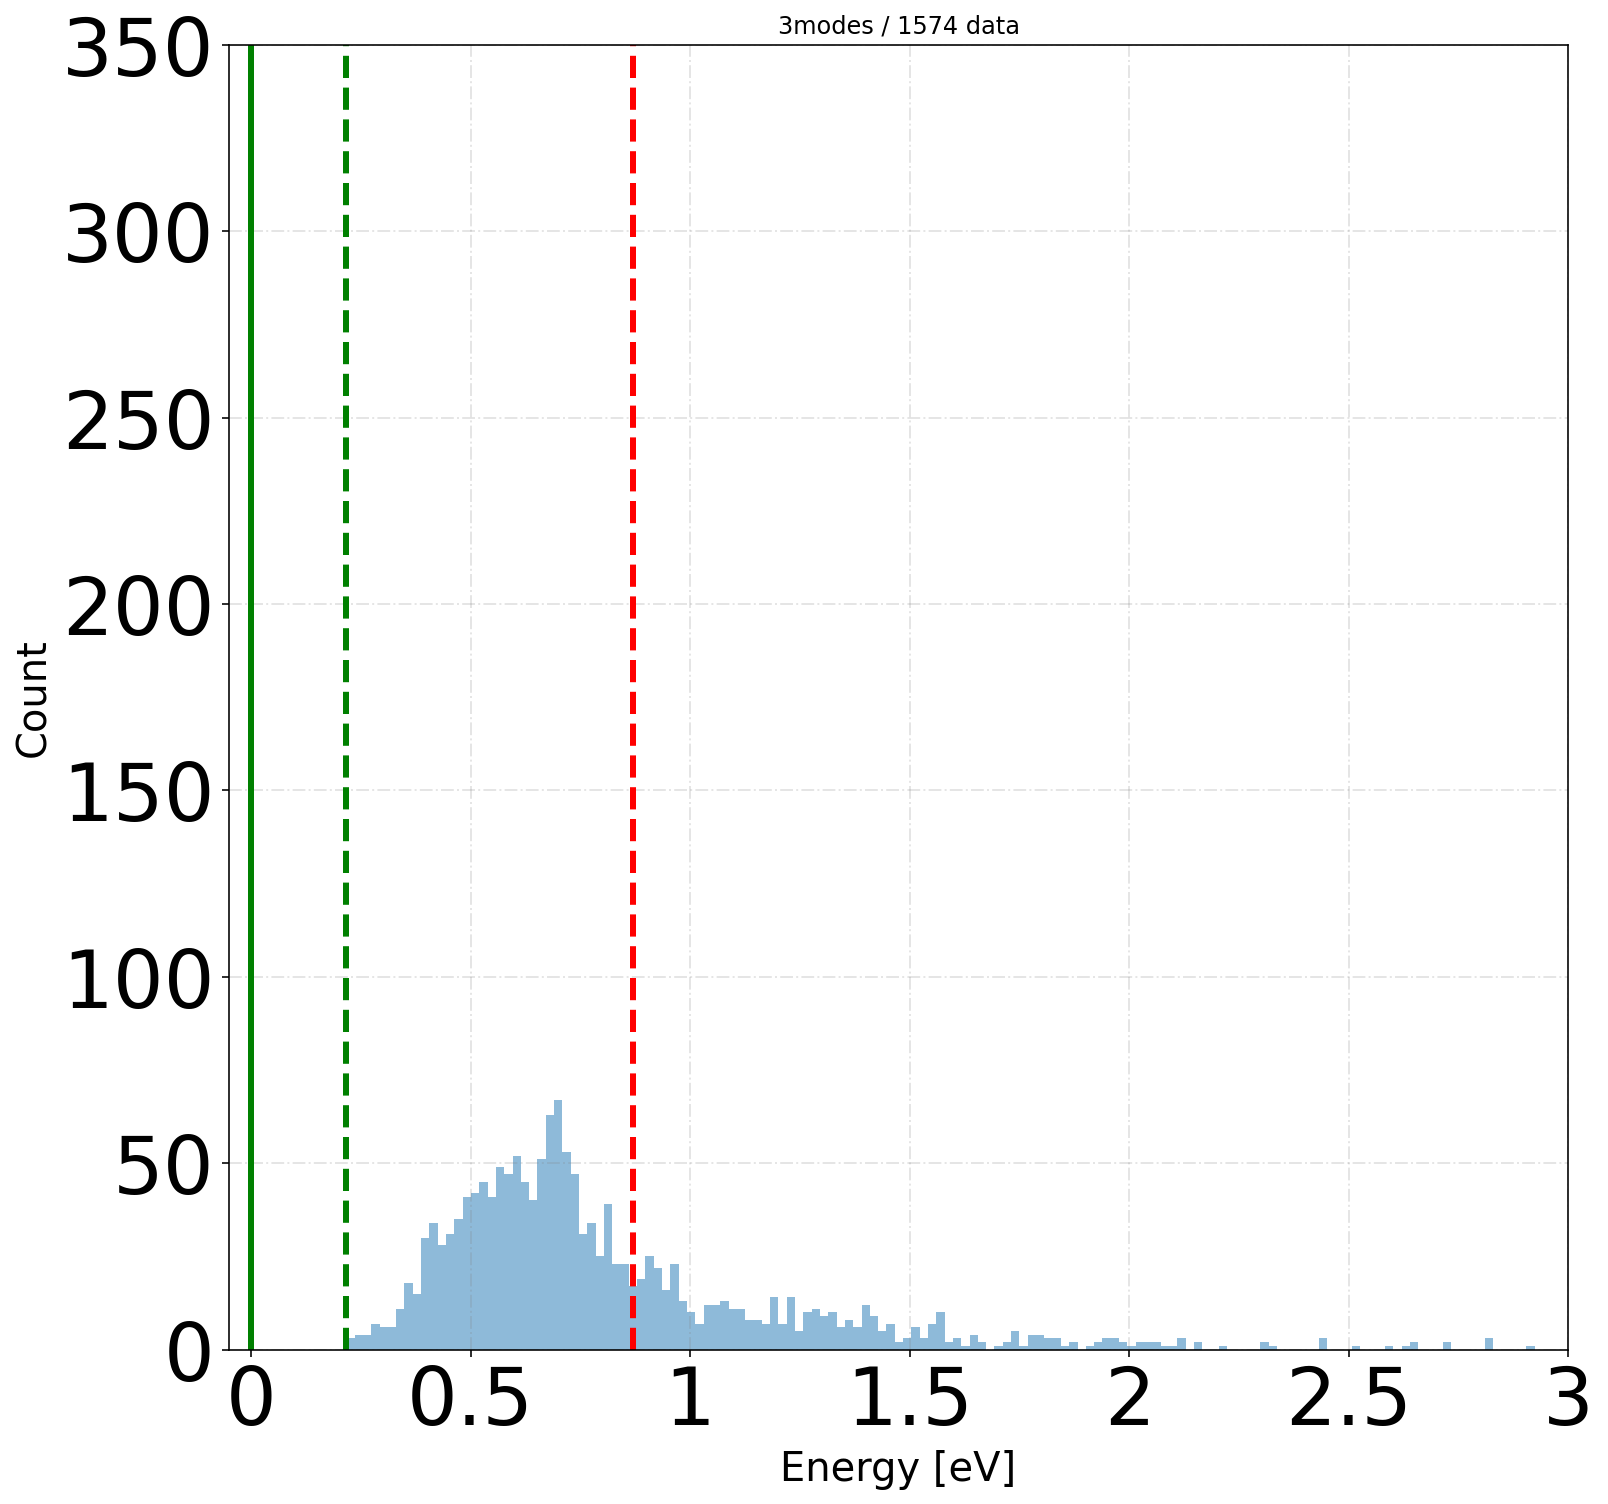

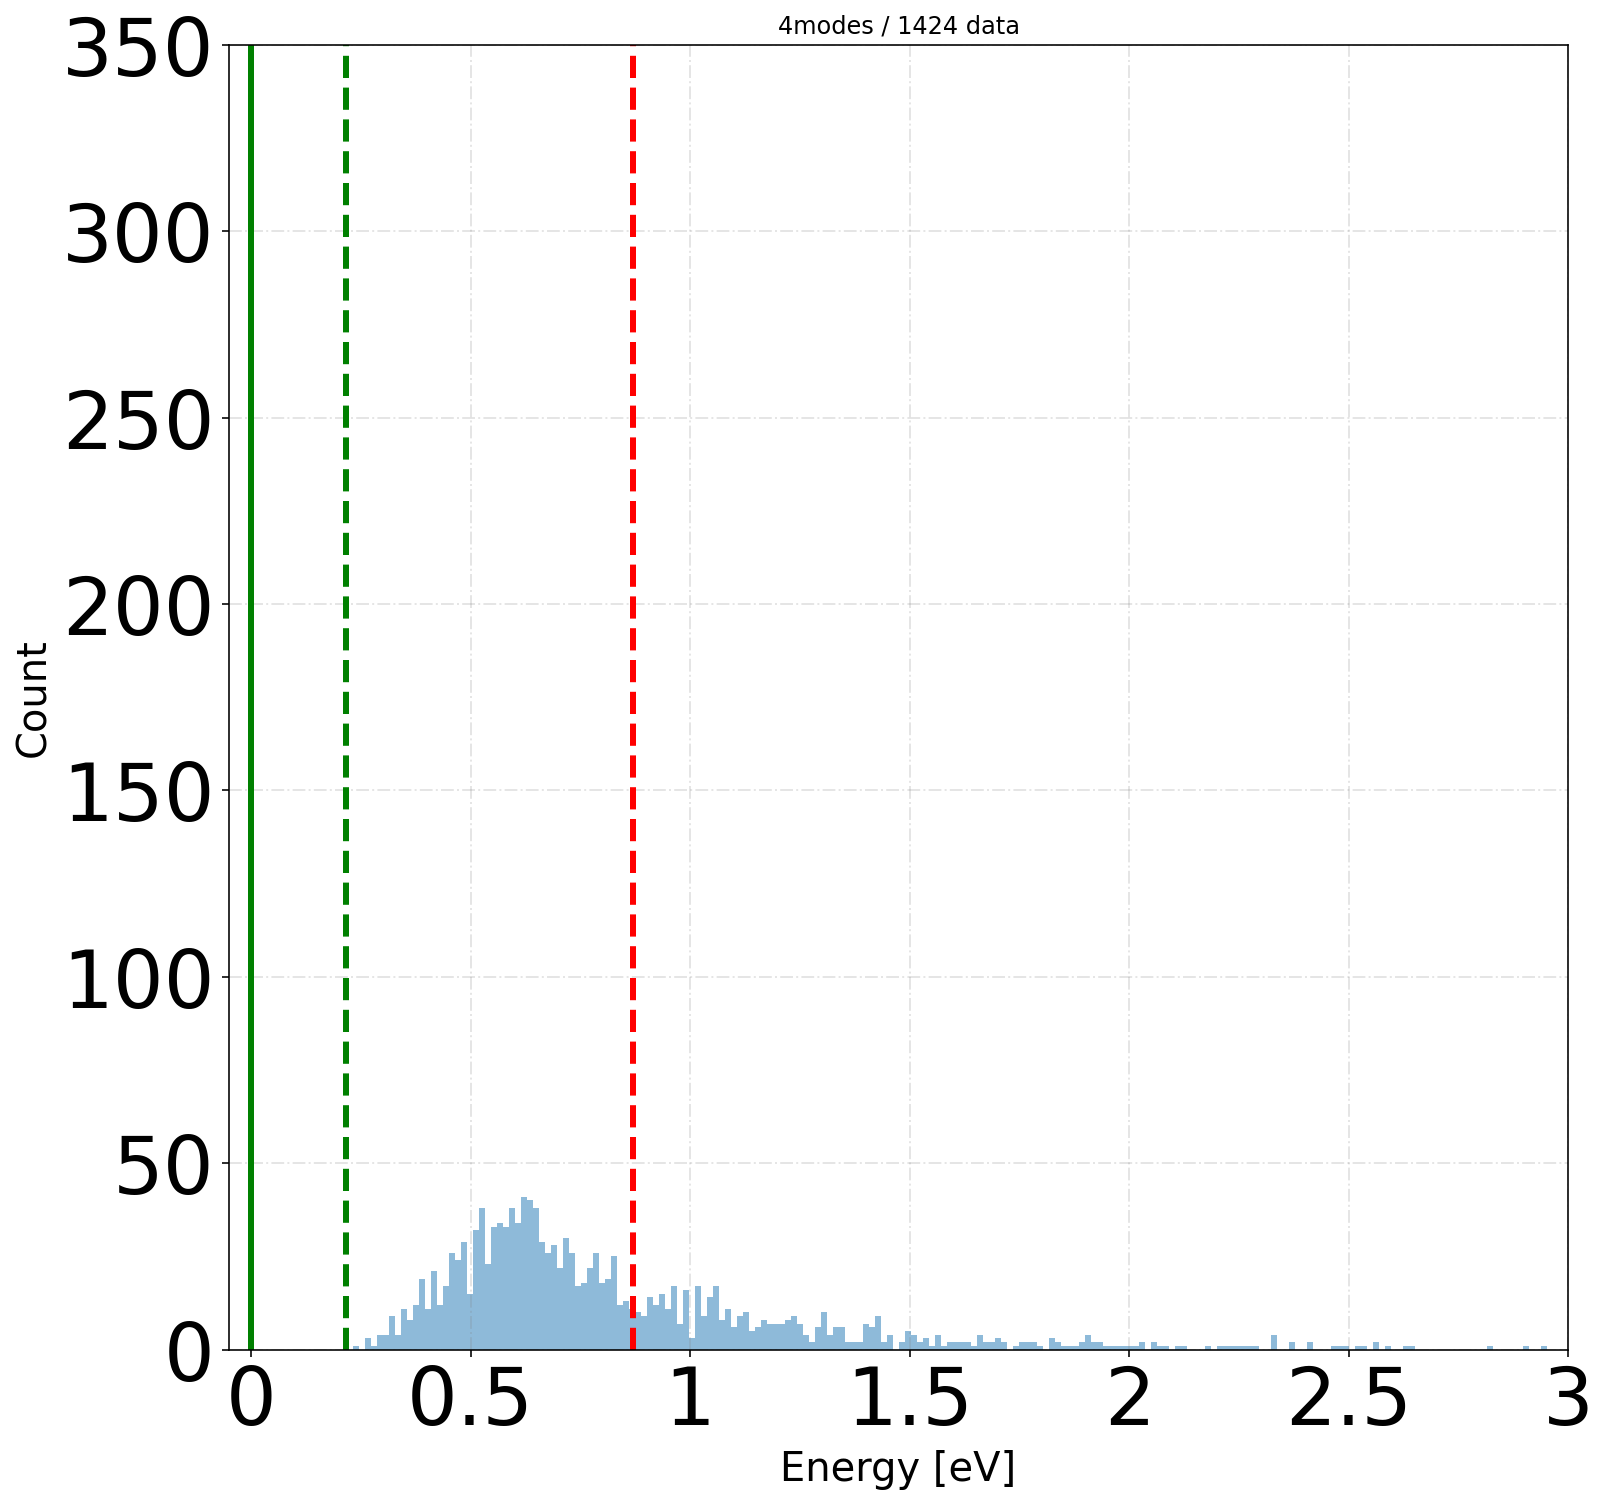

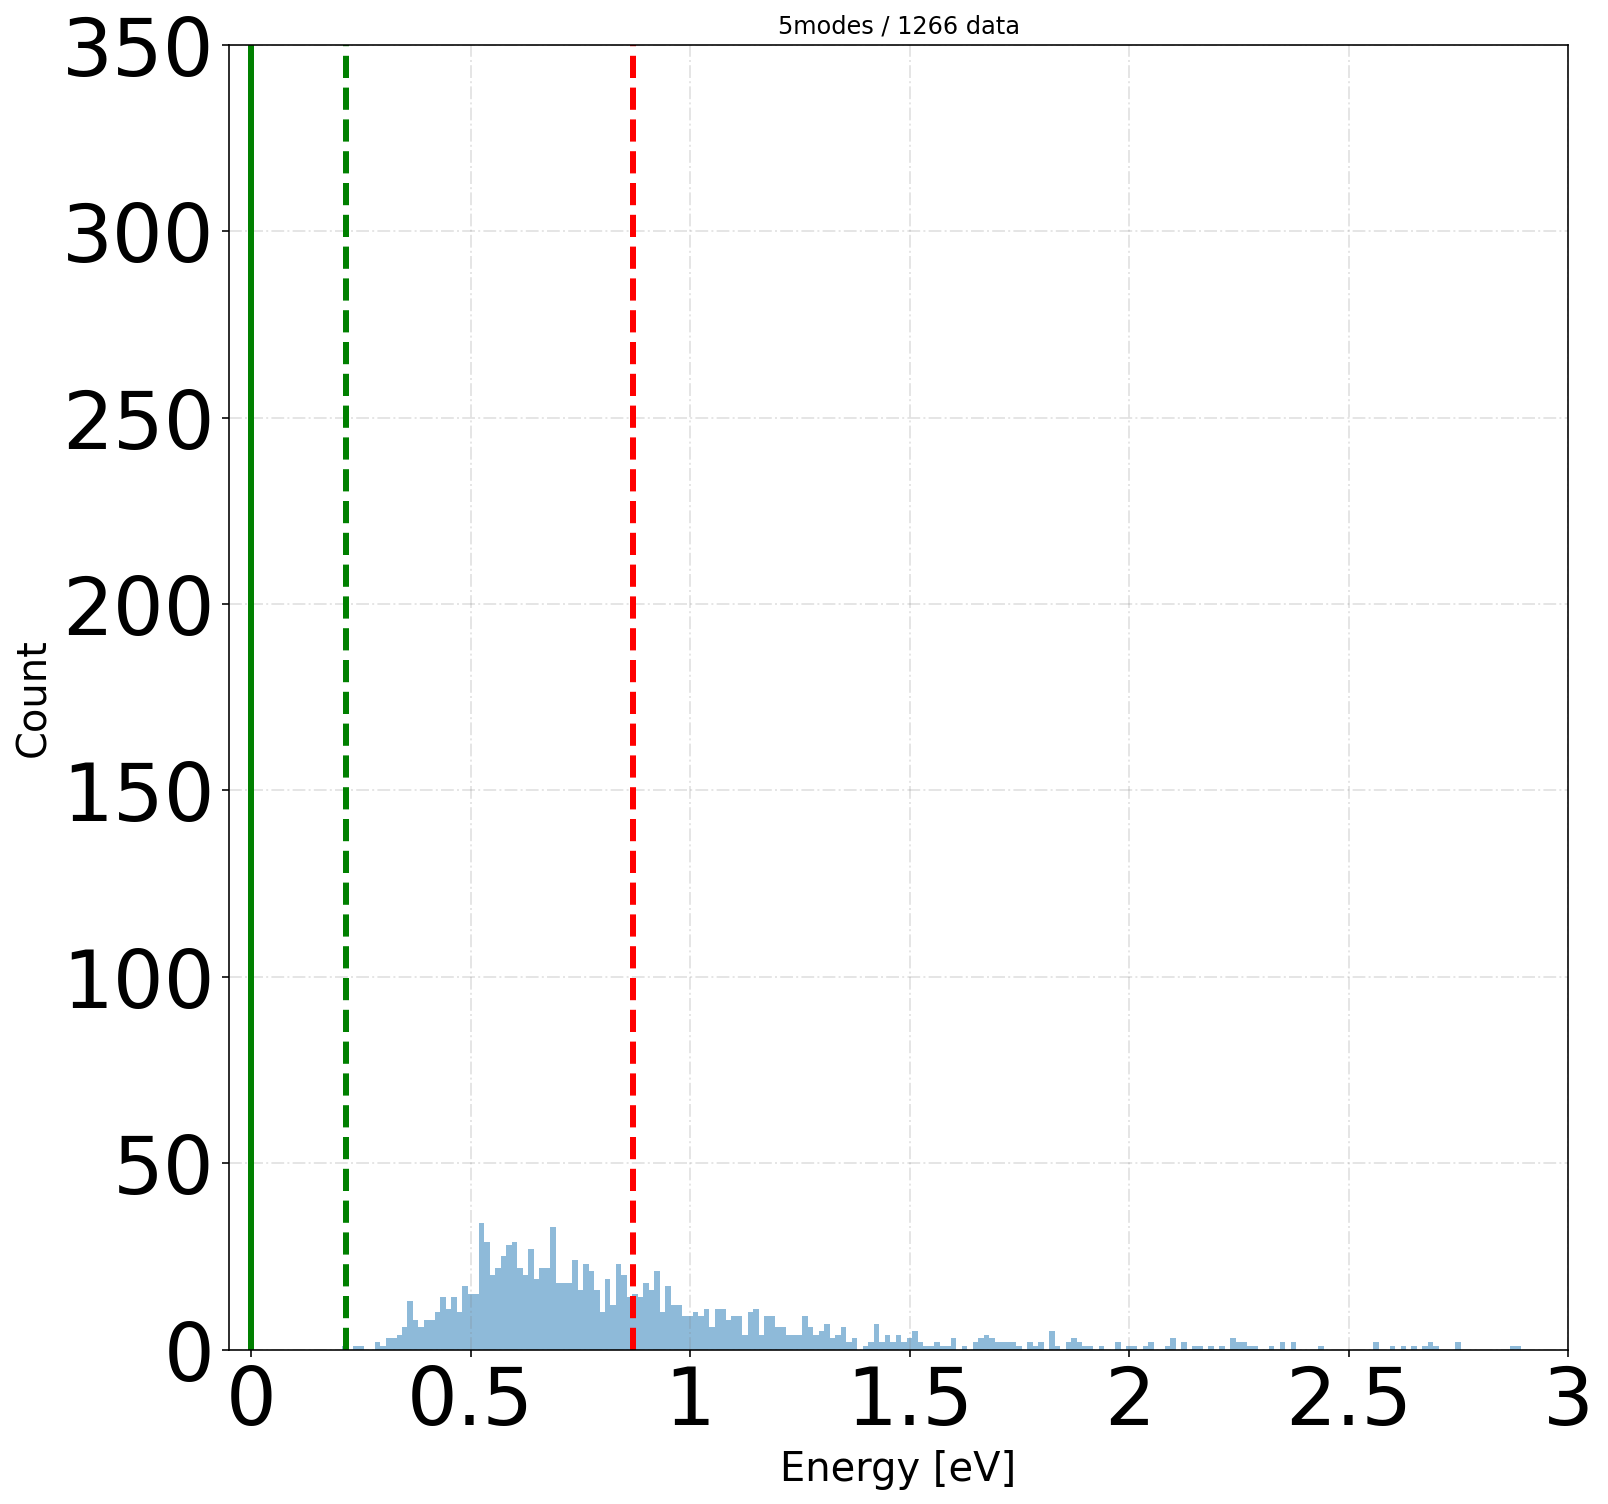

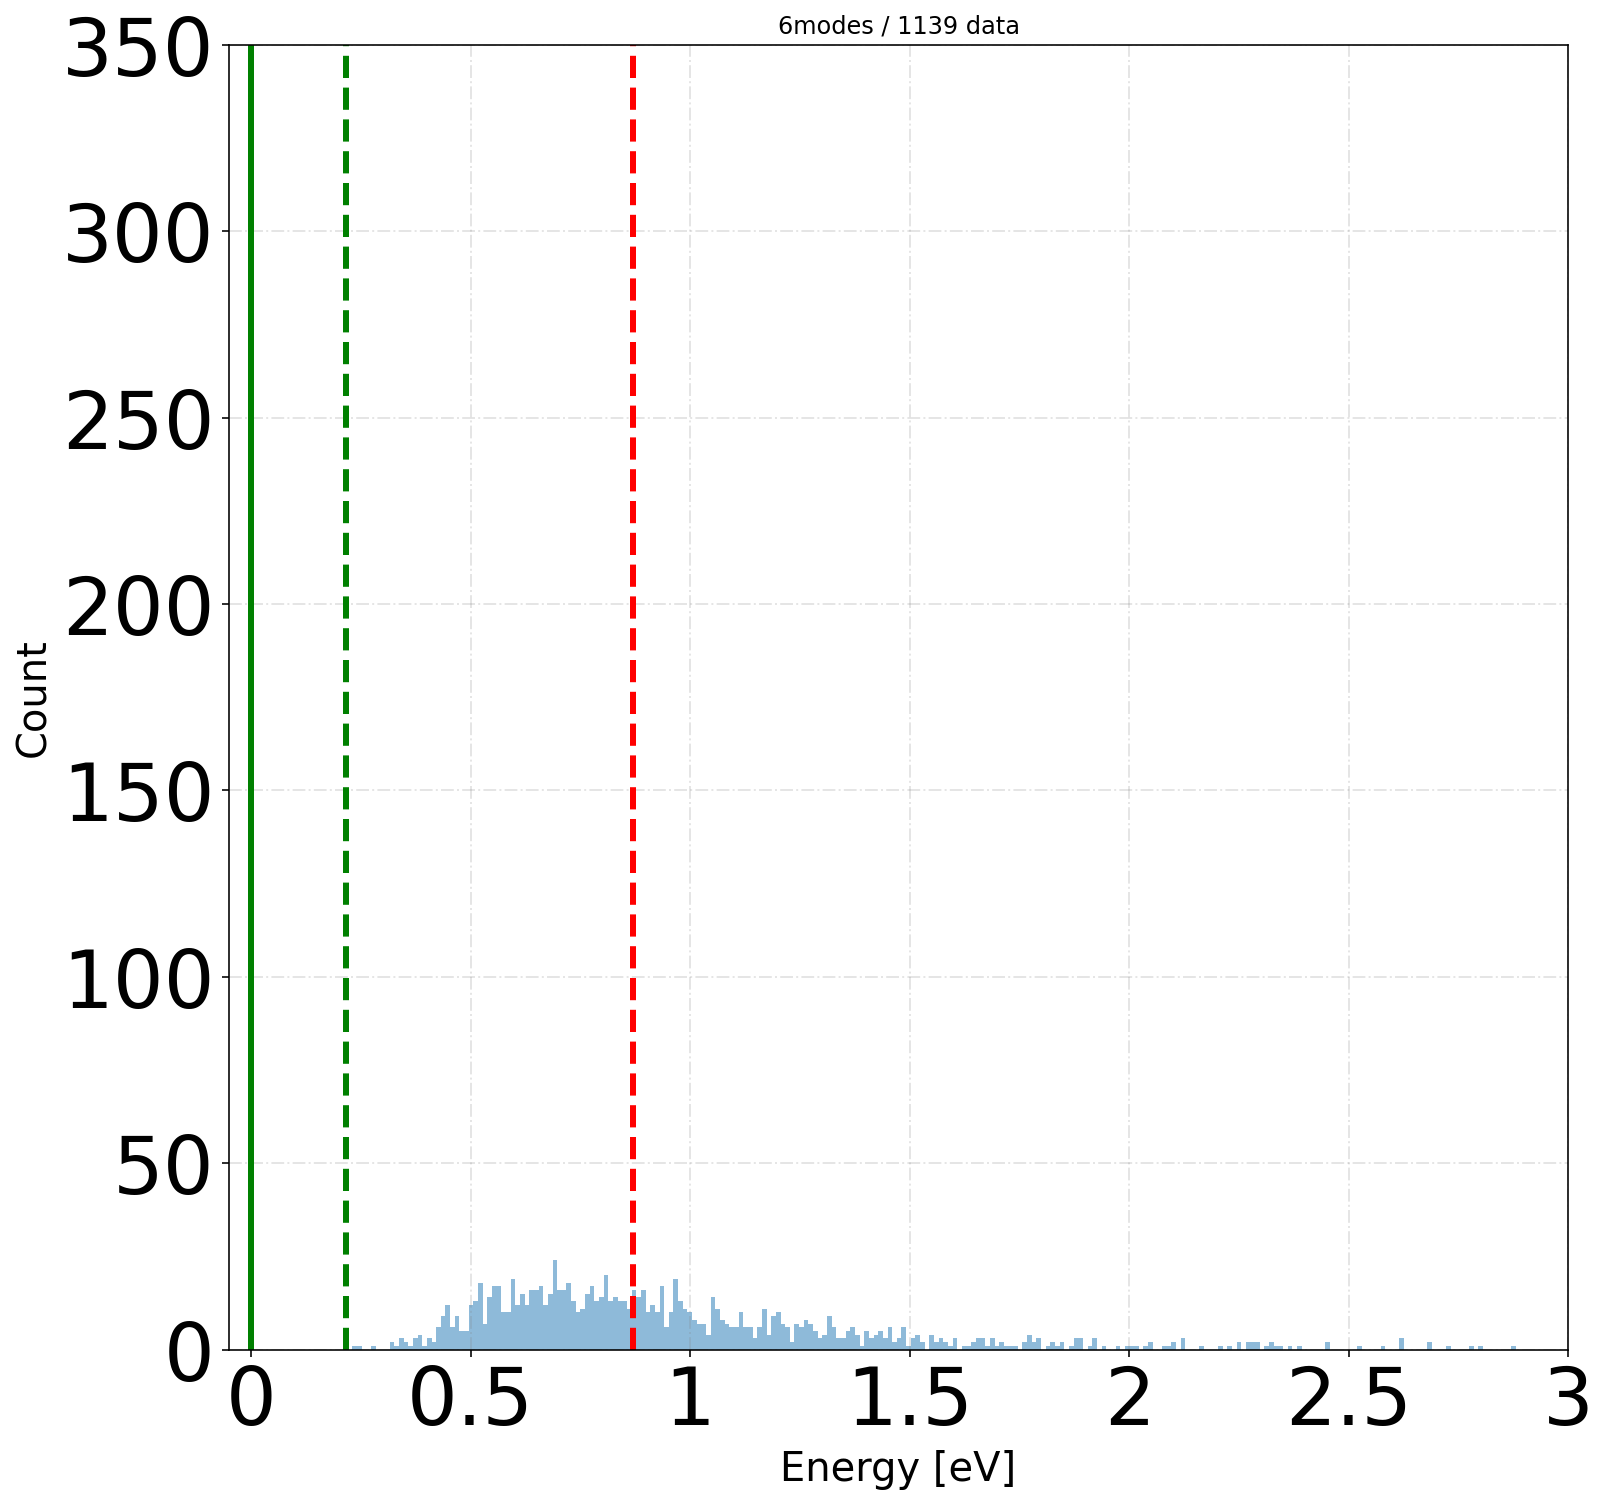

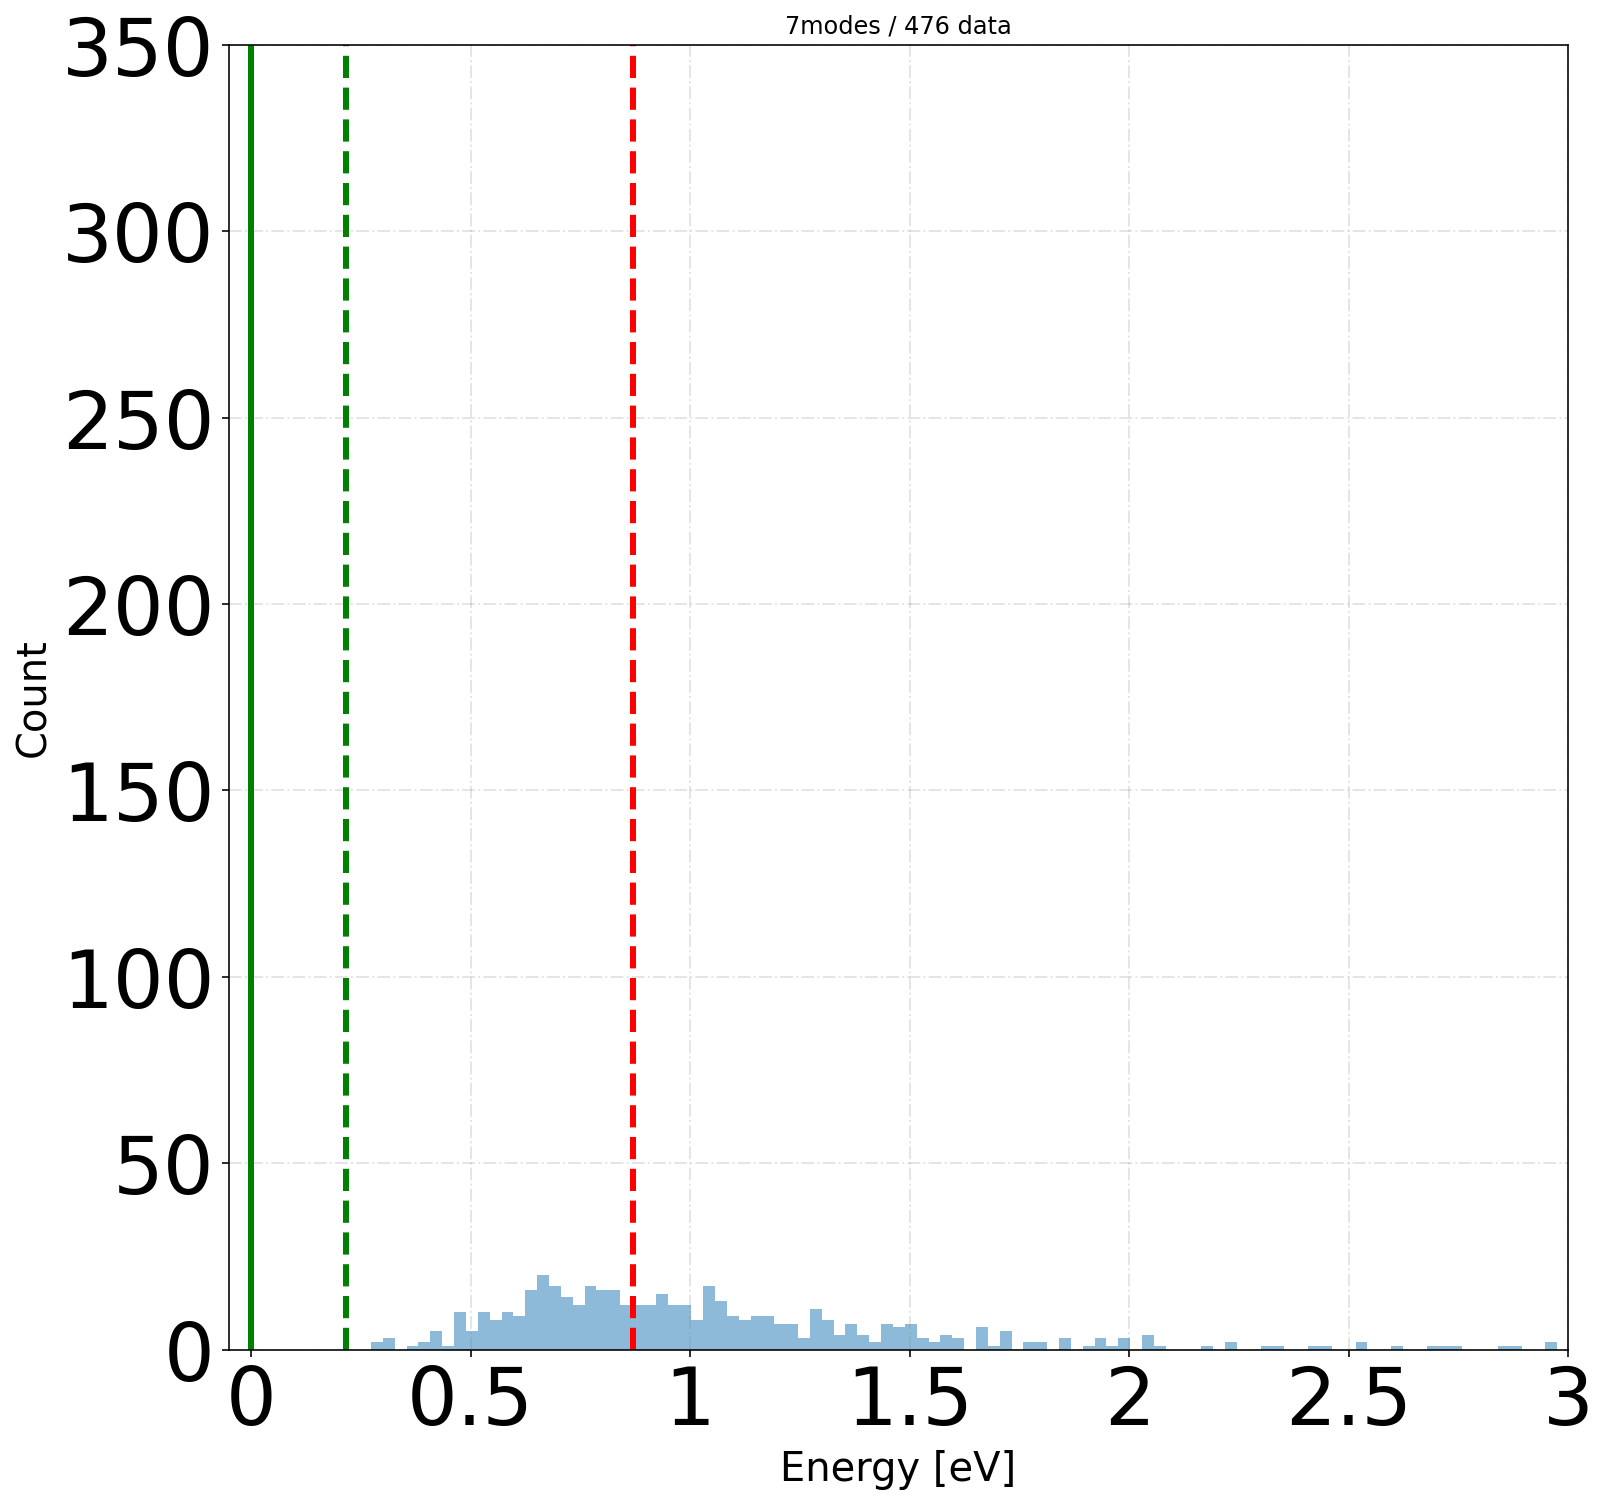

In [15]:
Nmodes = 'All'
plot_energies(df_train,Nmodes,300,350)

Nmodes = 1
plot_energies(dff1_train,Nmodes,300,350)

Nmodes = 2
plot_energies(dff2_train,Nmodes,300,350)

Nmodes = 3
plot_energies(dff3_train,Nmodes,300,350)

Nmodes = 4
plot_energies(dff4_train,Nmodes,300,350)

Nmodes = 5
plot_energies(dff5_train,Nmodes,300,350)

Nmodes = 6
plot_energies(dff6_train,Nmodes,300,350)

Nmodes = 7
plot_energies(dff7_train,Nmodes,100,350)

# Creation of the ML model

In [13]:
## Commented because takes time but it is to get the parameters
#rbf svr

#param_grid = {'C': [1, 10, 32, 64, 100], 'gamma': [10, 1, 0.1, 0.01]}

#grid = GridSearchCV(SVR(), param_grid=param_grid, cv=5)
#grid.fit(X_train, y_train)
#y_predict = grid.predict
#print(grid.best_params_)
#print(grid.score(X_train, y_train))

# Evaluation of the model

R2 on test set:0.776516


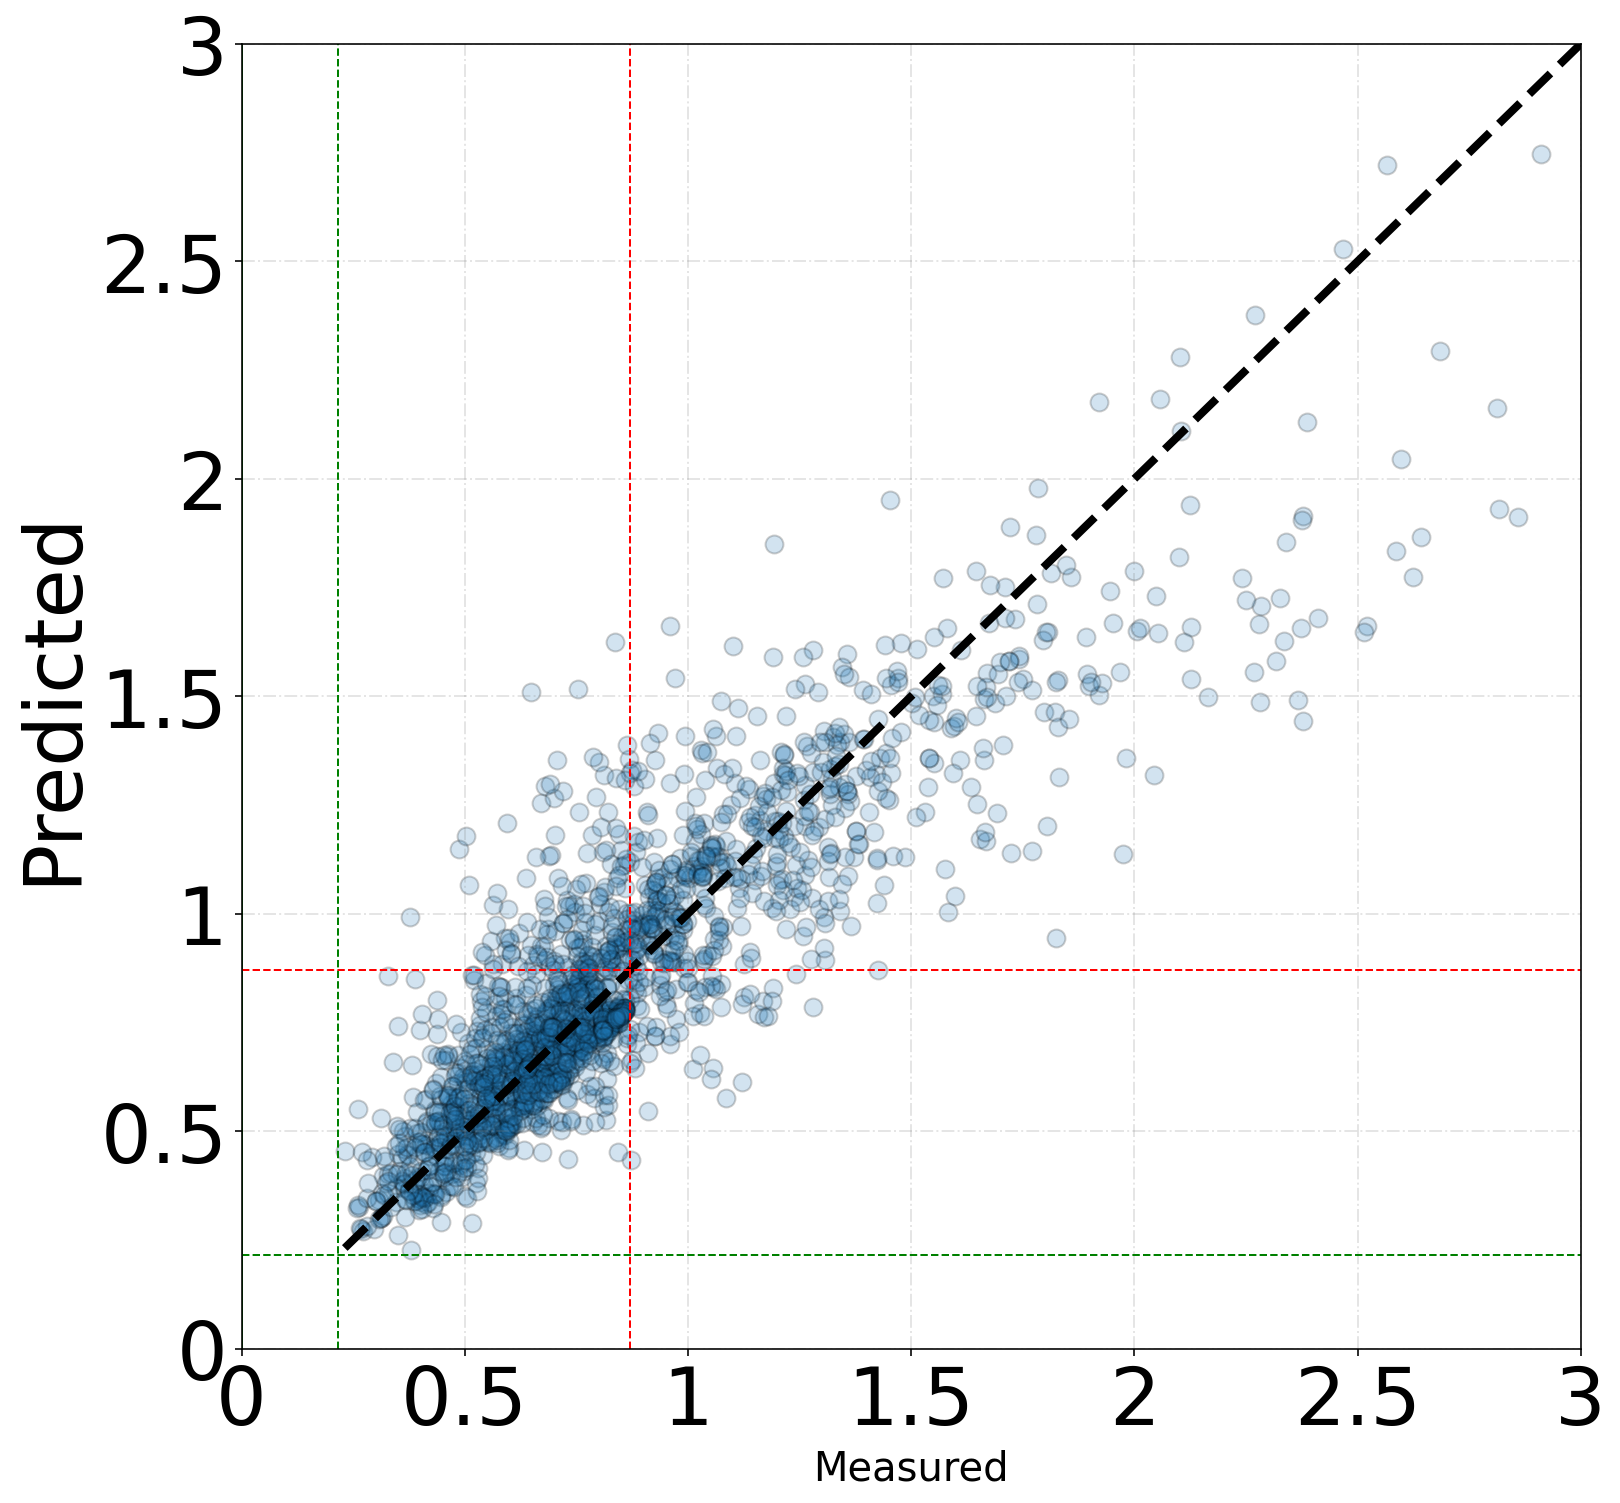

R2 on test set:0.780563


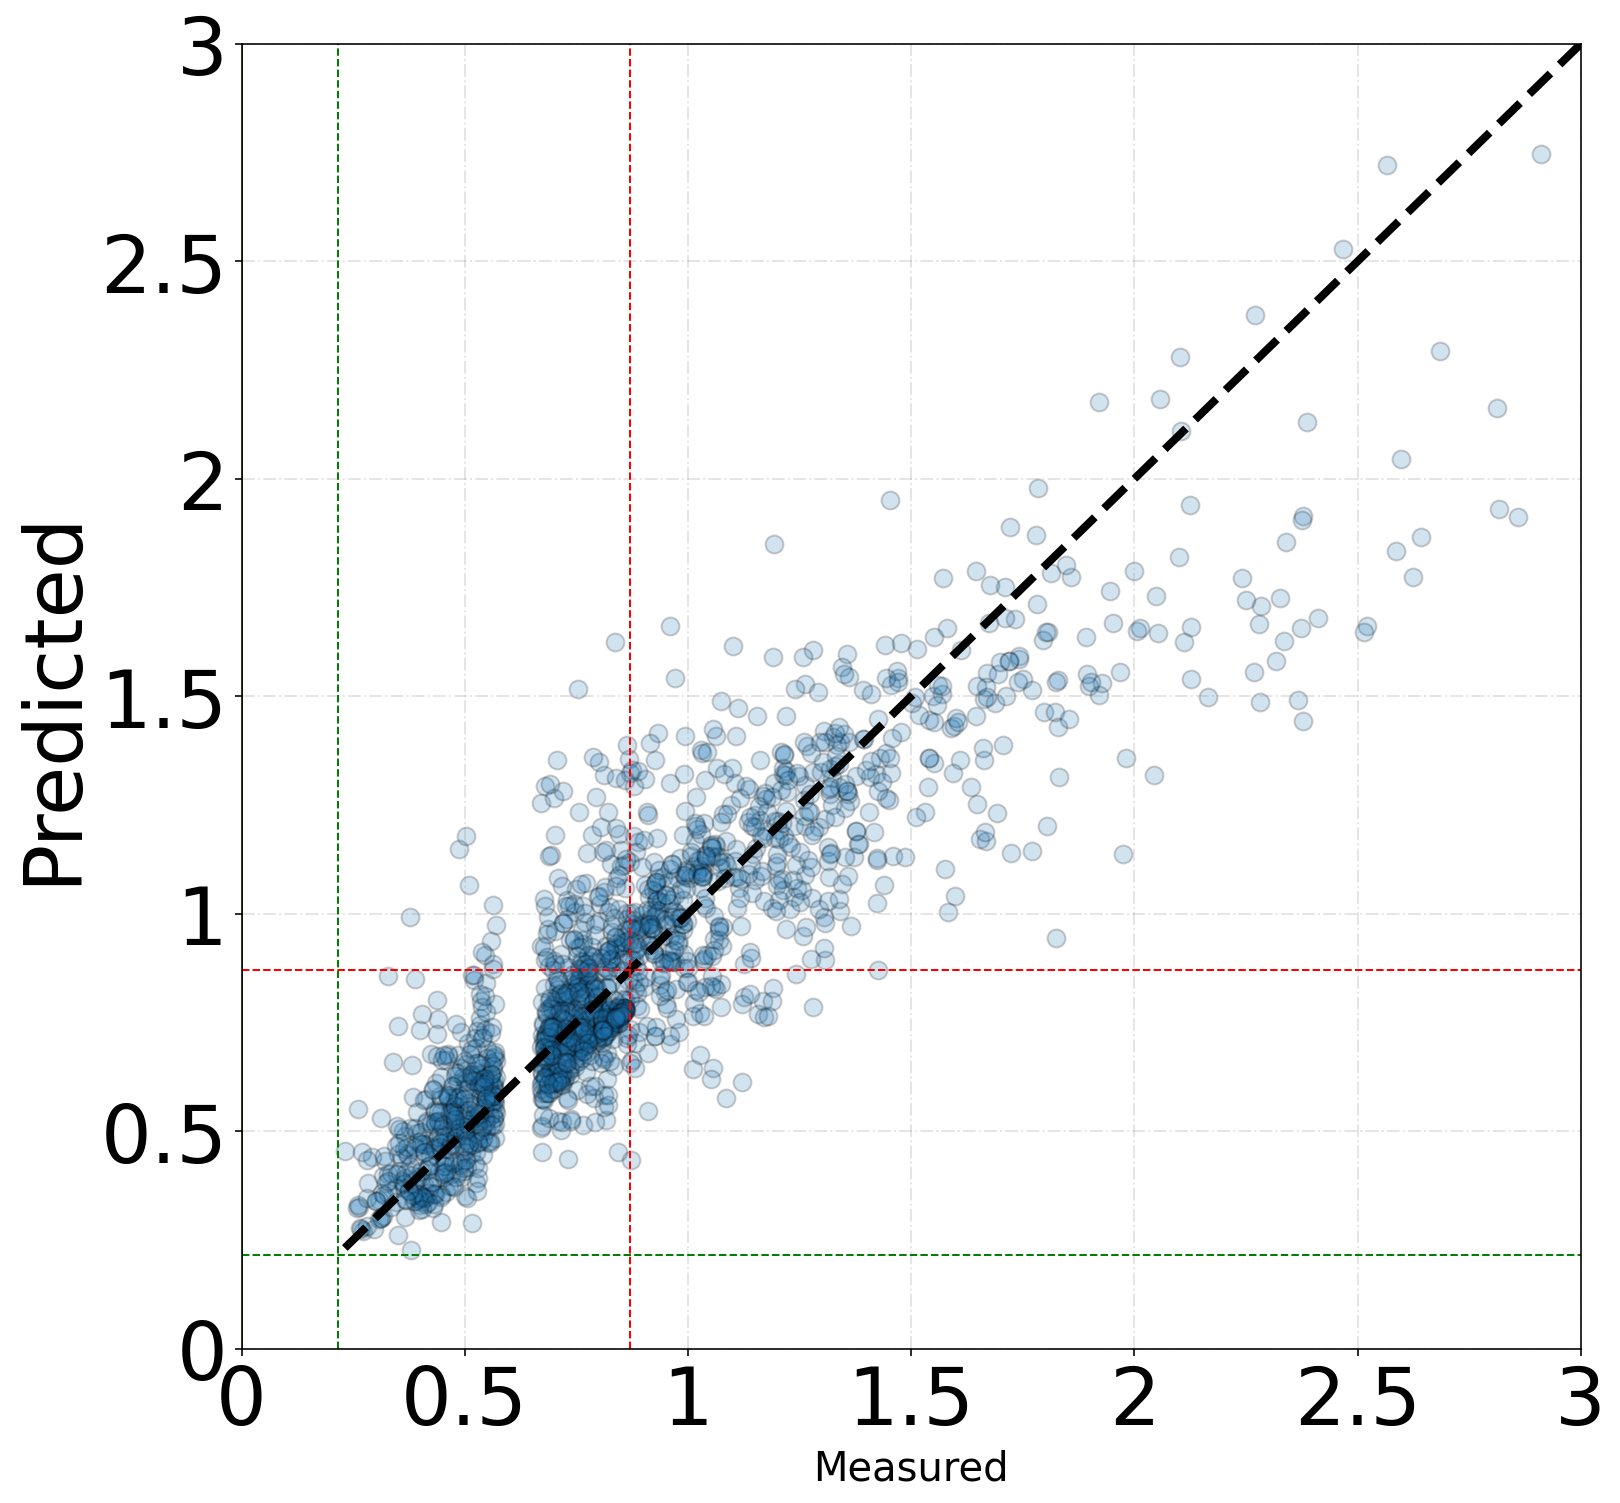

In [116]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RNG_SEED, shuffle=True)


ref_GS = -33.55
ref_R3c_cub = -33.334
ref_cub = -32.68

SVM = SVR(C = 10, gamma = 1).fit(X_train, y_train)
predict_y = SVM.predict(X_test)
print("R2 on test set:%f" % SVM.score(X_test, y_test))
fig,ax = plt.subplots(figsize=(12,12))
ax.scatter(y_test-ref_GS, predict_y-ref_GS, edgecolors=(0, 0, 0),alpha=0.2,s = 80)
ax.plot([y_test.min()-ref_GS, y_test.max()-ref_GS], [y_test.min()-ref_GS, y_test.max()-ref_GS], 'k--', lw=4)
plt.grid(b=True, which='major', color='gray', alpha=0.2, linestyle='dashdot', lw=1)

plt.axvline(x=ref_cub-ref_GS,color='r', linestyle='--',lw=1)
plt.axvline(x=ref_GS-ref_GS,color='g', linestyle='-',lw=1)
plt.axvline(x=ref_R3c_cub-ref_GS,color='g', linestyle='--',lw=1)
plt.axhline(y=ref_cub-ref_GS,color='r', linestyle='--',lw=1)
plt.axhline(y=ref_R3c_cub-ref_GS,color='g', linestyle='--',lw=1)


plt.xticks([0,0.5,1,1.5,2,2.5,3],['0','0.5','1','1.5','2','2.5','3'],fontsize=40)
plt.yticks([0,0.5,1,1.5,2,2.5,3],['0','0.5','1','1.5','2','2.5','3'],fontsize=40)
ax.set_xlabel('Measured',fontsize=20)
ax.set_ylabel('Predicted',fontsize=40)
plt.grid(b=True, which='major', color='gray', alpha=0.2, linestyle='dashdot', lw=1)
plt.xlim(0,3)
plt.ylim(0,3)
plt.show()
fig.savefig('Plot_PredVSMeas_full.png', dpi=300, bbox_inches='tight')


ref_GS = -33.55
ref_R3c_cub = -33.334
ref_cub = -32.68

y_test_bool = []
y_test_bool = [(a < -32.98) or (a > -32.88) for a in y_test] #ref_cub-(ref_GS-ref_cub)
y_test_low = y_test[y_test_bool]
x_test_low = X_test[y_test_bool]


SVM = SVR(C = 10, gamma = 1).fit(X_train, y_train)
predict_y_low = SVM.predict(x_test_low)
print("R2 on test set:%f" % SVM.score(x_test_low, y_test_low))
fig,ax = plt.subplots(figsize=(12,12))
ax.scatter(y_test_low-ref_GS, predict_y_low-ref_GS, edgecolors=(0, 0, 0),alpha=0.2,s = 80)
ax.plot([y_test.min()-ref_GS, y_test.max()-ref_GS], [y_test.min()-ref_GS, y_test.max()-ref_GS], 'k--', lw=4)
plt.grid(b=True, which='major', color='gray', alpha=0.2, linestyle='dashdot', lw=1)

plt.axvline(x=ref_cub-ref_GS,color='r', linestyle='--',lw=1)
plt.axvline(x=ref_GS-ref_GS,color='g', linestyle='-',lw=1)
plt.axvline(x=ref_R3c_cub-ref_GS,color='g', linestyle='--',lw=1)
plt.axhline(y=ref_cub-ref_GS,color='r', linestyle='--',lw=1)
plt.axhline(y=ref_R3c_cub-ref_GS,color='g', linestyle='--',lw=1)


plt.xticks([0,0.5,1,1.5,2,2.5,3],['0','0.5','1','1.5','2','2.5','3'],fontsize=40)
plt.yticks([0,0.5,1,1.5,2,2.5,3],['0','0.5','1','1.5','2','2.5','3'],fontsize=40)
ax.set_xlabel('Measured',fontsize=20)
ax.set_ylabel('Predicted',fontsize=40)
plt.grid(b=True, which='major', color='gray', alpha=0.2, linestyle='dashdot', lw=1)
plt.xlim(0,3)
plt.ylim(0,3)
plt.show()


In [62]:
y_test_bool = []
y_test_bool = y_test < -32.68
y_test_low = y_test[y_test_bool]
x_test_low = X_test[y_test_bool]
print(len(x_test_low))
print(np.size(y_test_low))
SVM = SVR(C = 10, gamma = 1).fit(X_train, y_train)
predict_y = SVM.predict(x_test_low)
print("R2 on test set:%f" % SVM.score(x_test_low,y_test_low))

1344
1344
R2 on test set:-0.159453


R2 on test set:0.776678
rmse on test set:0.194909


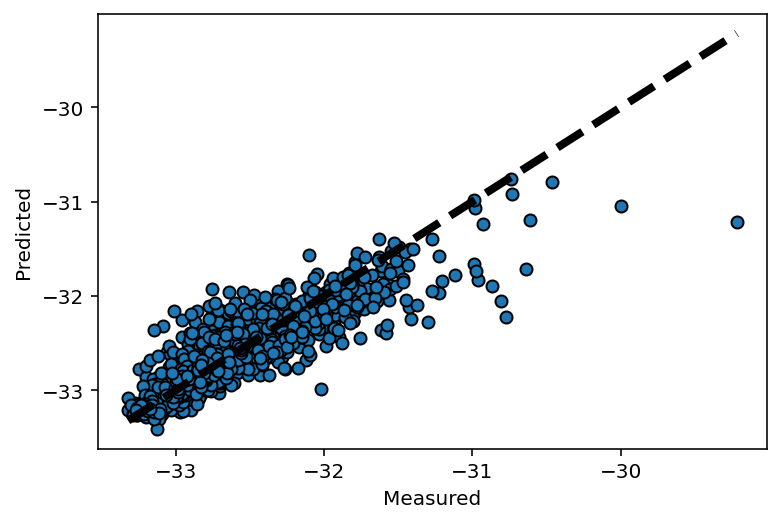

R2 on test set:0.786092
rmse on test set:0.207665


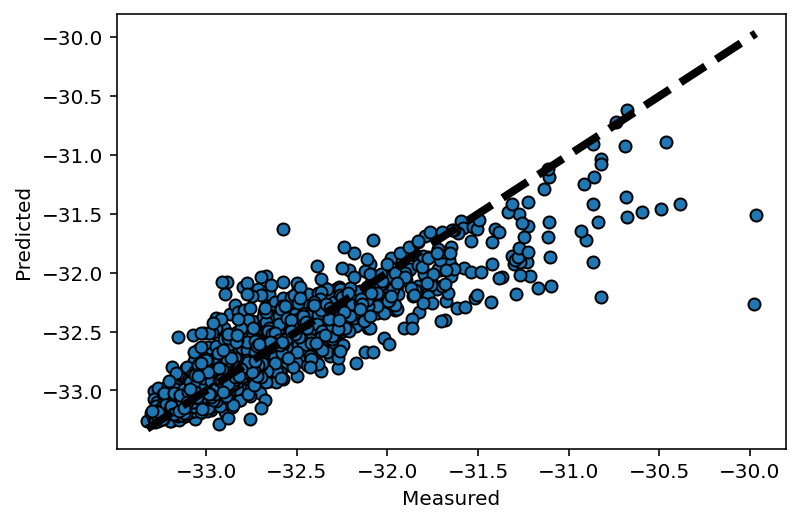

R2 on test set:0.760846
rmse on test set:0.200520


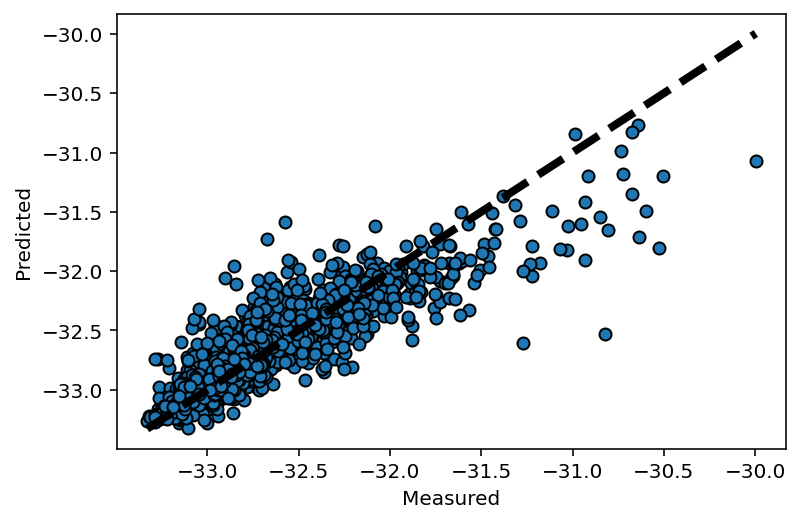

R2 on test set:0.777757
rmse on test set:0.203558


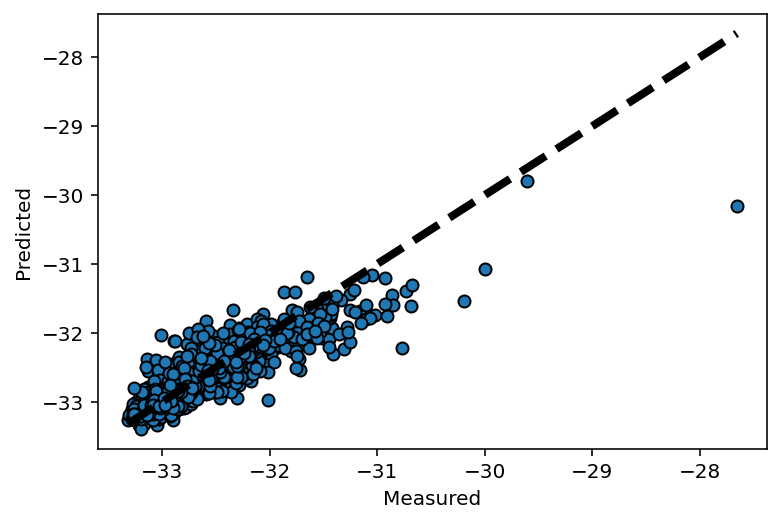

R2 on test set:0.766983
rmse on test set:0.211825


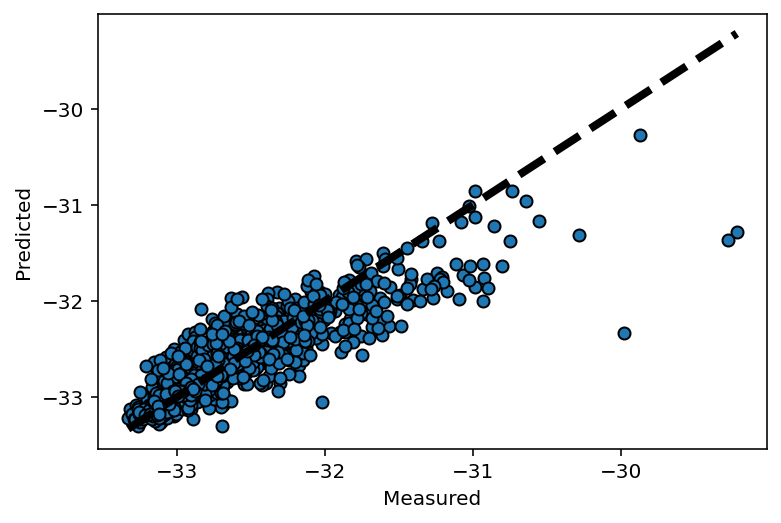

R2 on test set:0.764782
rmse on test set:0.210438


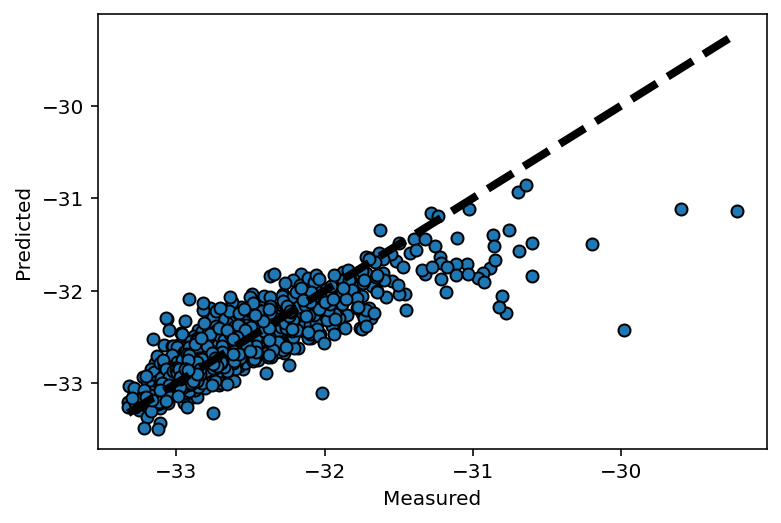

R2 on test set:0.765955
rmse on test set:0.216936


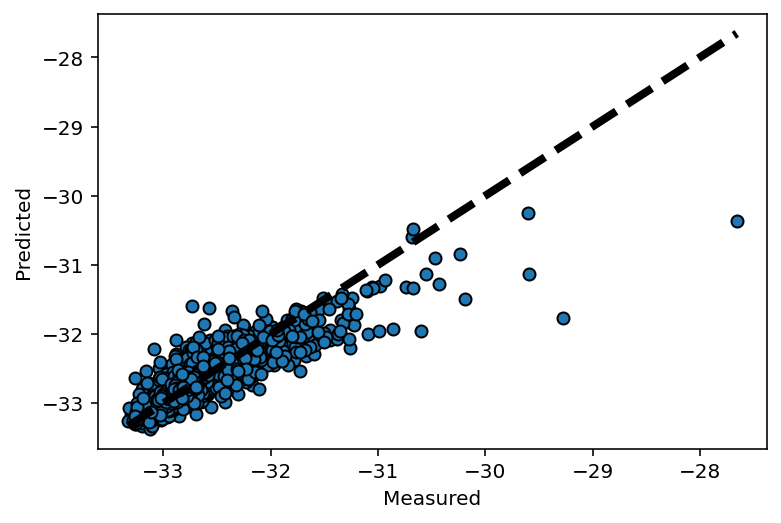

R2 on test set:0.763758
rmse on test set:0.202727


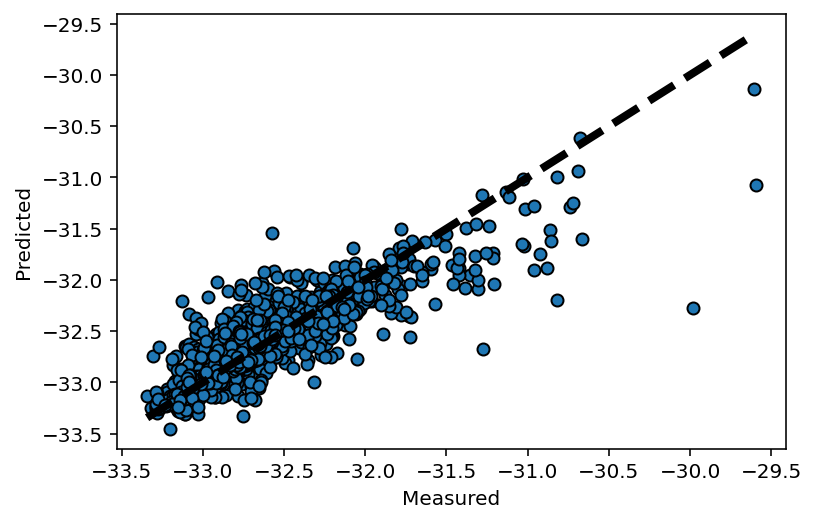

R2 on test set:0.774871
rmse on test set:0.202568


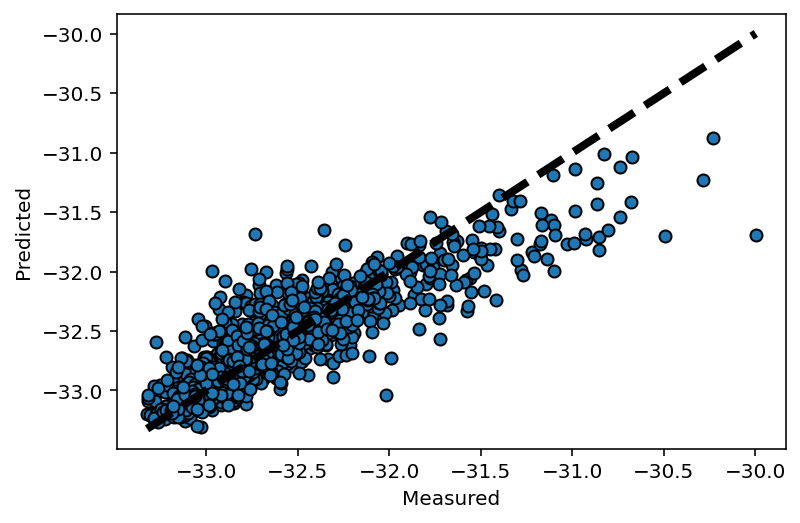

R2 on test set:0.767766
rmse on test set:0.192765


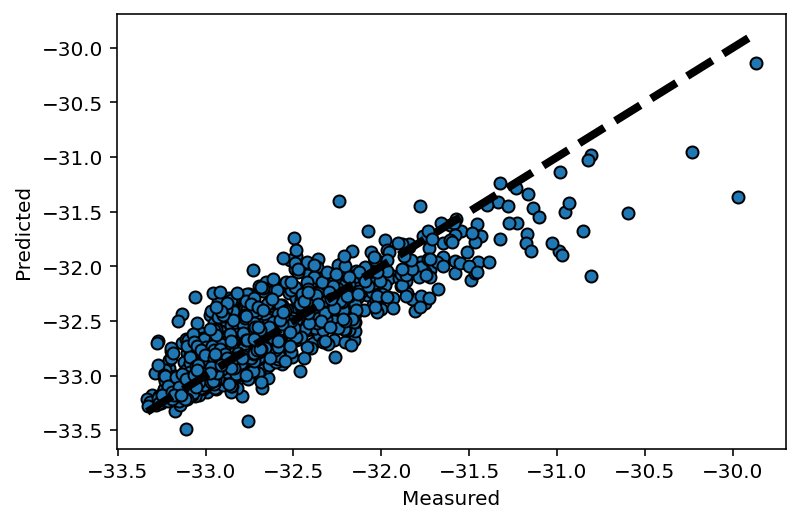

In [19]:
random_seed = random.randint(100, size = (10))
score = []
rmse = []
for i in random_seed:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= i, shuffle=True)
    SVM = SVR(C = 10, gamma = 1).fit(X_train, y_train)
    predict_y = SVM.predict(X_test)
    print("R2 on test set:%f" % SVM.score(X_test, y_test))
    score.append(SVM.score(X_test, y_test))
    
    rmse.append(np.sqrt(mean_squared_error(y_test, predict_y)))
    print("rmse on test set:%f" % np.sqrt(mean_squared_error(y_test, predict_y)))
    
    fix, ax = plt.subplots()
    ax.scatter(y_test, predict_y, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

In [16]:
np.average(rmse)

0.20439224557179583

In [17]:
np.average(score)

0.7705464716326285

# Test of the model on one mode structures

In [8]:
dp_1 = pd.concat([dp2_train,dp3_train,dp4_train,dp5_train,dp6_train,dp7_train])
dq_1 = pd.concat([dq2_train,dq3_train,dq4_train,dq5_train,dq6_train])
bool_invalid_min_d = dq_1['min_d'] > 1.8
dq_1 = dq_1[bool_invalid_min_d]


df_1 = pd.concat([dp_1, dq_1])

In [9]:
X = df_1[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12','M13','M14','M15','M16','M17','M18','M19','M20','M21']]
y = df_1['E']

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (7647, 21)
Shape of y: (7647,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RNG_SEED, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(6882, 21)
(765, 21)


In [32]:
#rbf svr

#param_grid = {'C': [1, 10, 32, 64, 100], 'gamma': [10, 1, 0.1, 0.01]}

#grid = GridSearchCV(SVR(), param_grid=param_grid, cv=5)
#grid.fit(X_train, y_train)
#y_predict = grid.predict
#print(grid.best_params_)
#print(grid.score(X_train, y_train))

{'C': 10, 'gamma': 1}
0.9669225485657464


R2 on test set:0.743844


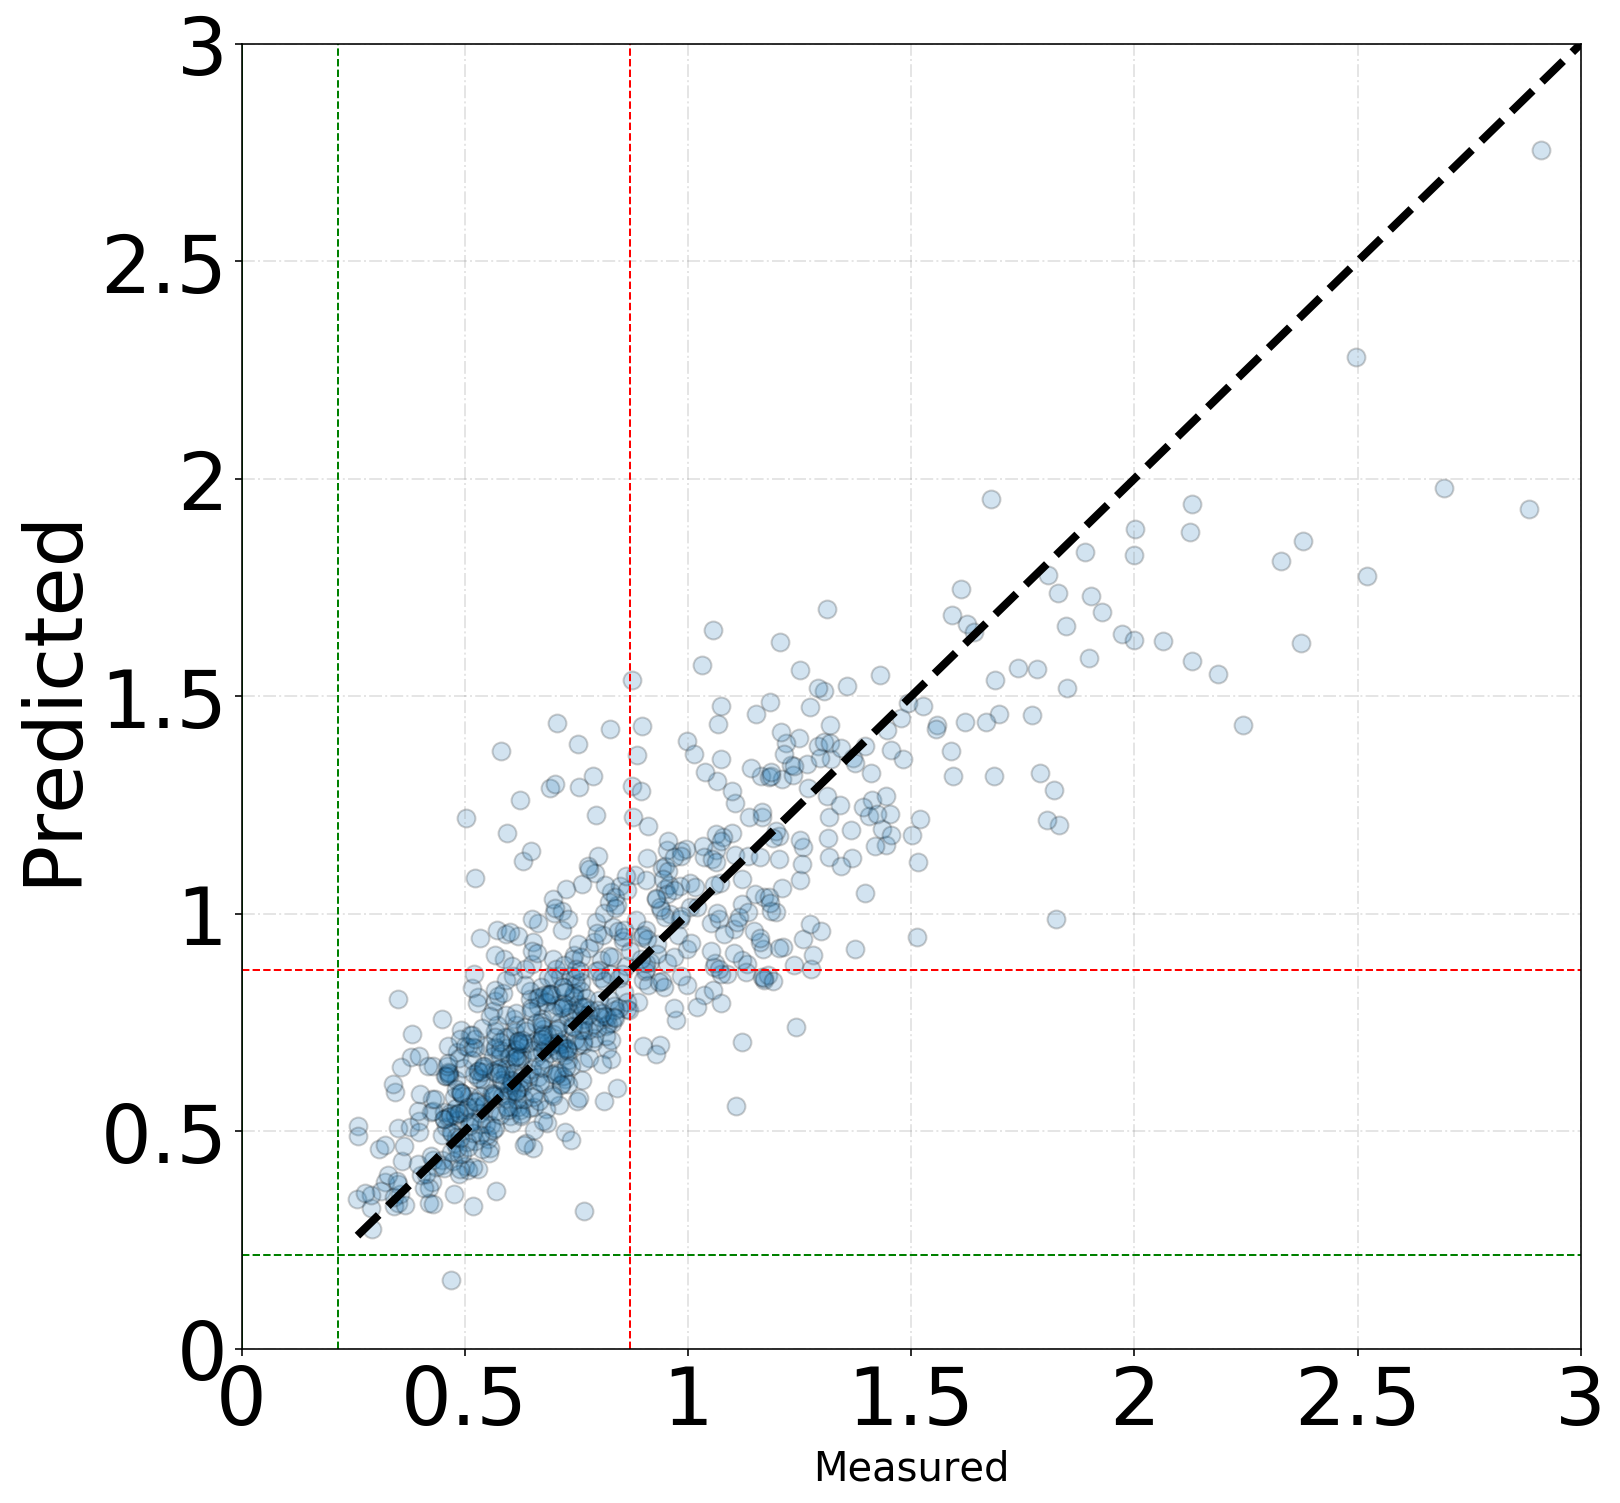

In [11]:
ref_GS = -33.55
ref_R3c_cub = -33.334
ref_cub = -32.68


SVM = SVR(C = 10, gamma = 1).fit(X_train, y_train)
predict_y = SVM.predict(X_test)
print("R2 on test set:%f" % SVM.score(X_test, y_test))
fig,ax = plt.subplots(figsize=(12,12))
ax.scatter(y_test-ref_GS, predict_y-ref_GS, edgecolors=(0, 0, 0),alpha=0.2,s = 80)
plt.grid(b=True, which='major', color='gray', alpha=0.2, linestyle='dashdot', lw=1)

plt.axvline(x=ref_cub-ref_GS,color='r', linestyle='--',lw=1)
plt.axvline(x=ref_GS-ref_GS,color='g', linestyle='-',lw=1)
plt.axvline(x=ref_R3c_cub-ref_GS,color='g', linestyle='--',lw=1)
plt.axhline(y=ref_cub-ref_GS,color='r', linestyle='--',lw=1)
plt.axhline(y=ref_R3c_cub-ref_GS,color='g', linestyle='--',lw=1)

ax.plot([y_test.min()-ref_GS, y_test.max()-ref_GS], [y_test.min()-ref_GS, y_test.max()-ref_GS], 'k--', lw=4)
plt.xticks([0,0.5,1,1.5,2,2.5,3],['0','0.5','1','1.5','2','2.5','3'],fontsize=40)
plt.yticks([0,0.5,1,1.5,2,2.5,3],['0','0.5','1','1.5','2','2.5','3'],fontsize=40)
ax.set_xlabel('Measured',fontsize=20)
ax.set_ylabel('Predicted',fontsize=40)
plt.xlim(0,3)
plt.ylim(0,3)
plt.show()
fig.savefig('Plot_PredVSMeas_not1mode.png', dpi=300, bbox_inches='tight')



In [30]:
list_files = list(['Descriptor_a_Pm-3m[0,0,0]GM4-.POSCAR_norm_reduced.POSCAR.vasp','Descriptor_ab_Pm-3m[0,0,0]GM4-.POSCAR_norm_reduced.POSCAR.vasp','Descriptor_abc_Pm-3m[0,0,0]GM4-.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[0,1_2,0]X5-.POSCAR_norm_reduced.POSCAR.vasp','Descriptor_ab_Pm-3m[0,1_2,0]X5-.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[0,1_4,0]DT5_i24.POSCAR_norm_reduced.POSCAR.vasp','Descriptor_ab_Pm-3m[0,1_4,0]DT5_i24.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[0,1_4,0]DT5_i48.POSCAR_norm_reduced.POSCAR.vasp','Descriptor_ab_Pm-3m[0,1_4,0]DT5_i48.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[1_2,1_2,0]M2+.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[1_2,1_2,1_2]R5-_i12.POSCAR_norm_reduced.POSCAR.vasp','Descriptor_ab_Pm-3m[1_2,1_2,1_2]R5-_i12.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[1_2,1_2,1_2]R5-_i24.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[1_2,1_2,1_4]T2_i12.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[1_2,1_2,1_4]T2_i24.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_b_Pm-3m[1_4,1_2,1_4]S1.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[1_4,1_2,1_4]S2.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[1_4,1_4,0]SM2.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_b_Pm-3m[1_4,1_4,0]SM3_i24.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_b_Pm-3m[1_4,1_4,0]SM3_i48.POSCAR_norm_reduced.POSCAR.vasp',
                    'Descriptor_a_Pm-3m[1_4,1_4,1_4]LD3.POSCAR_norm_reduced.POSCAR.vasp']) 

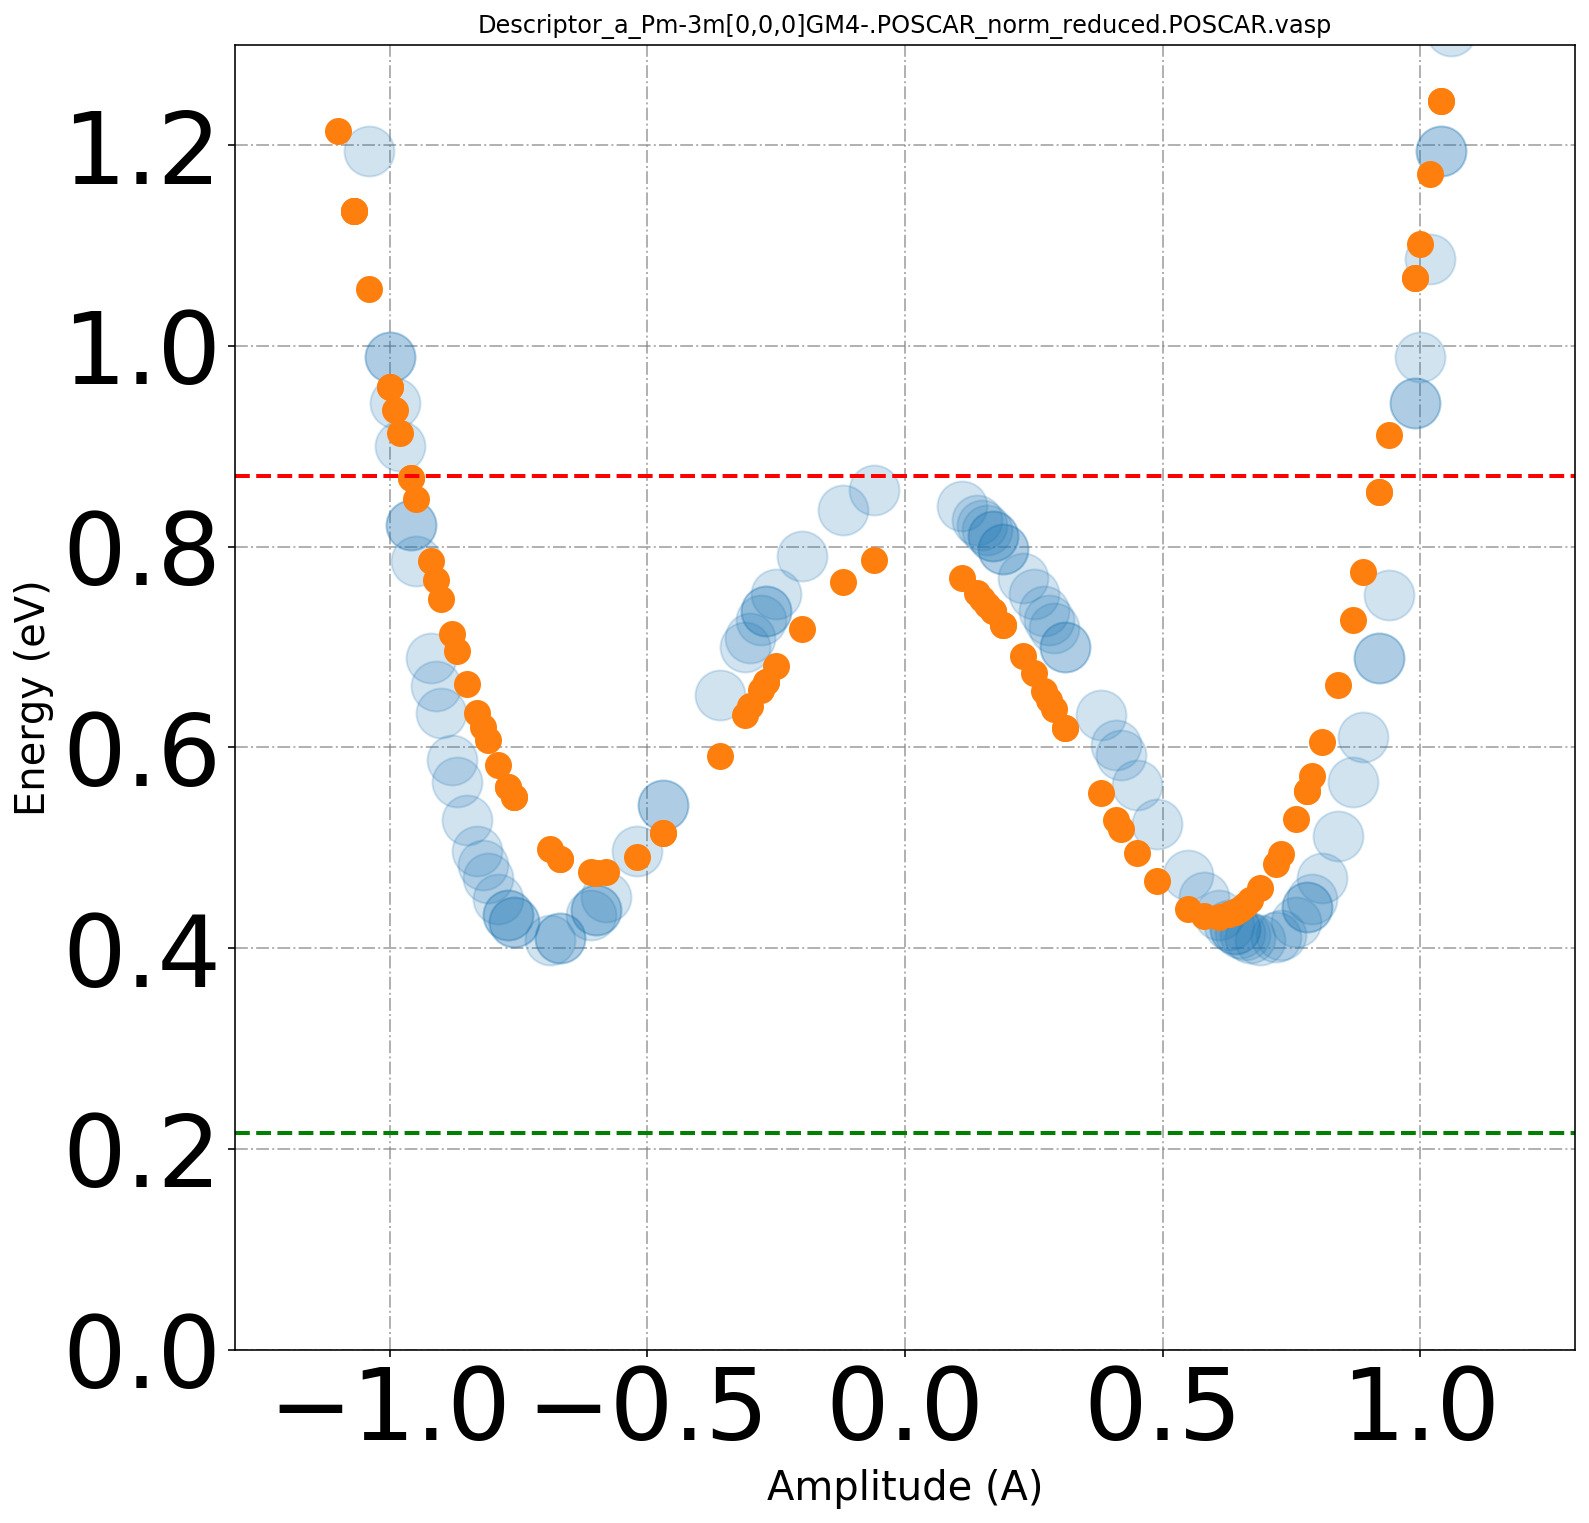

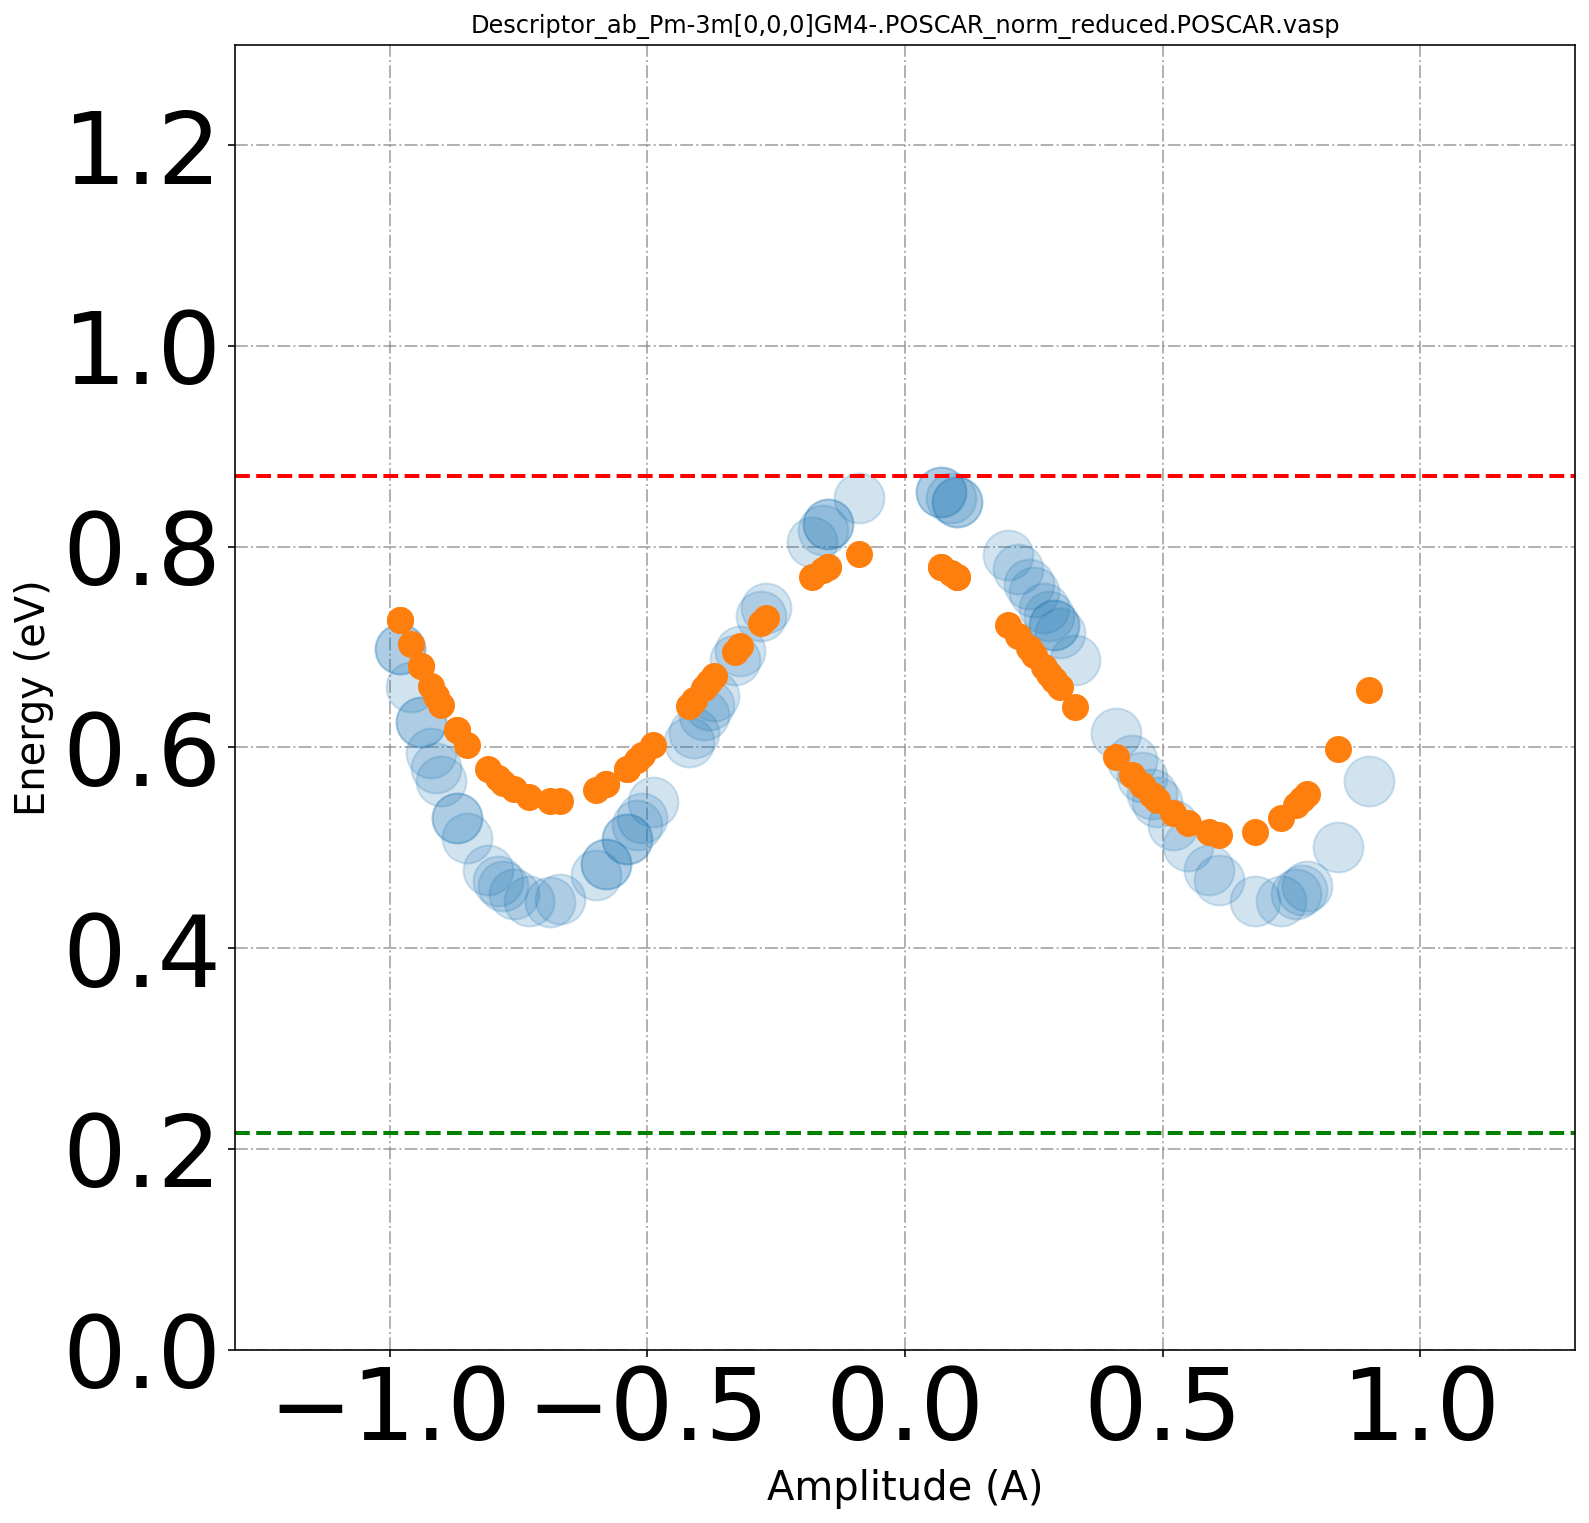

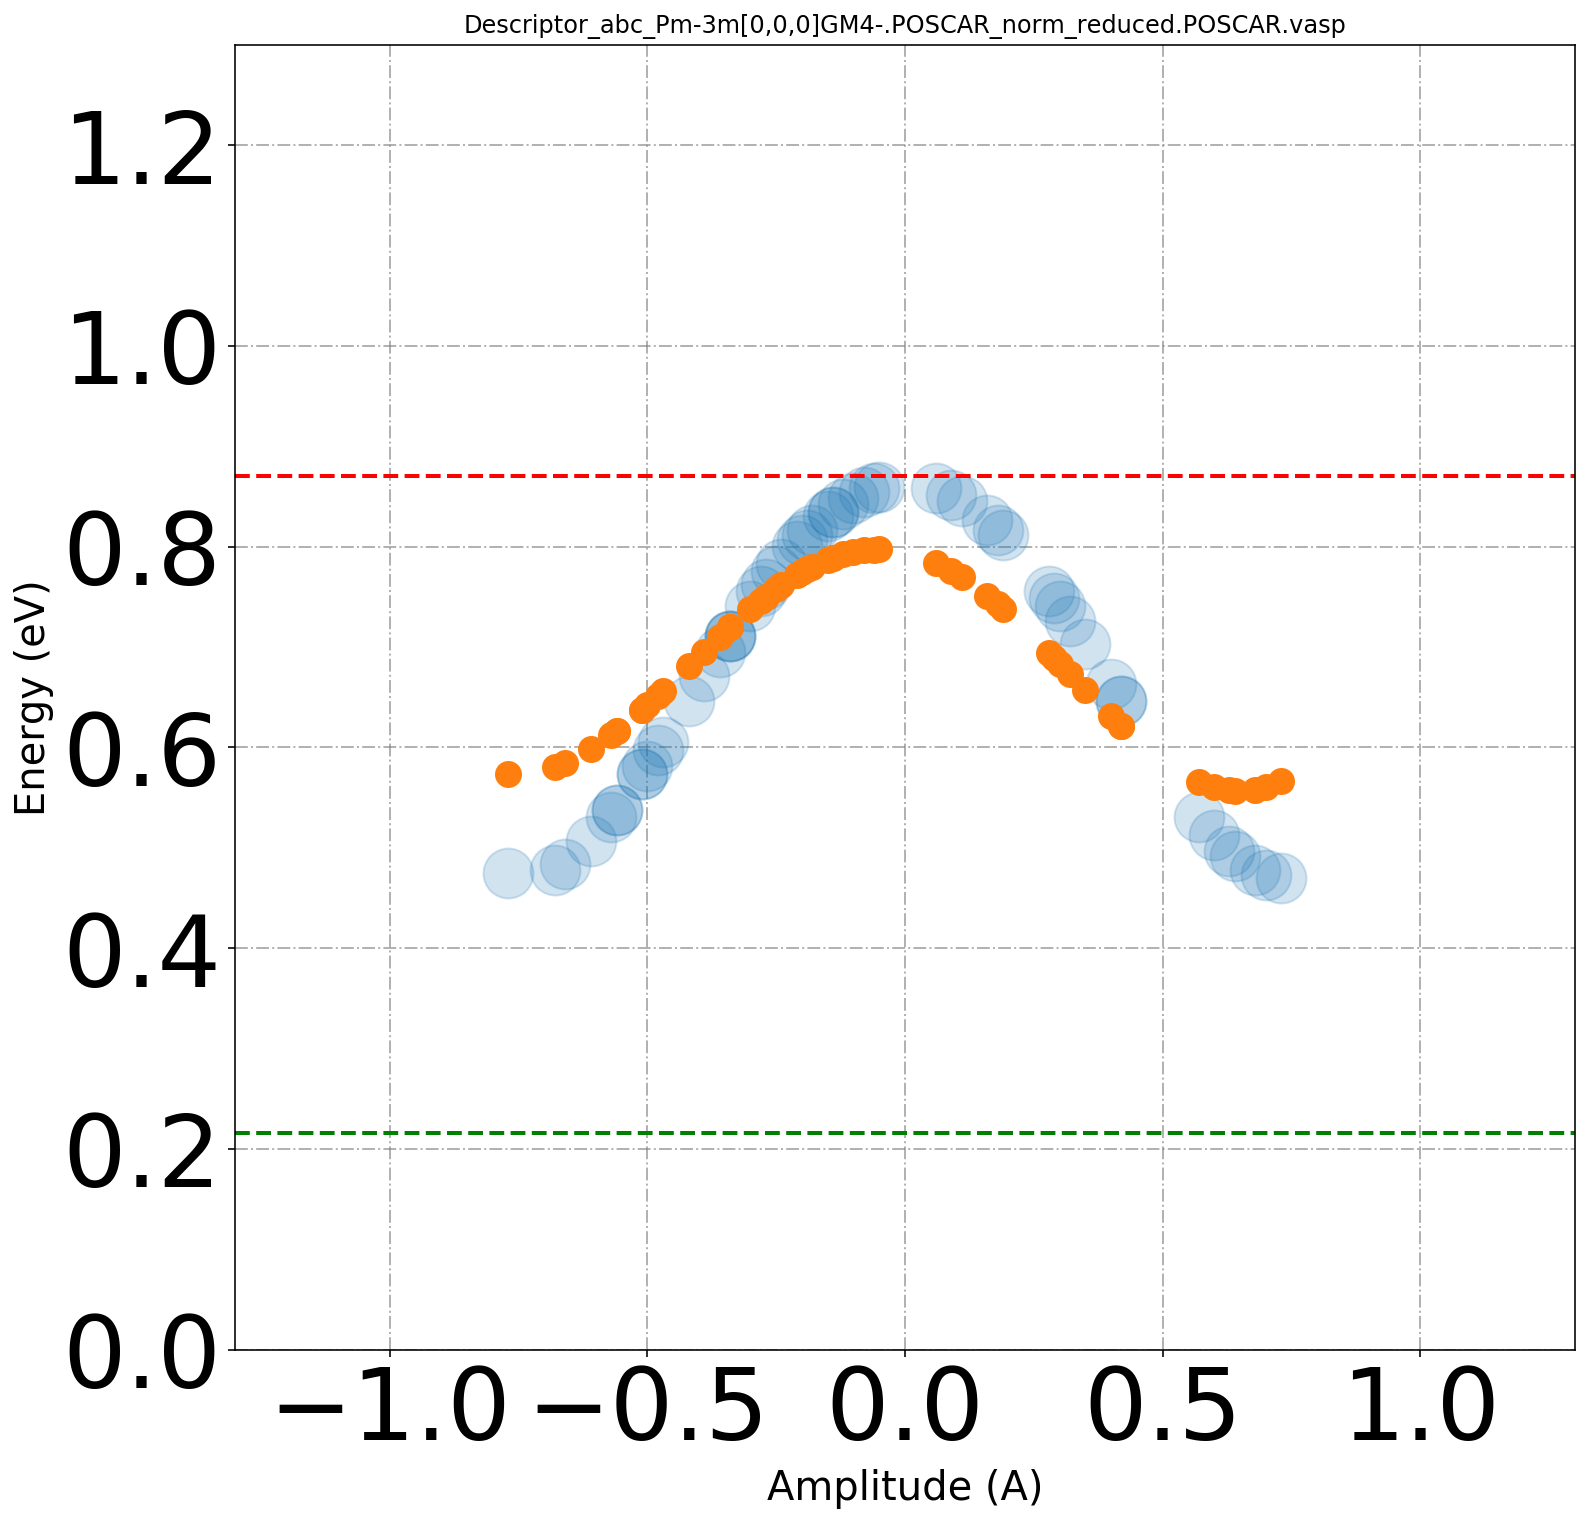

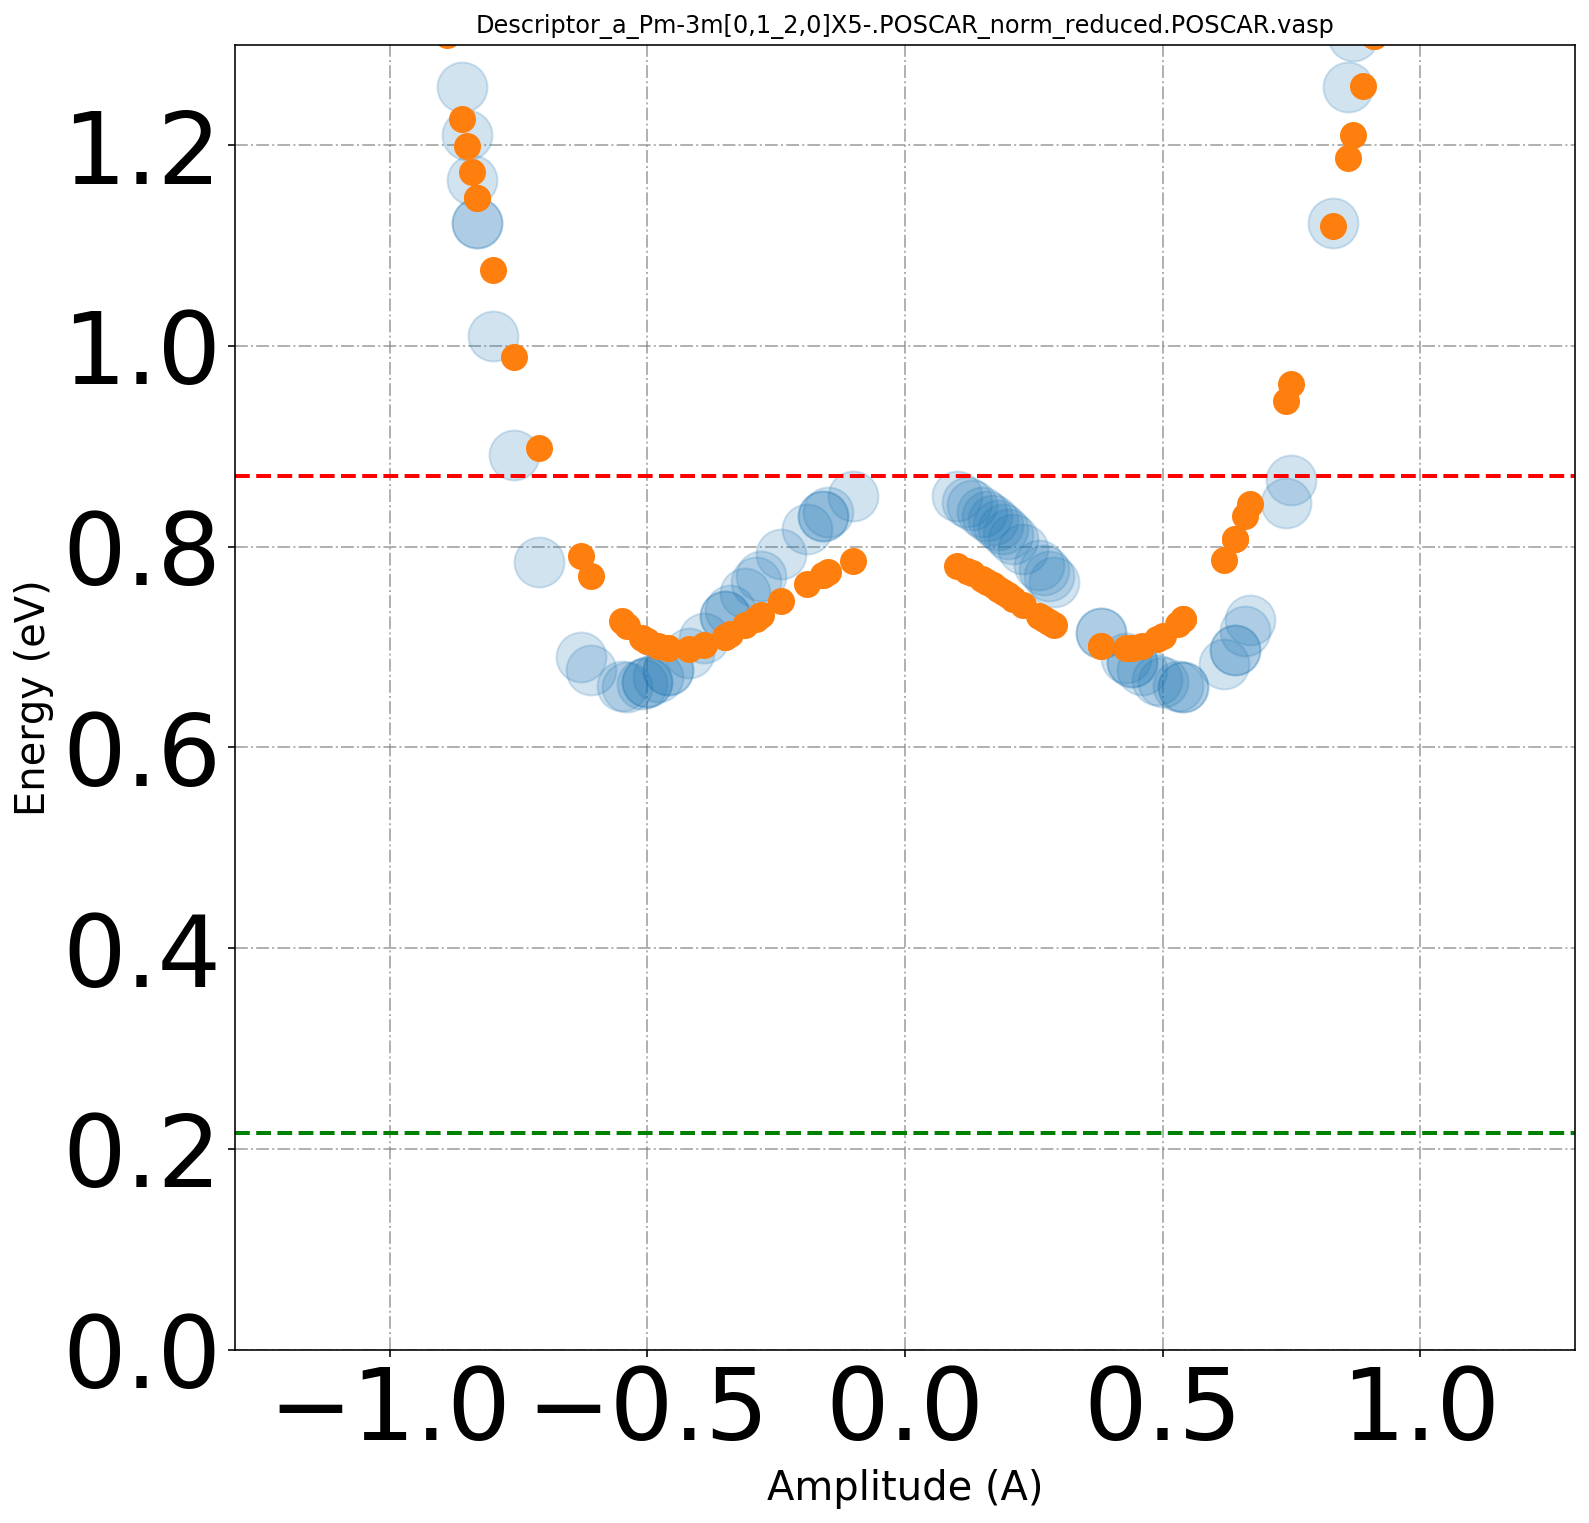

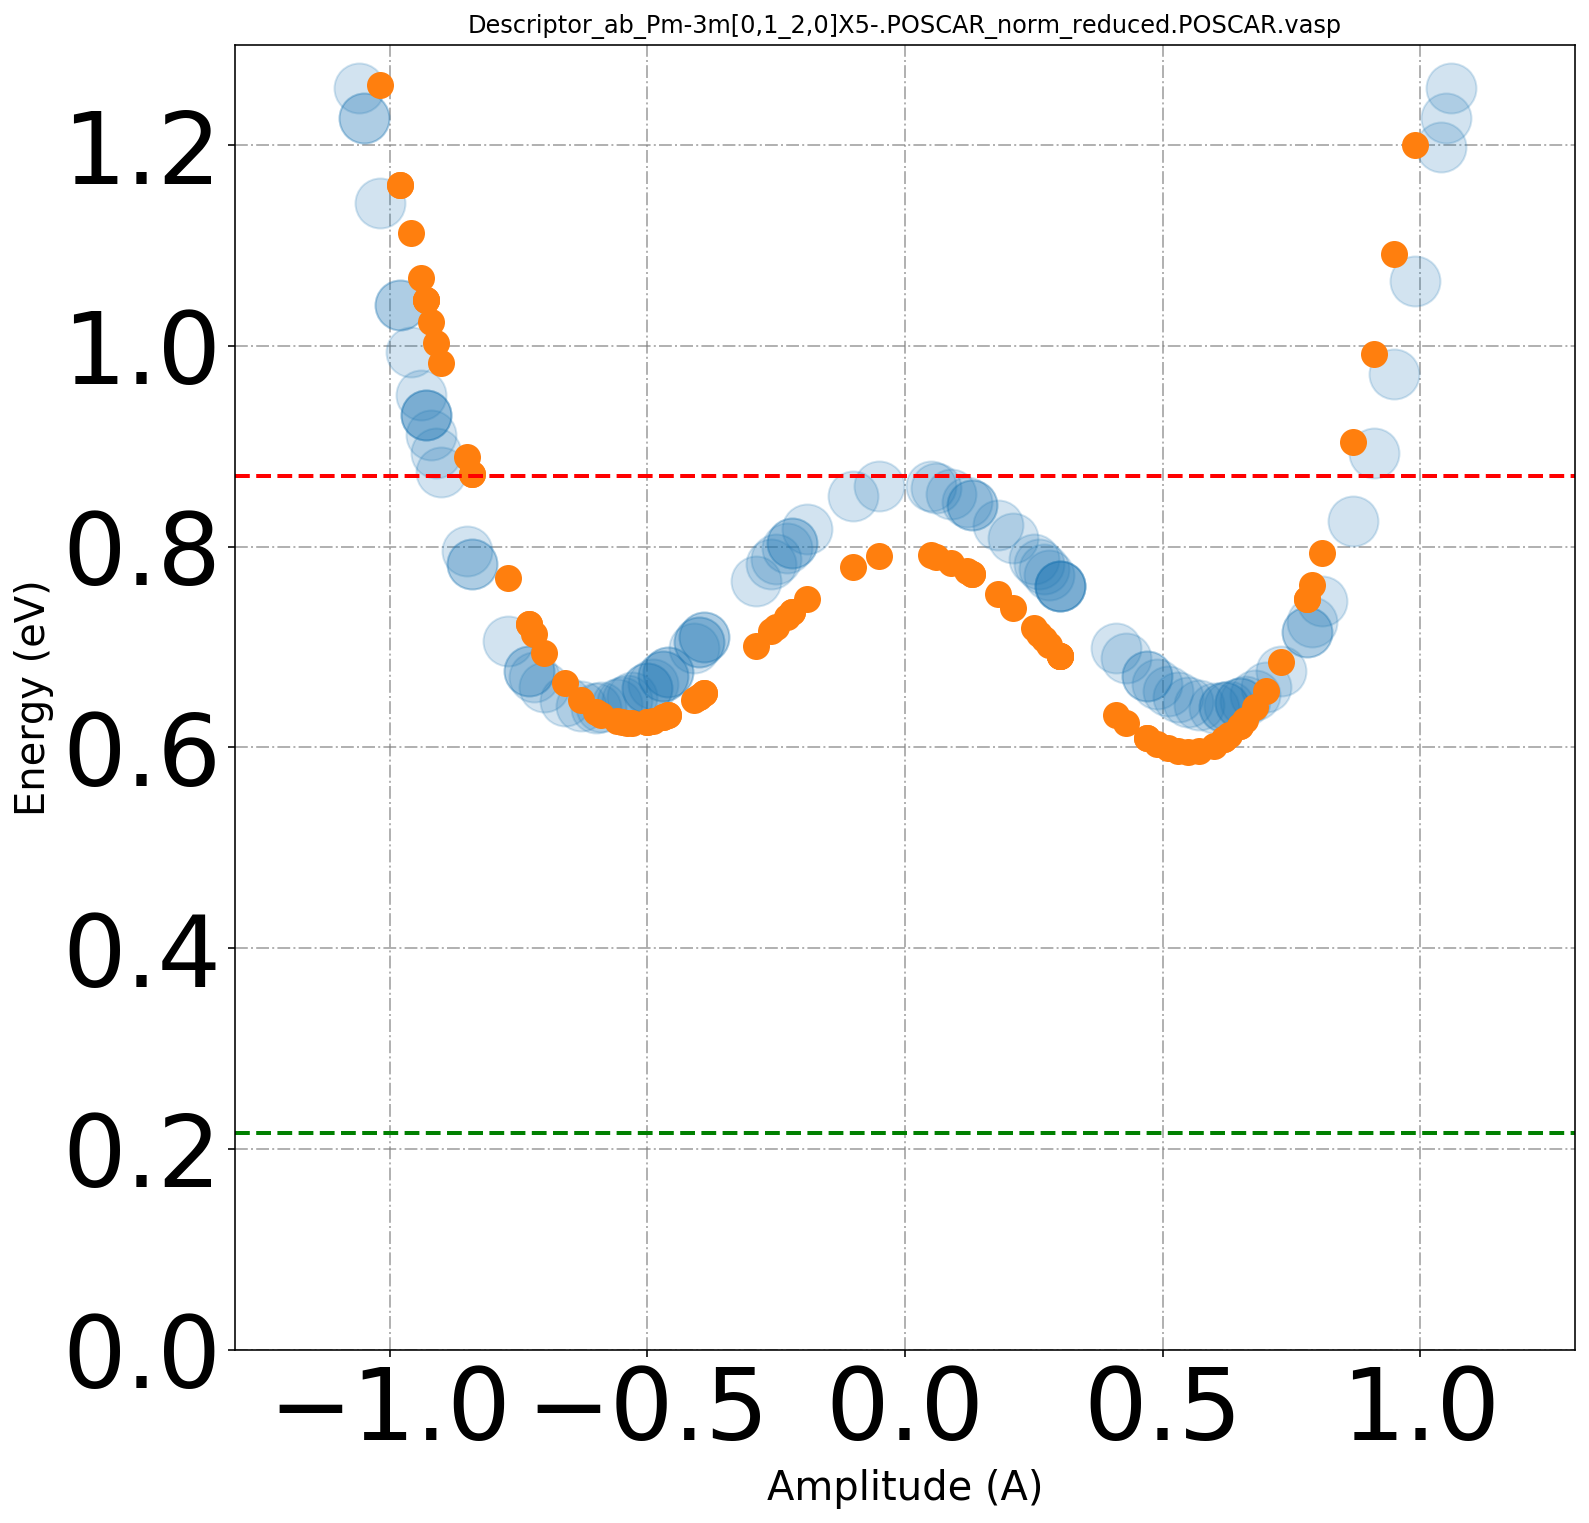

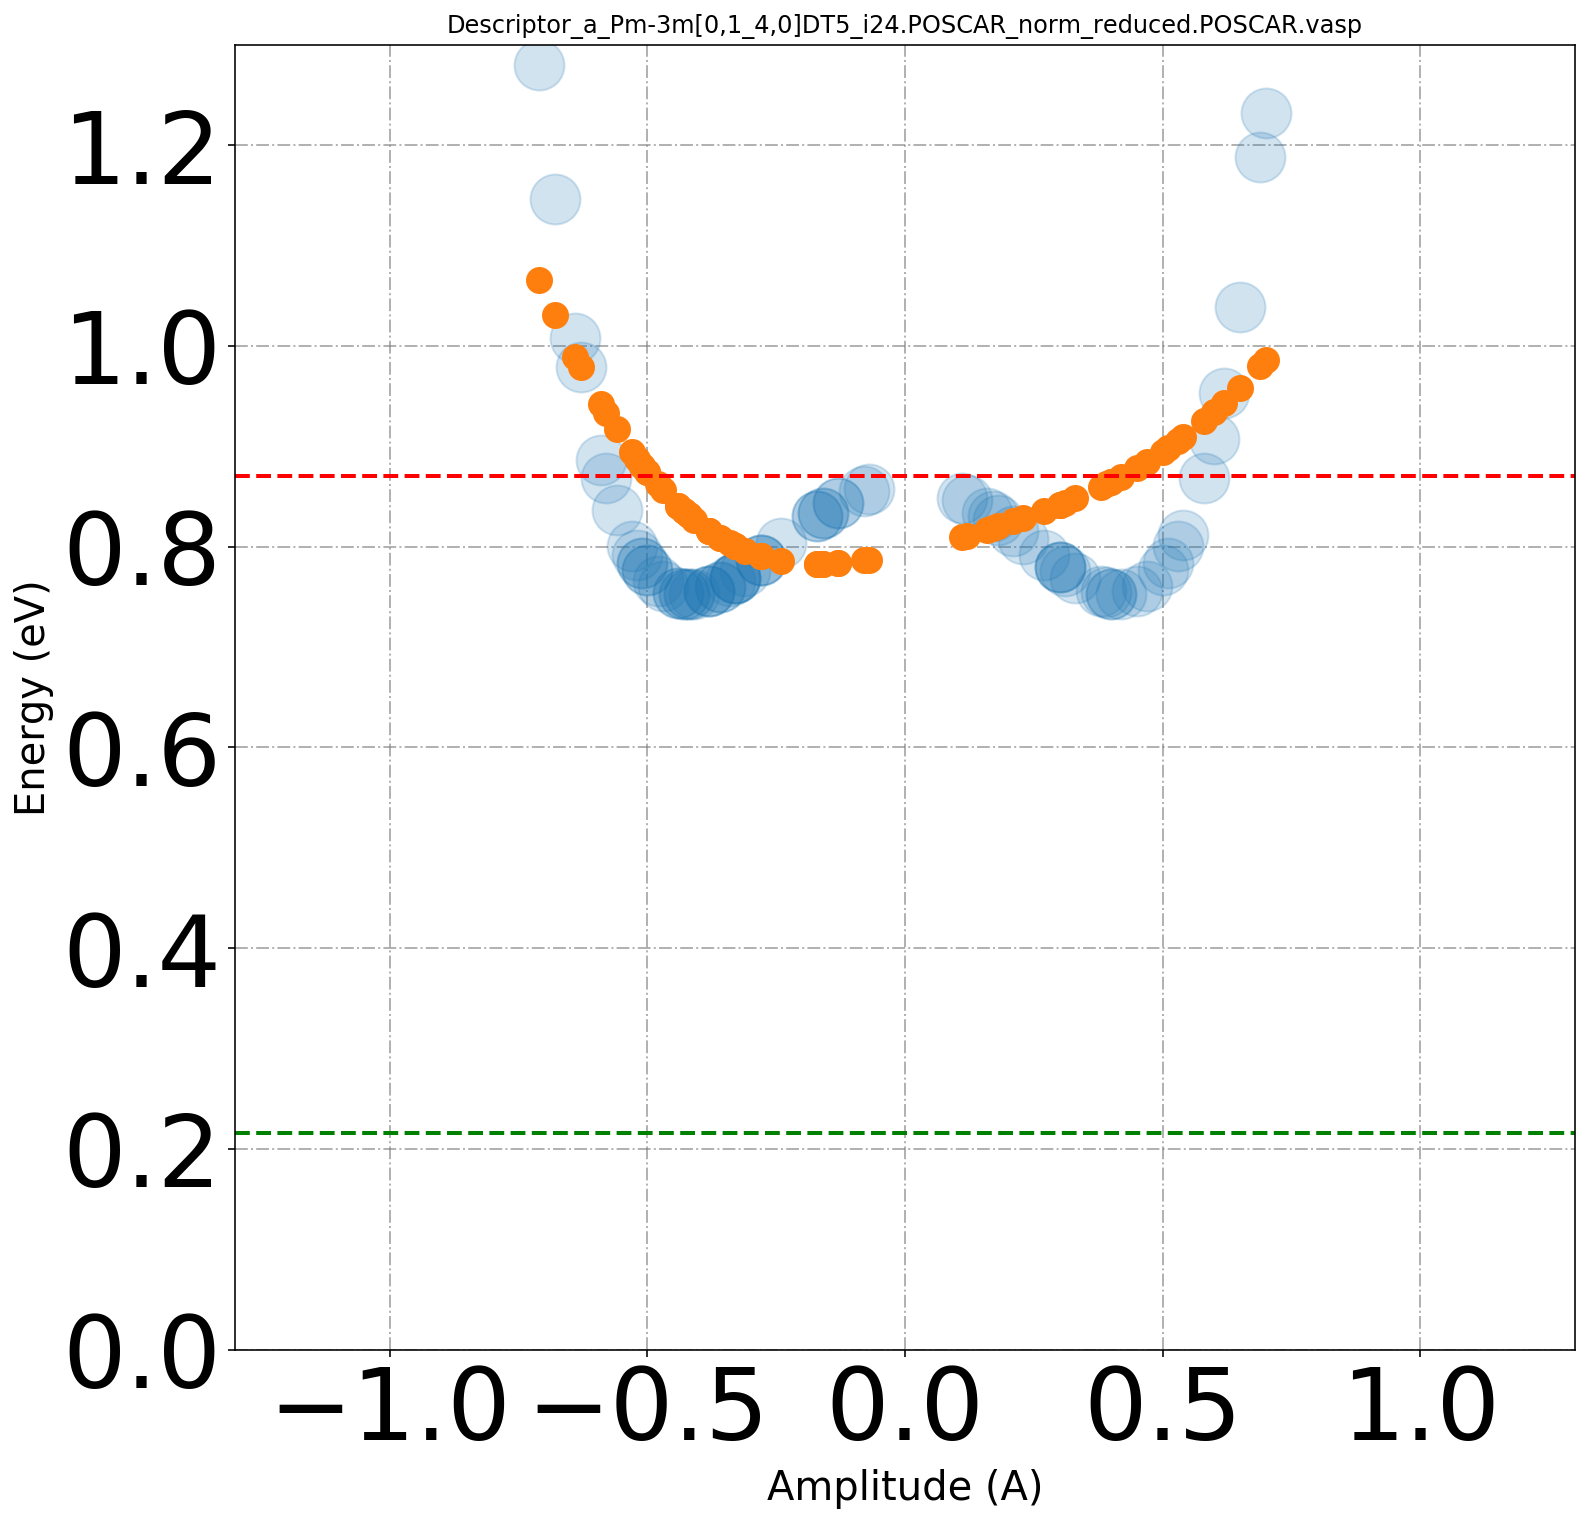

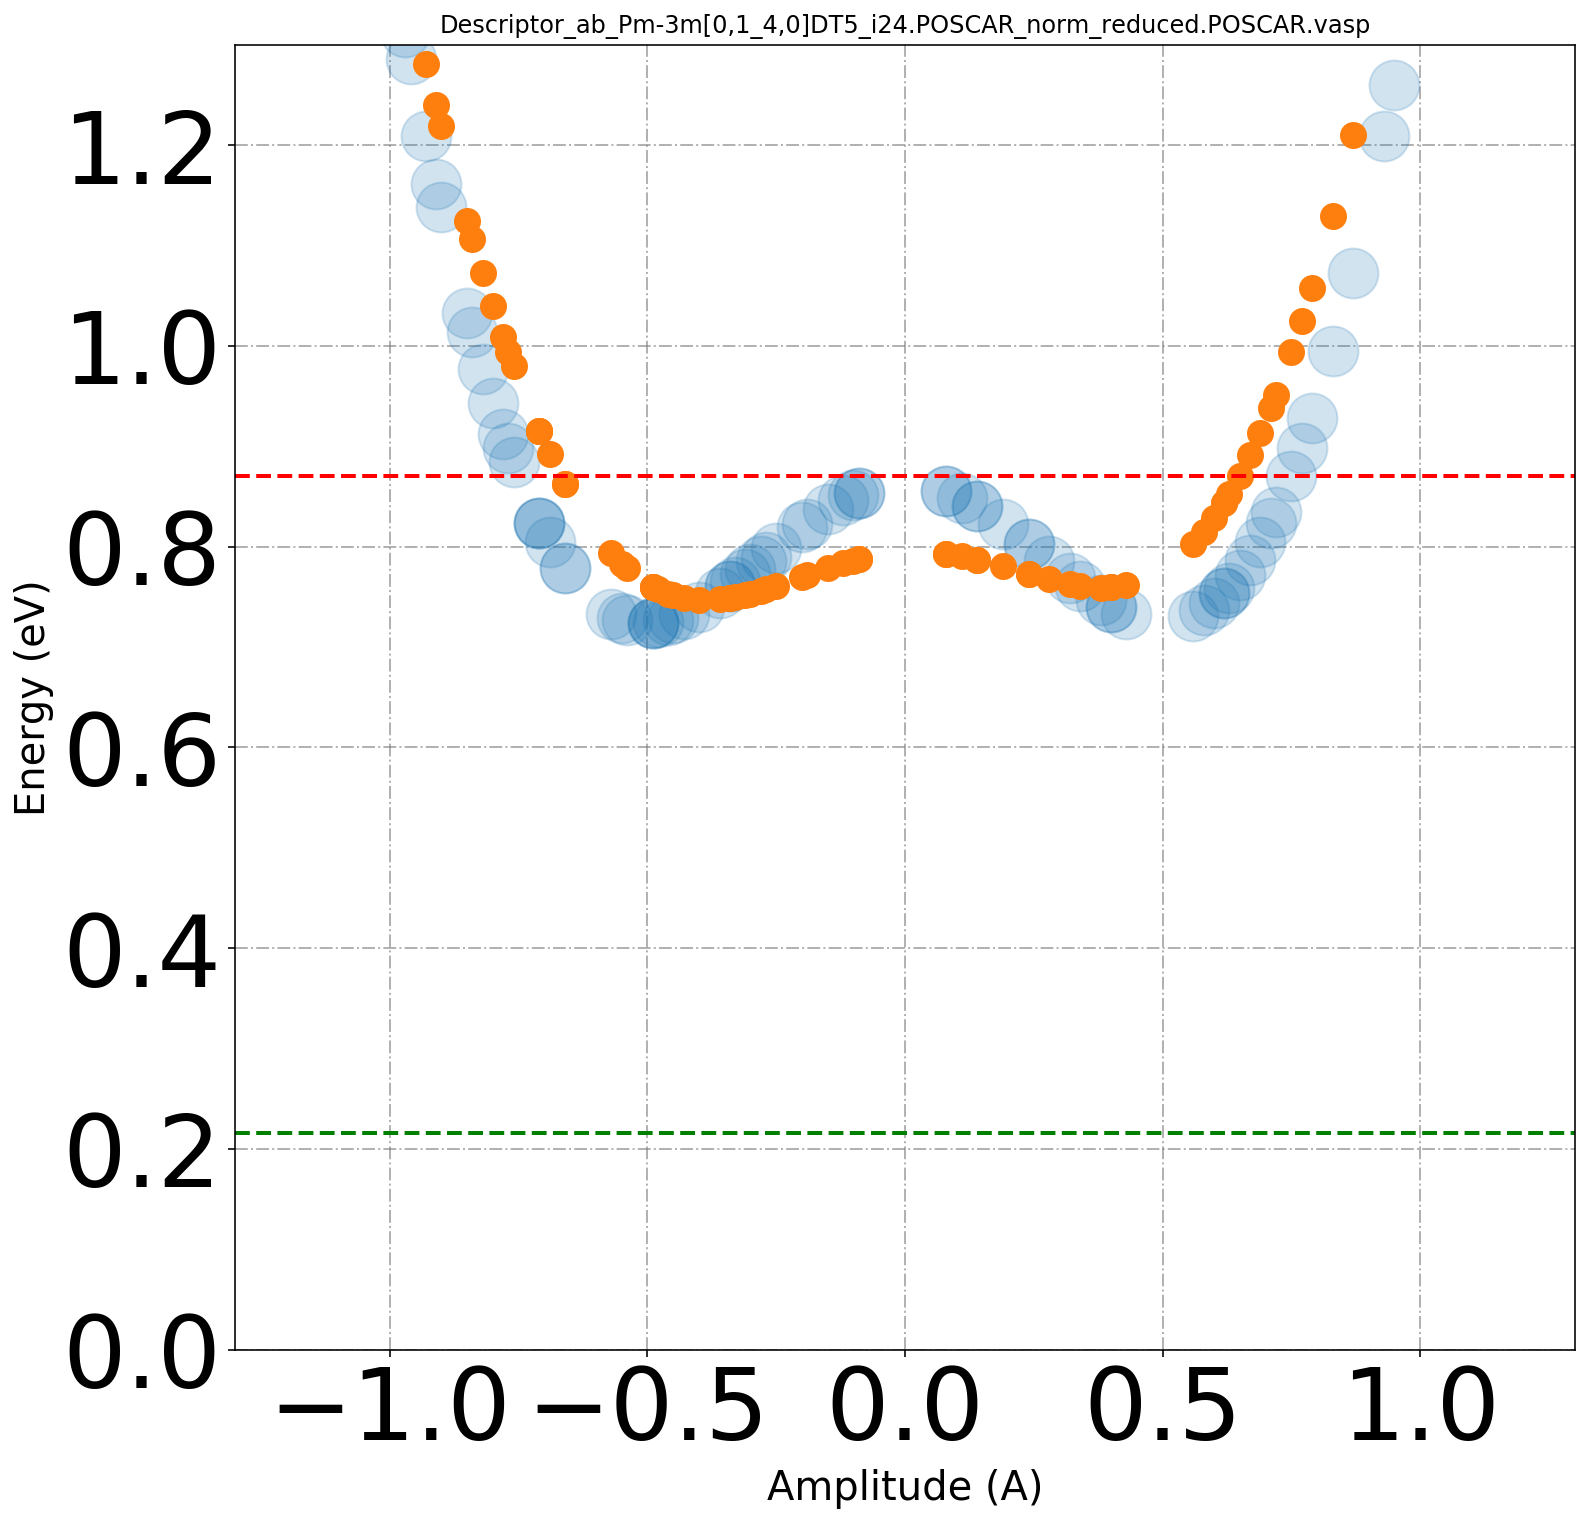

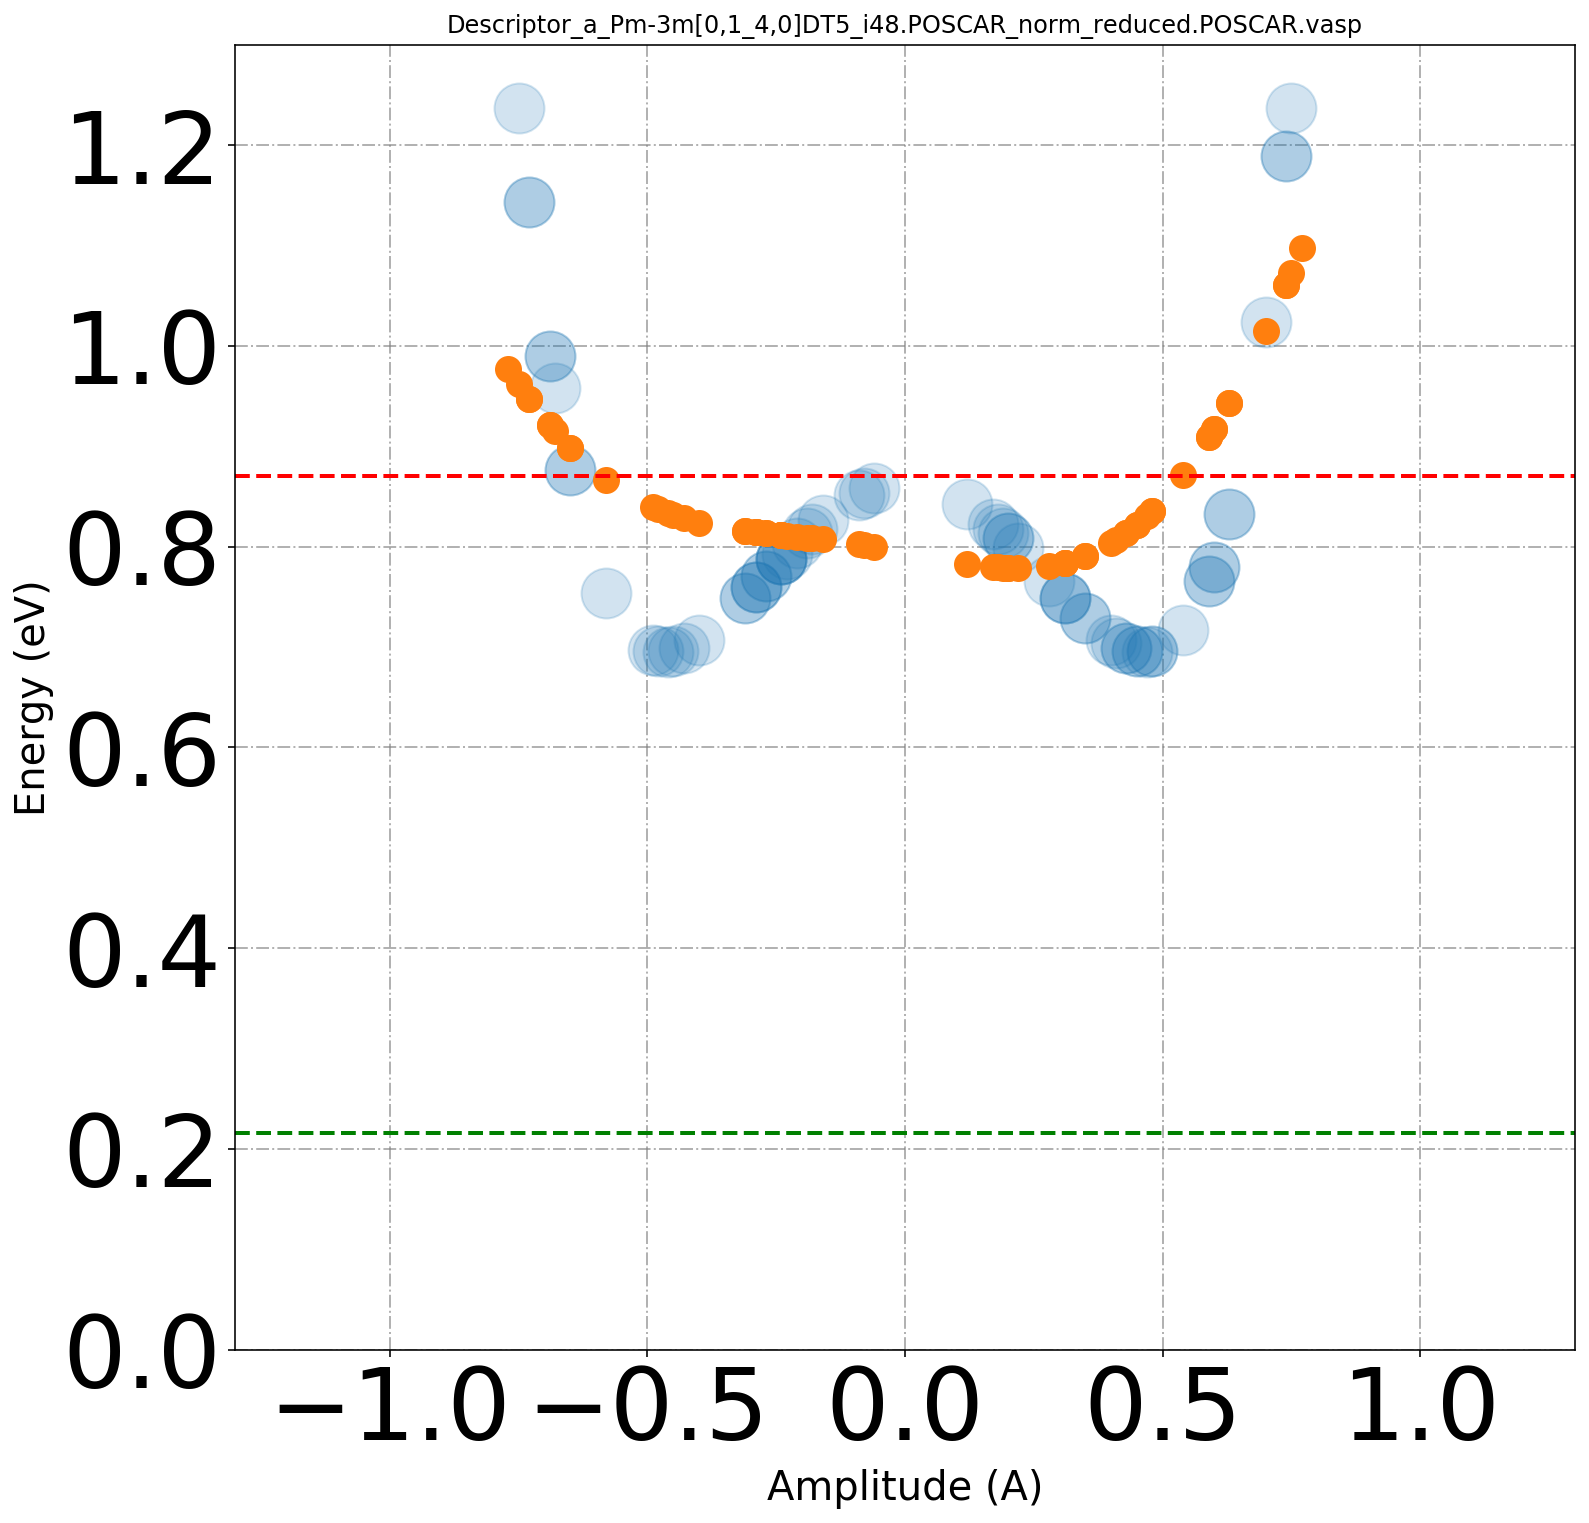

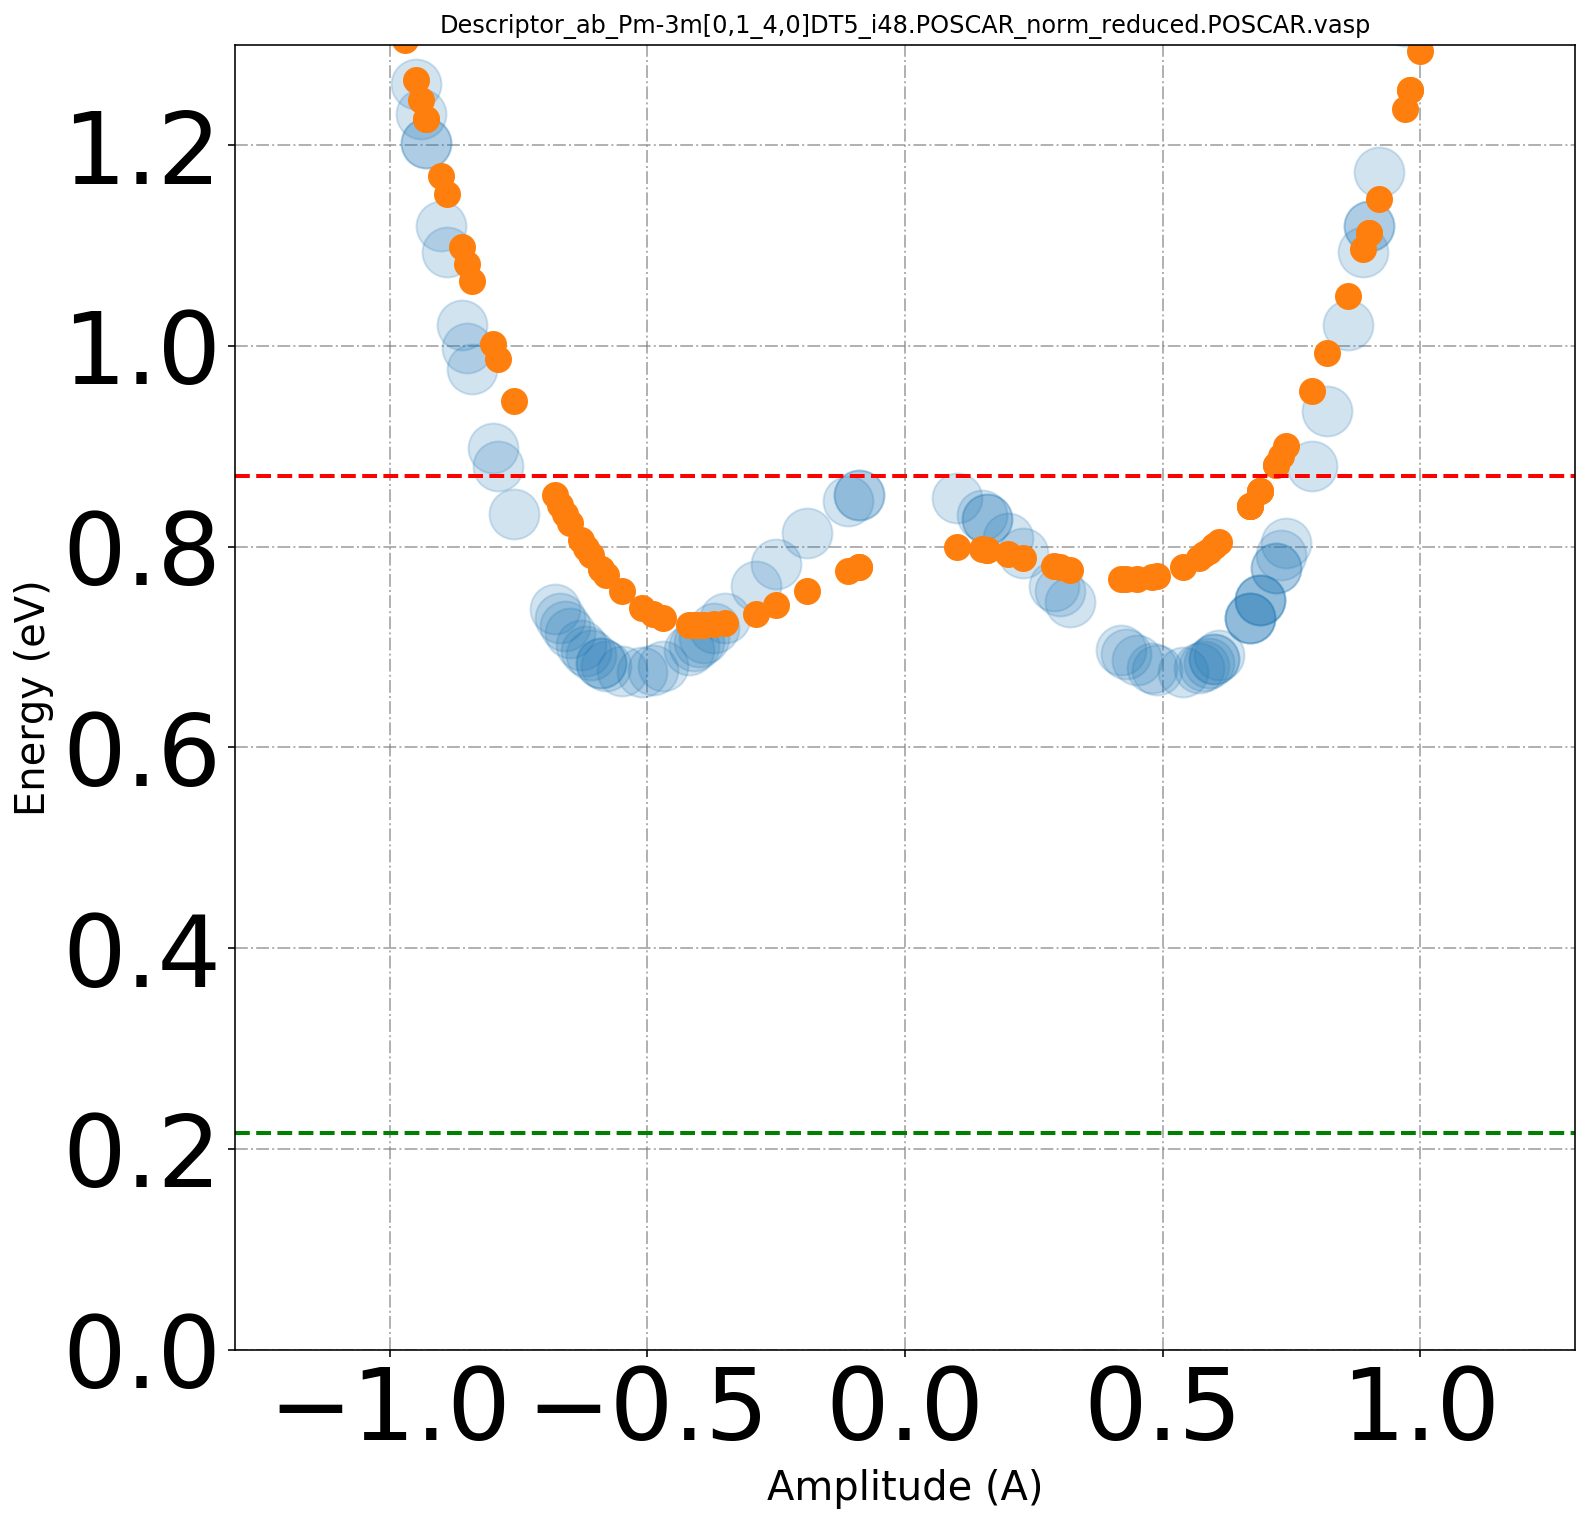

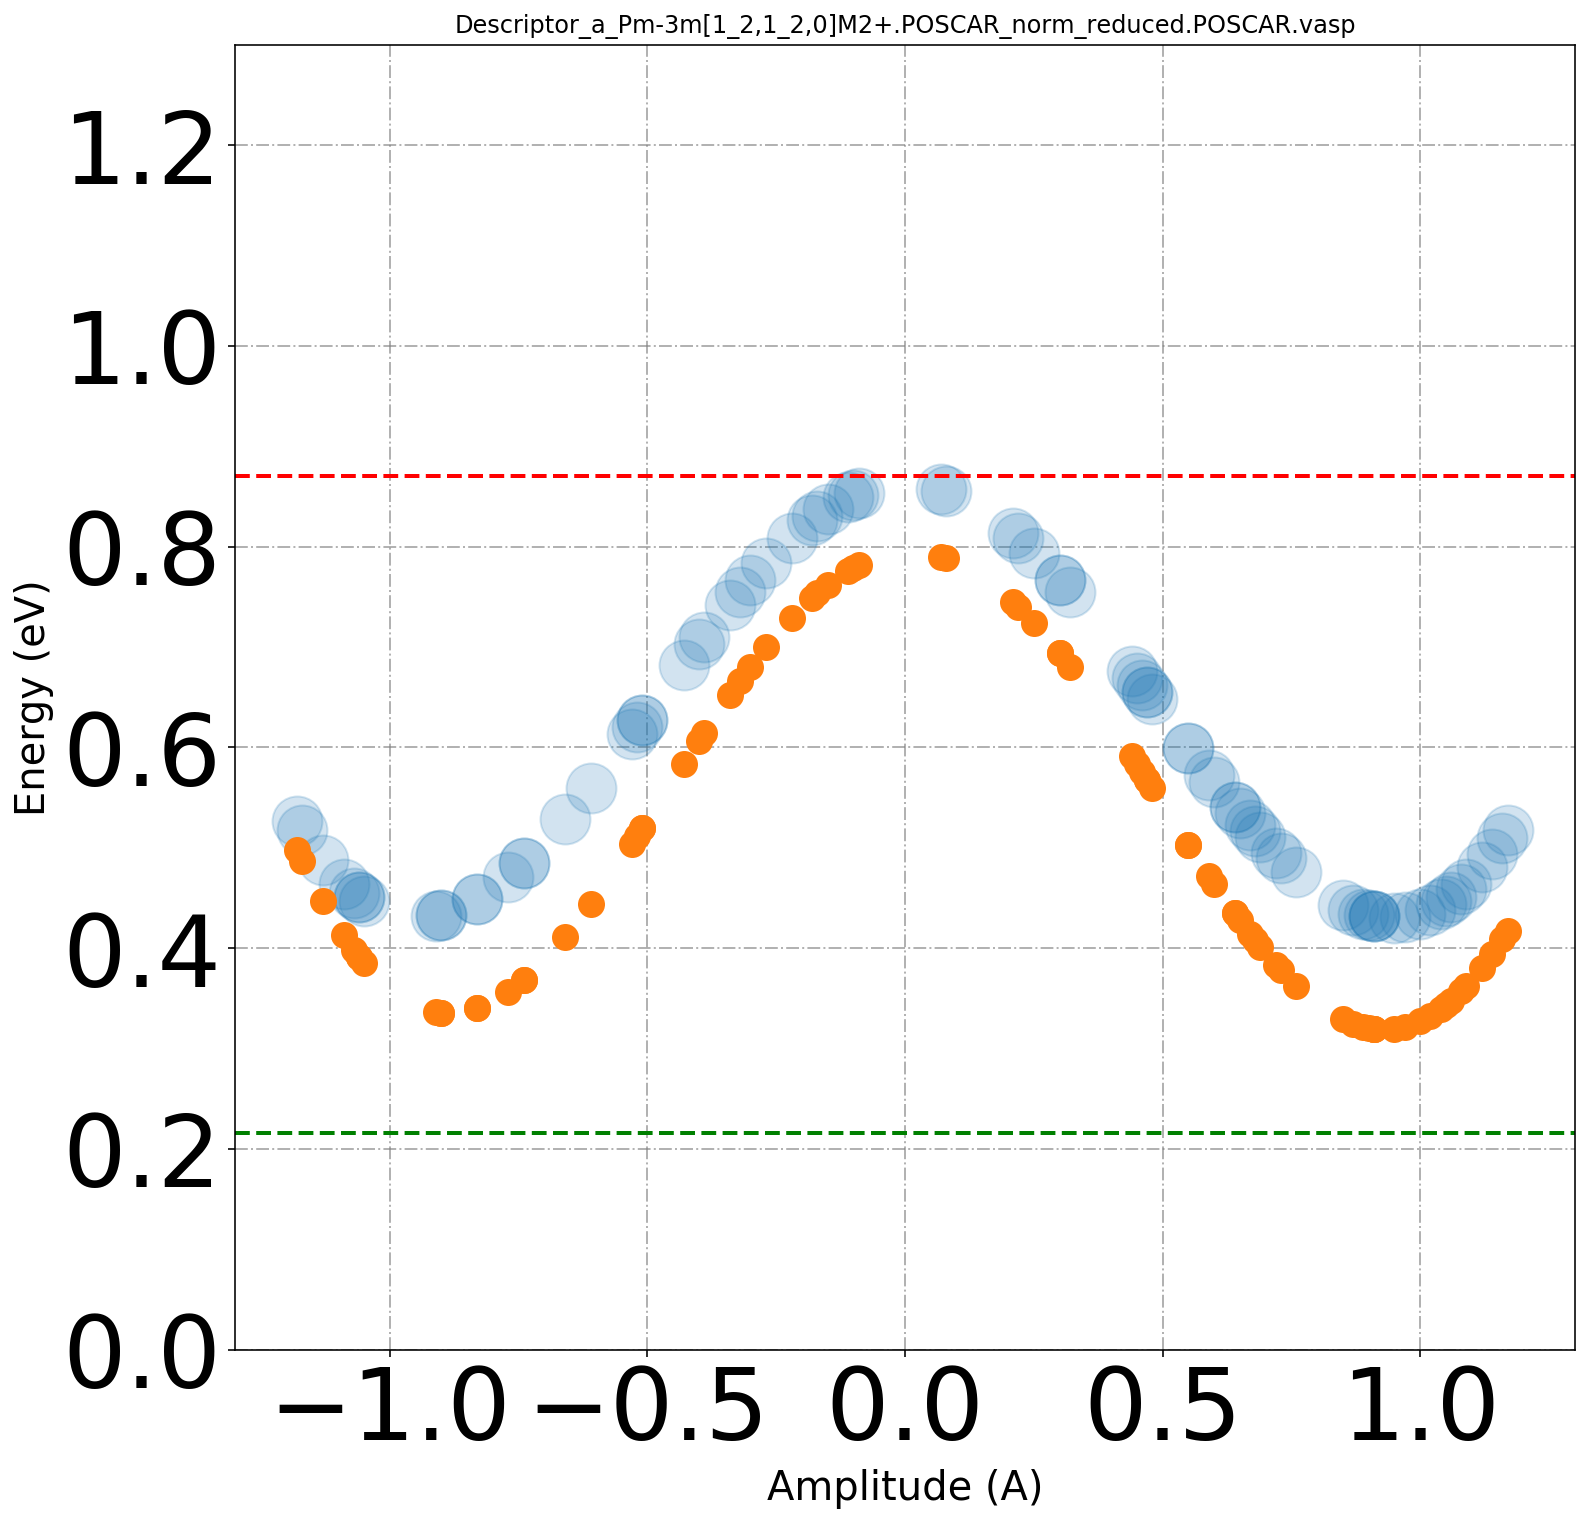

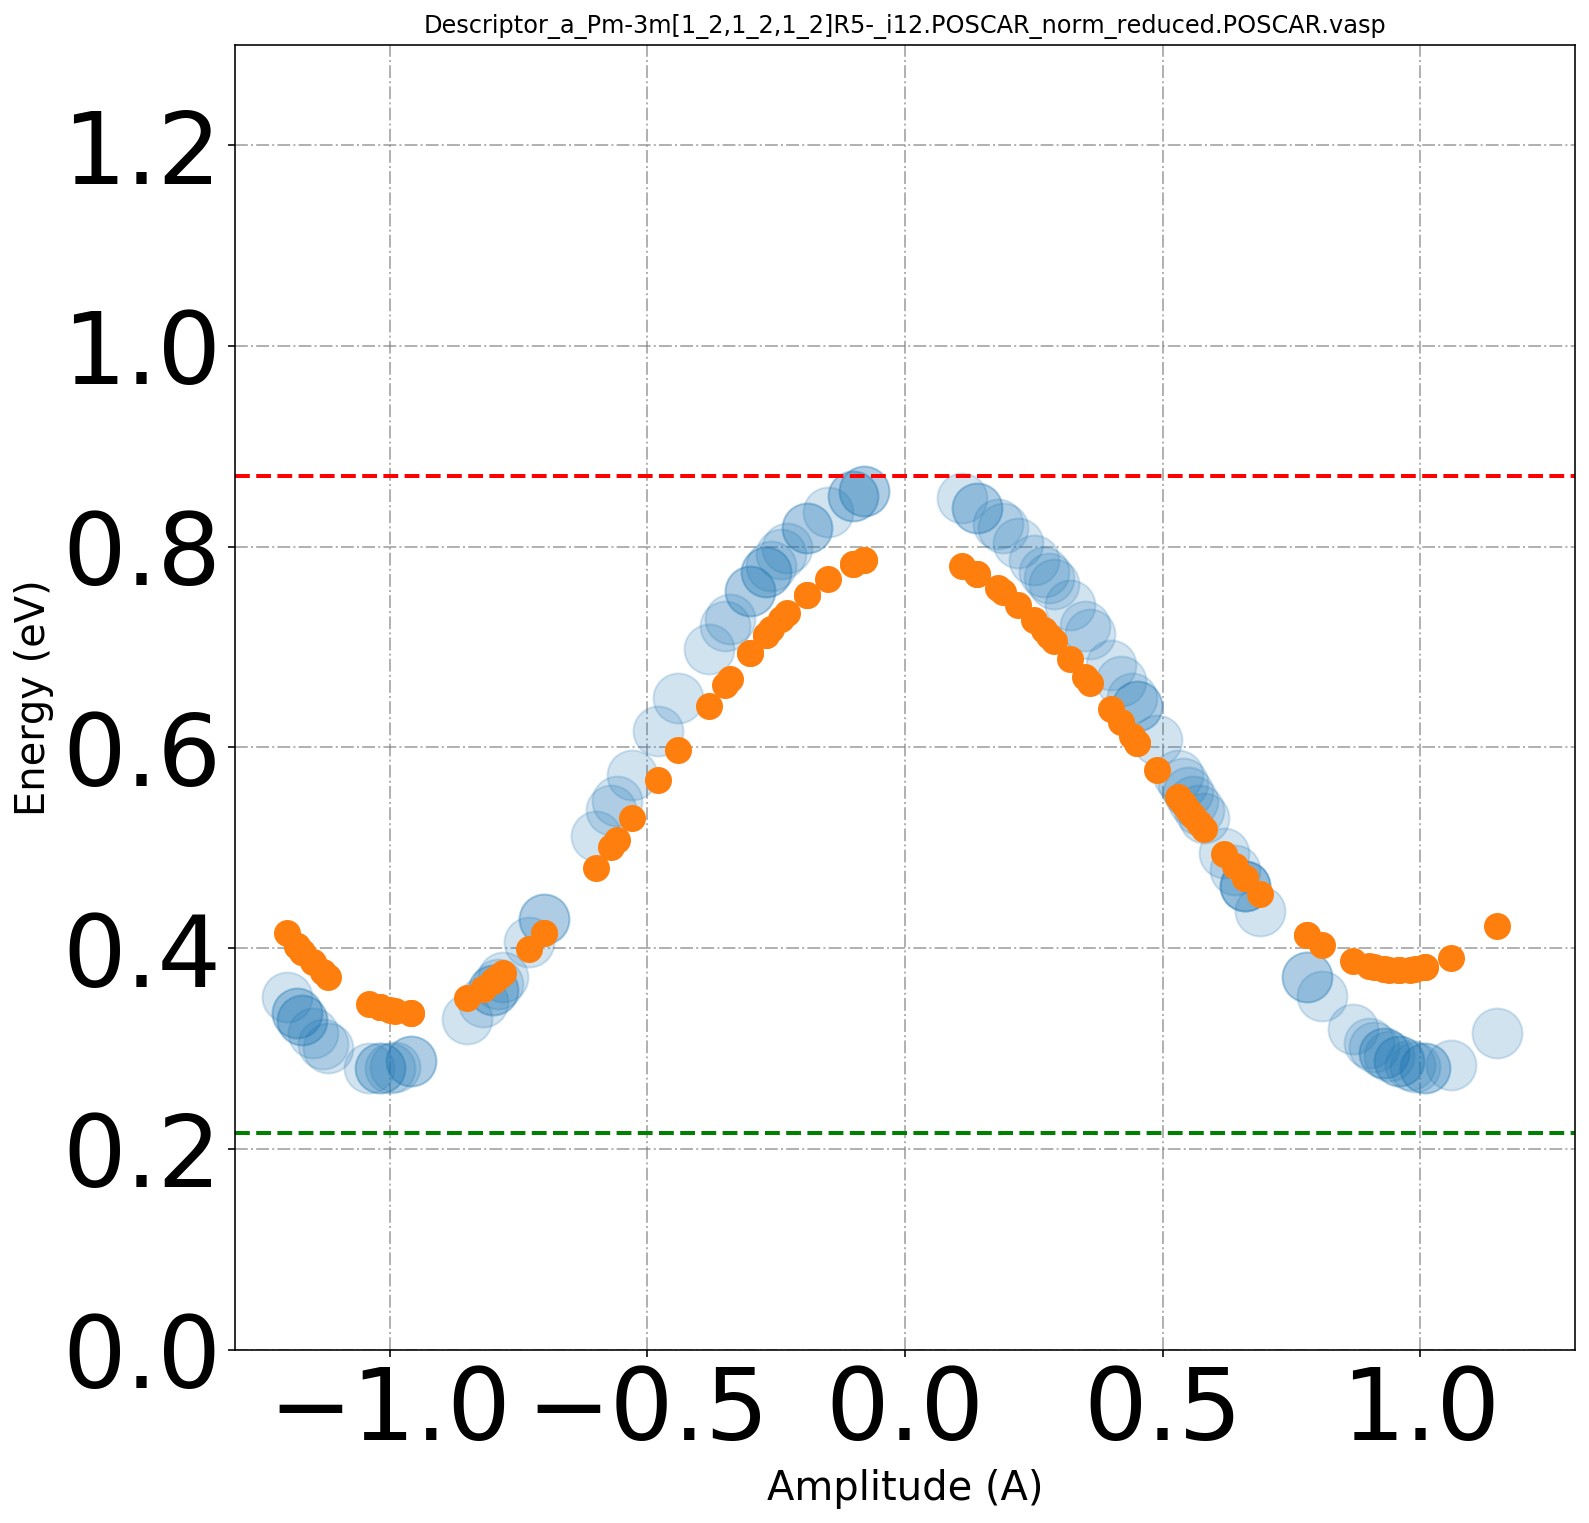

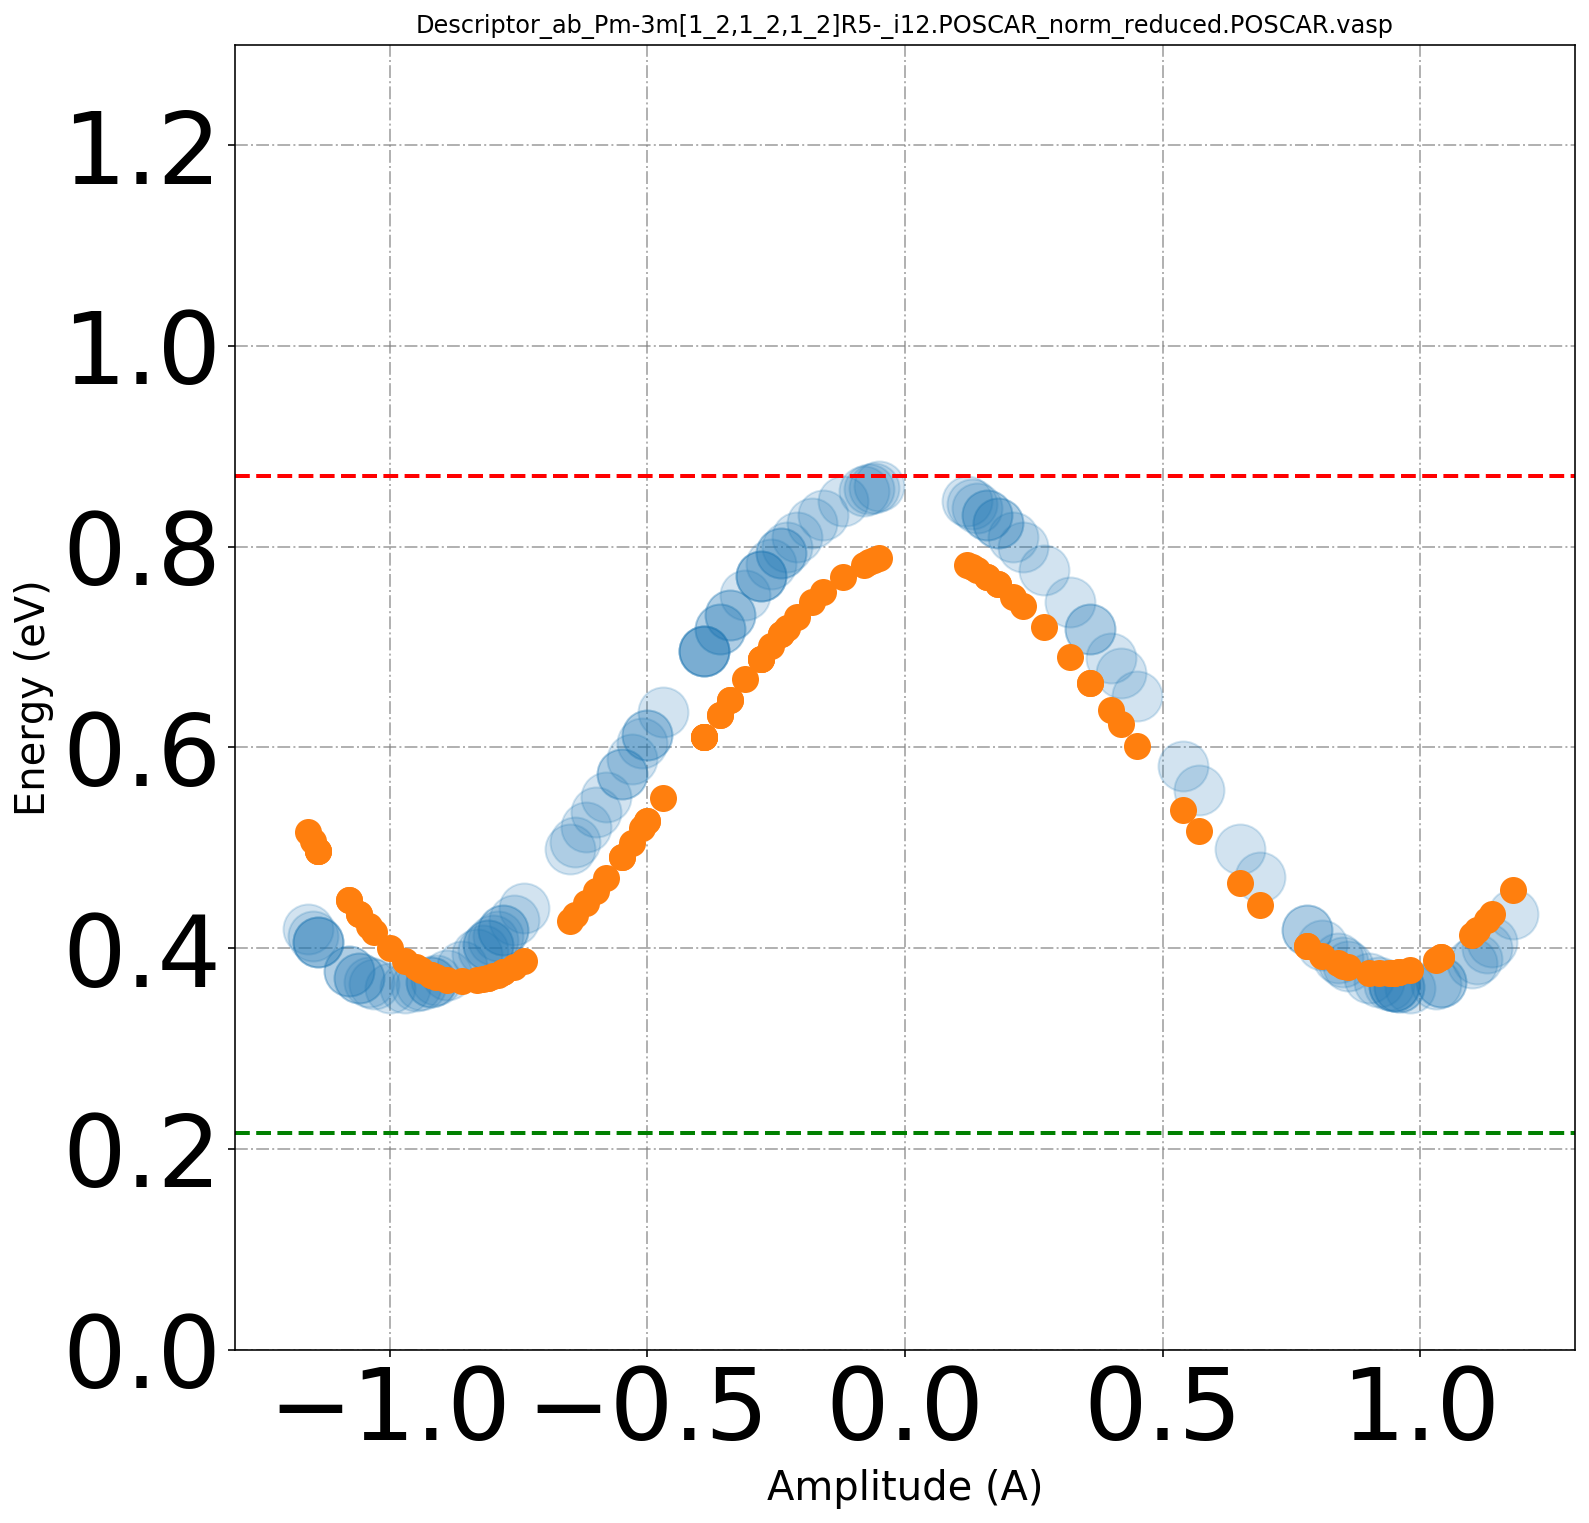

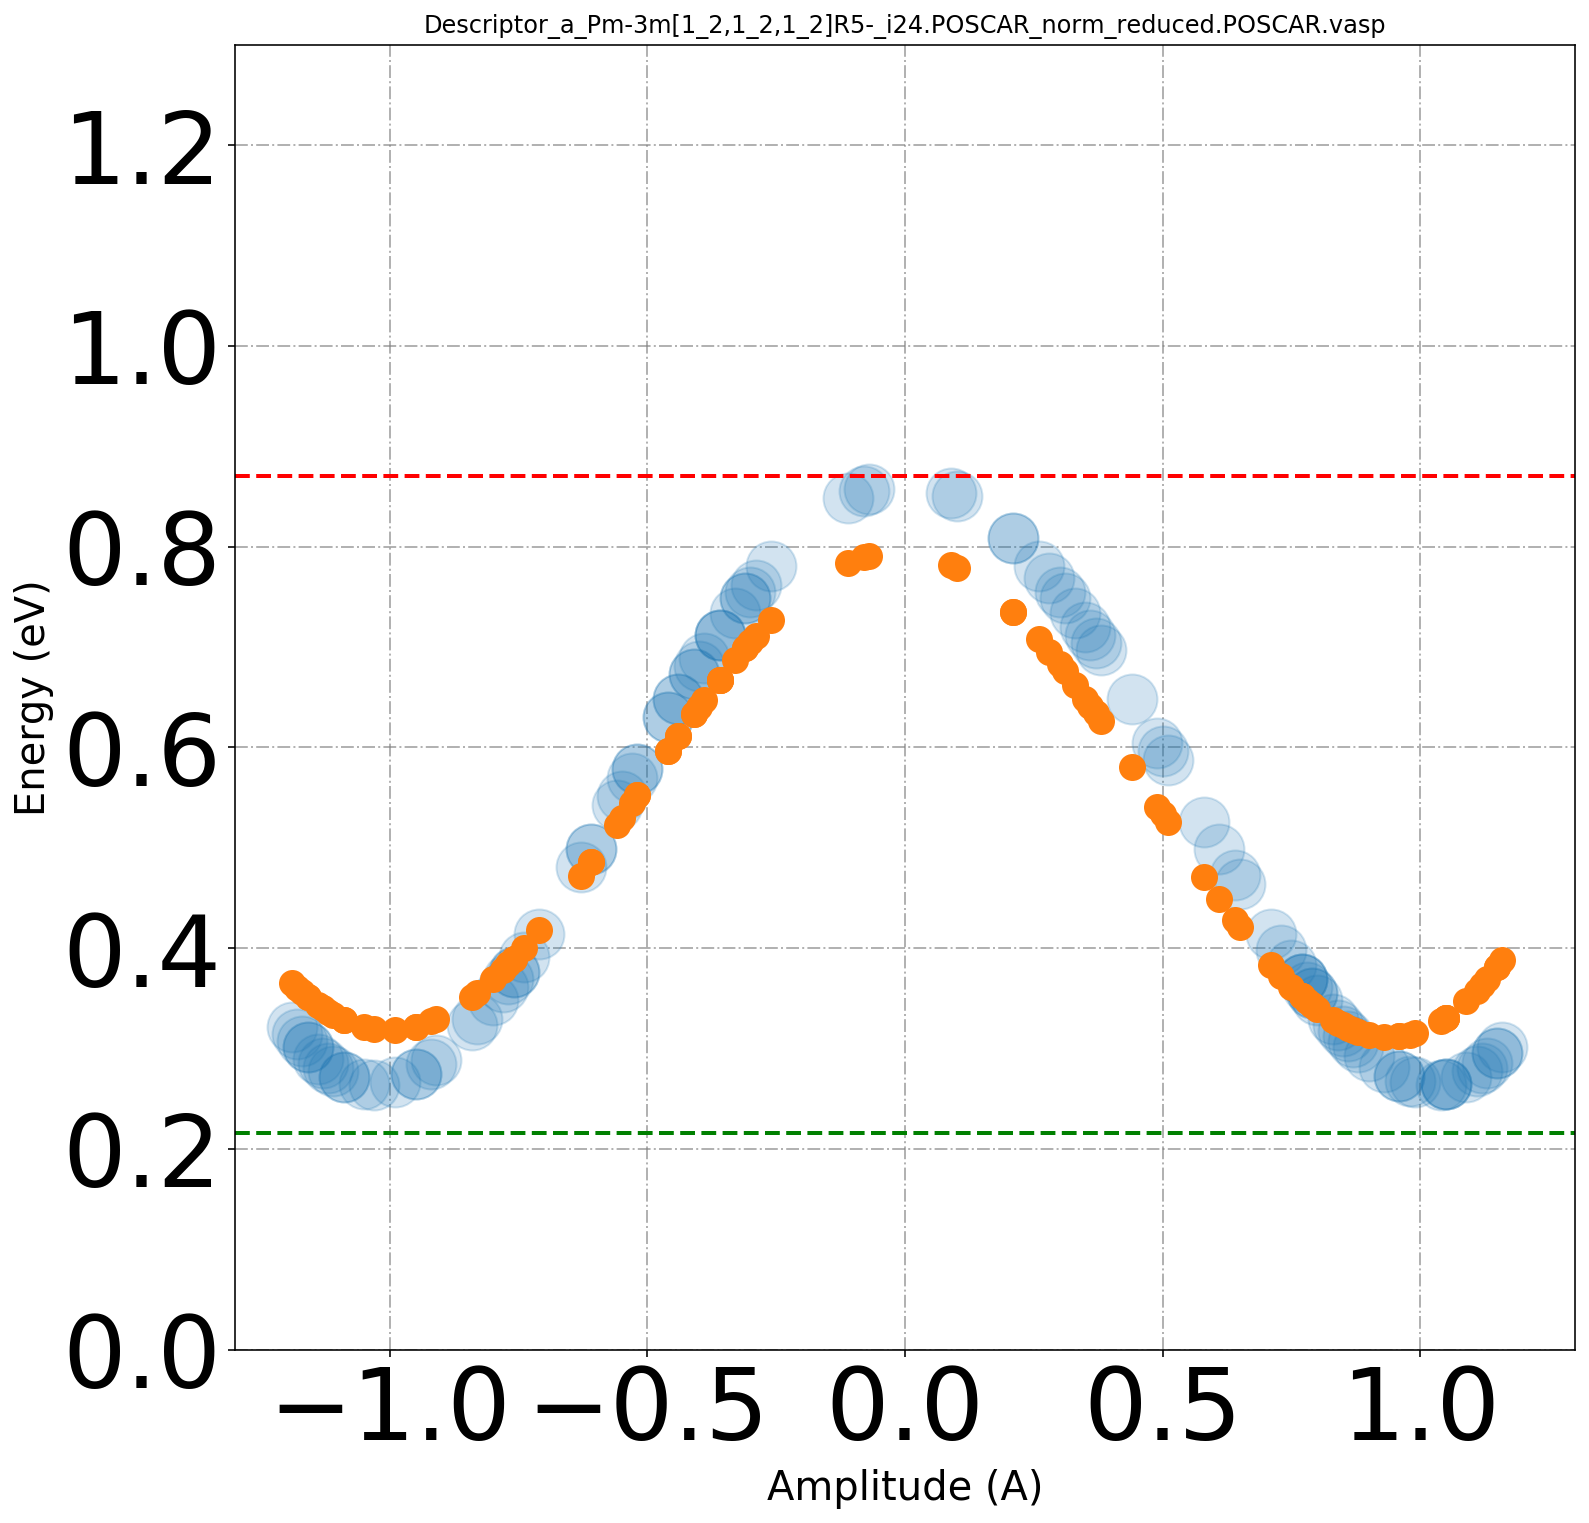

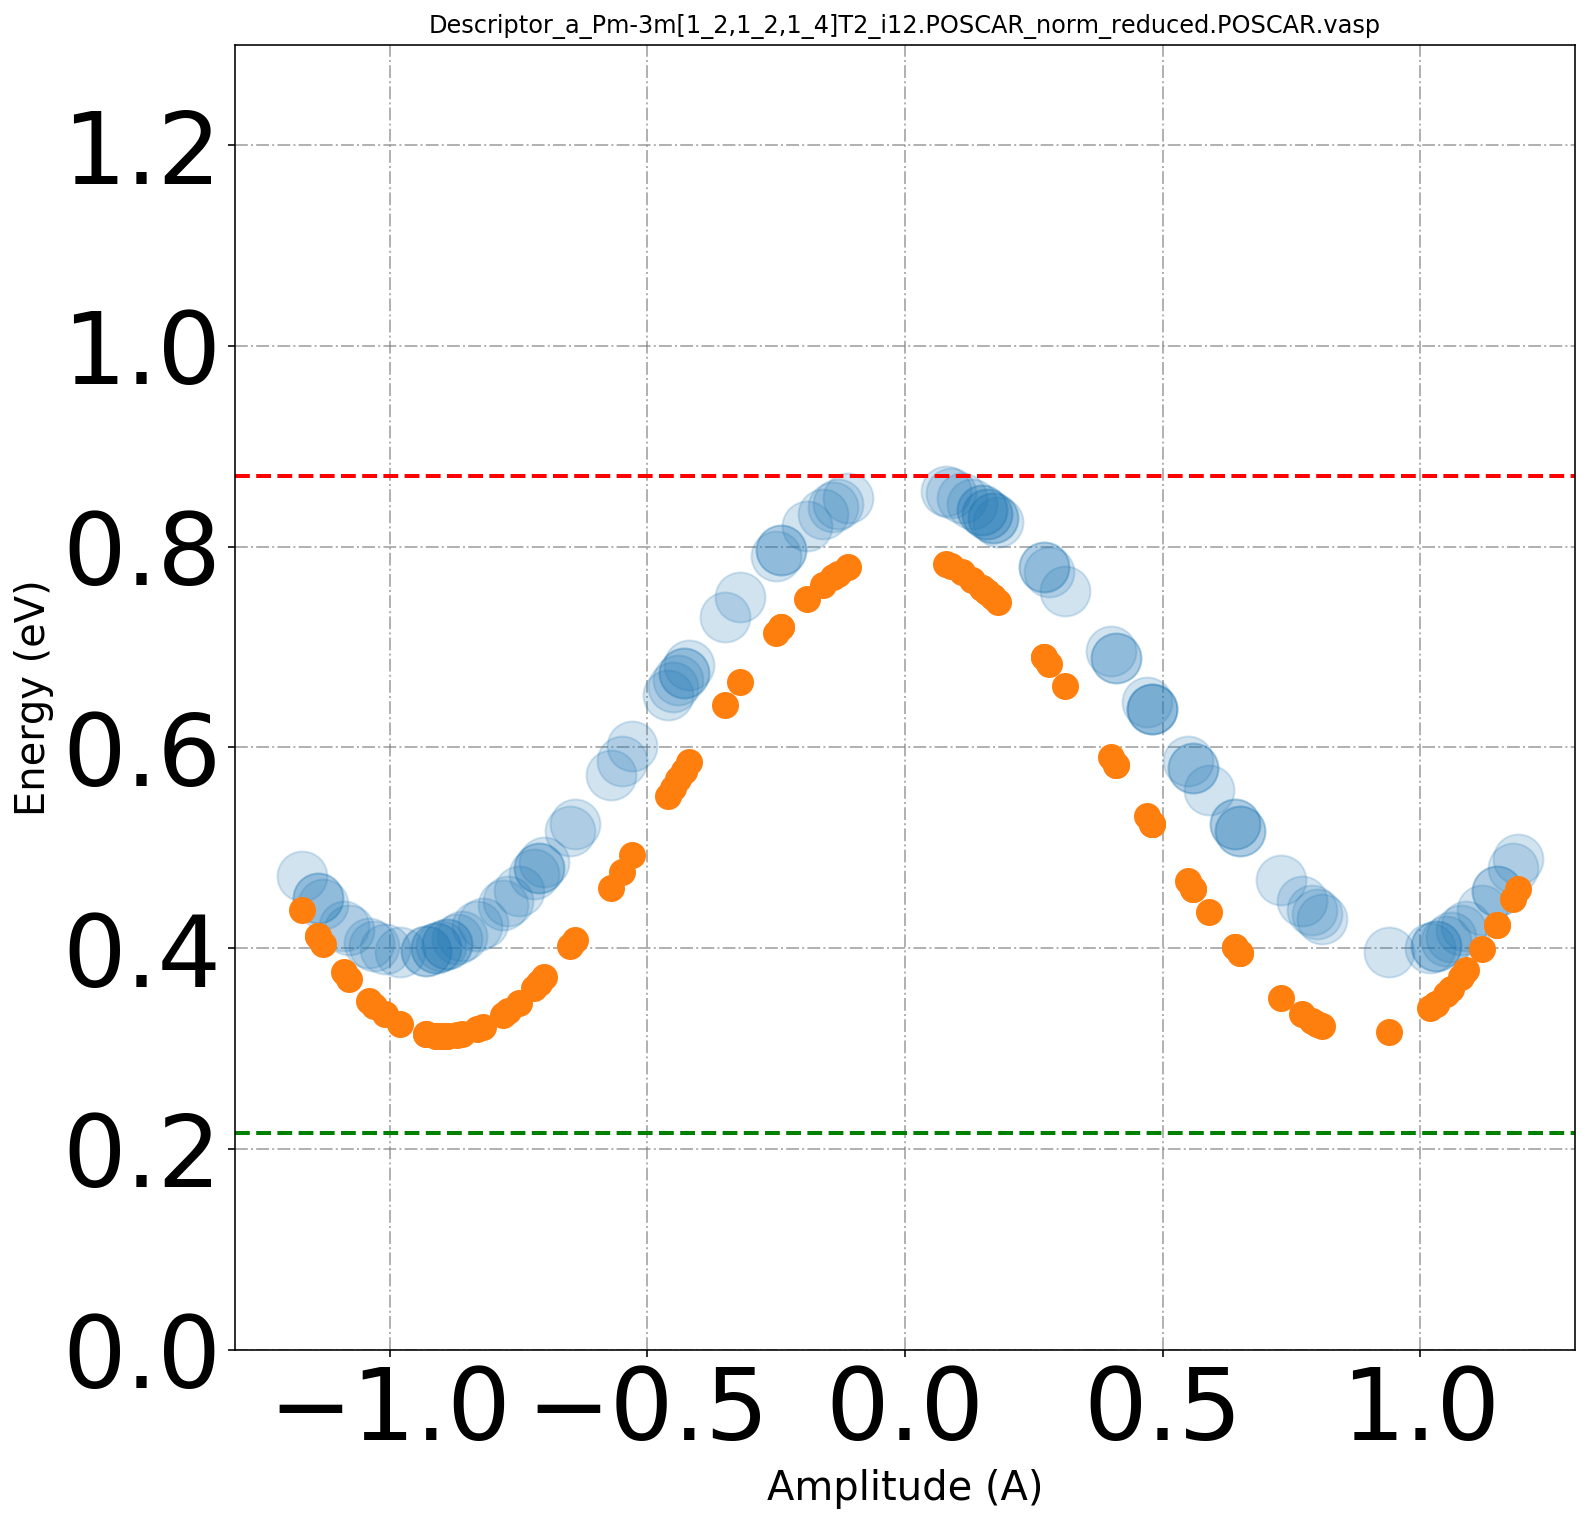

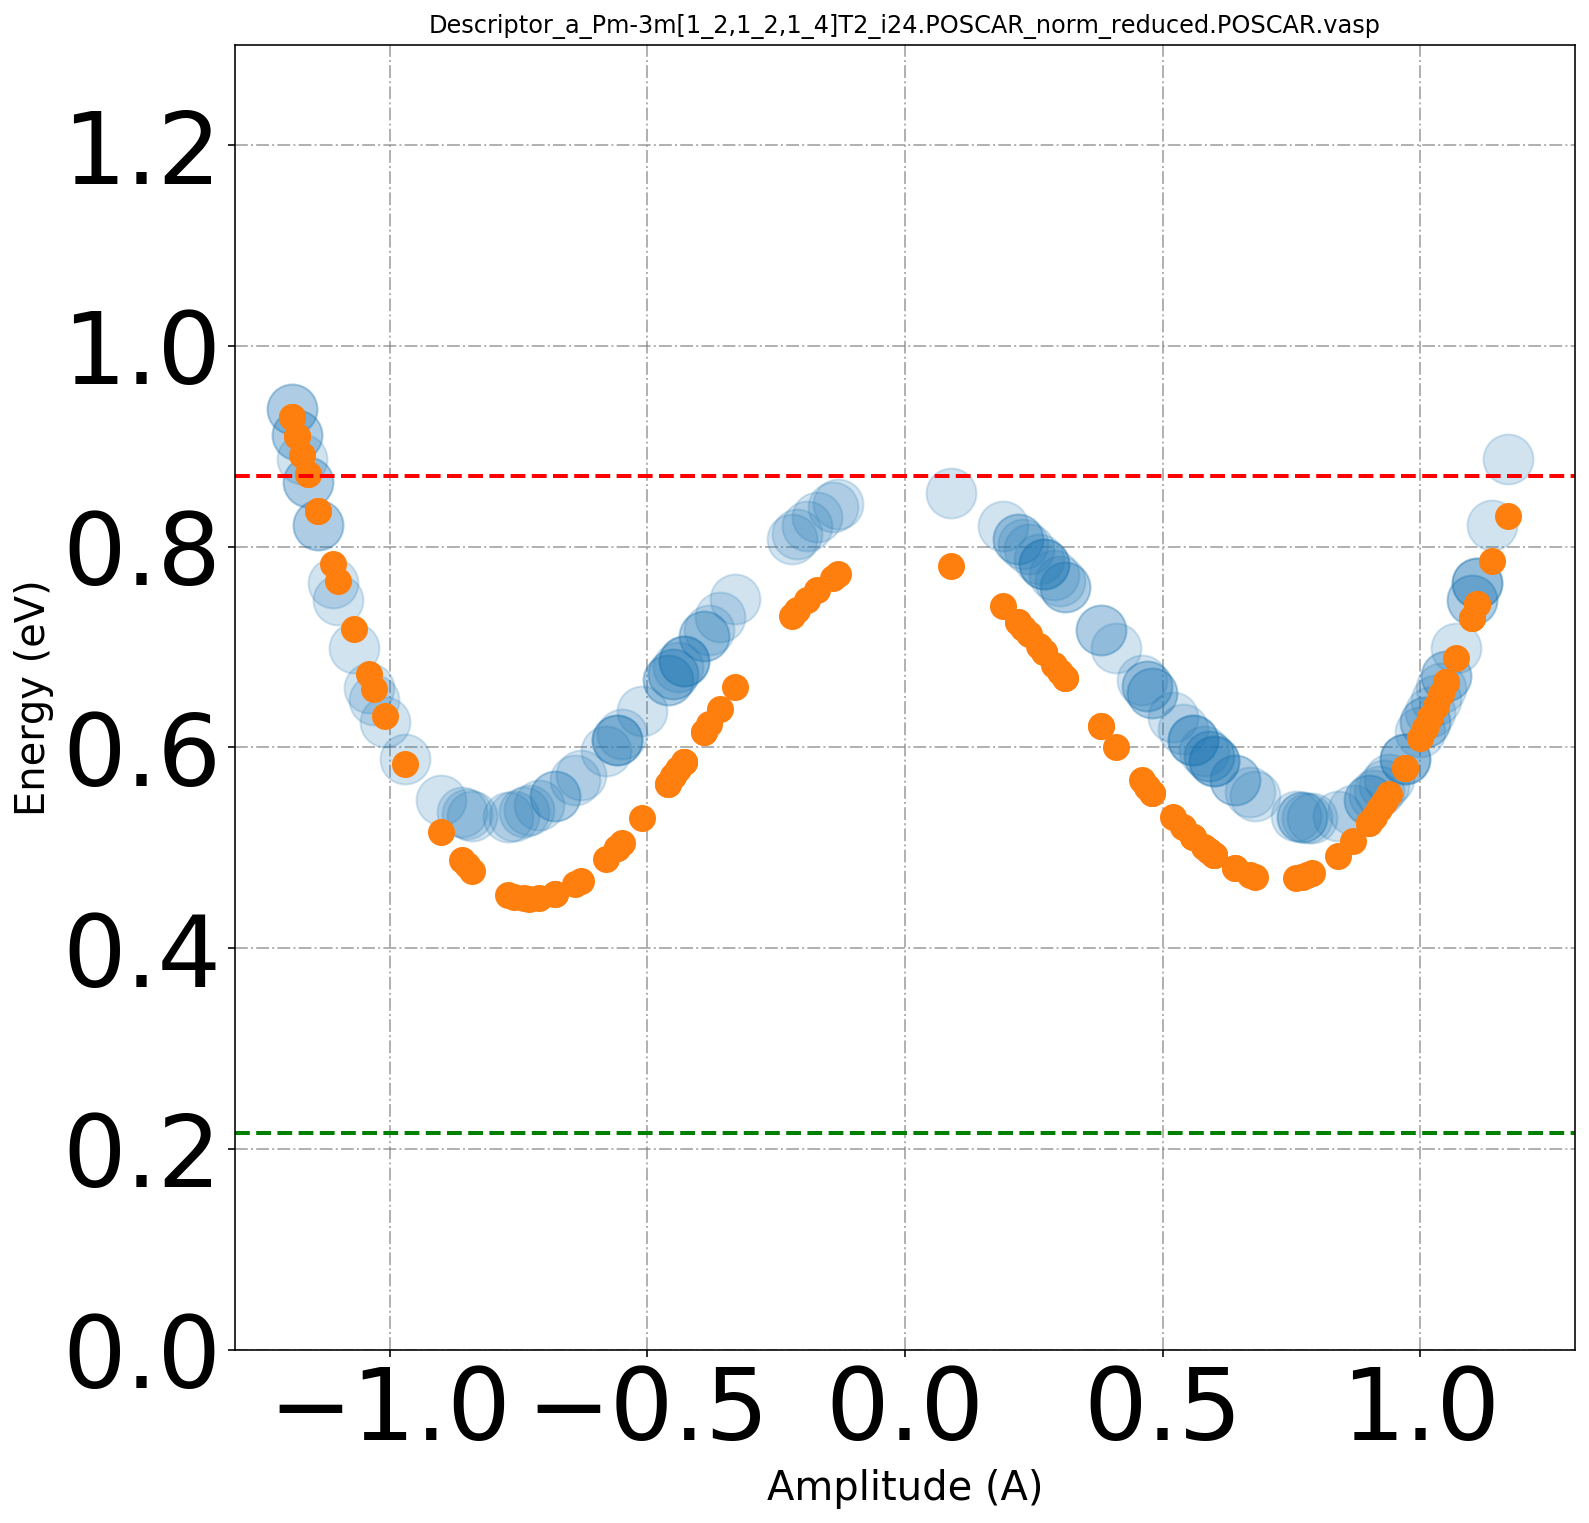

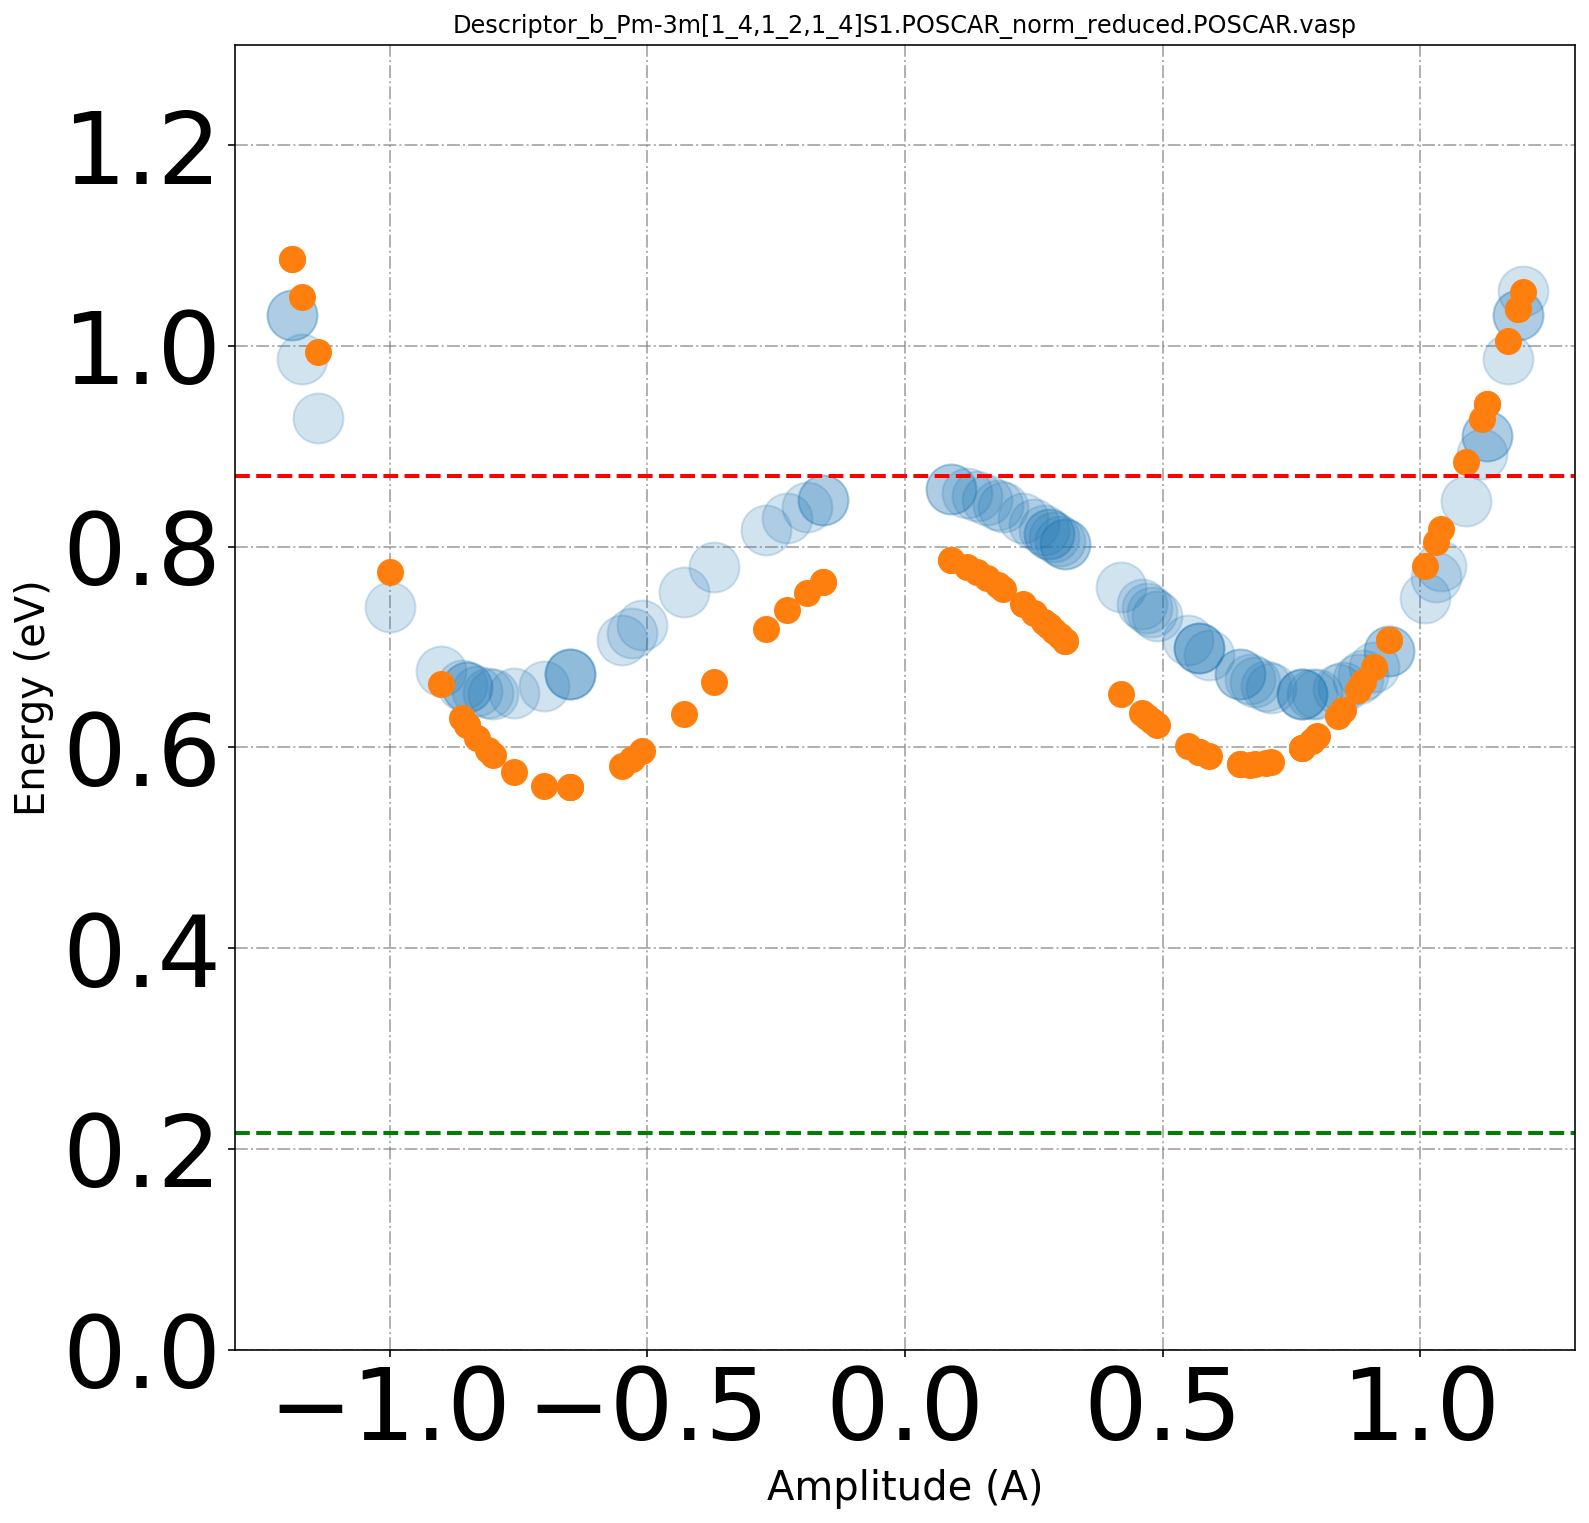

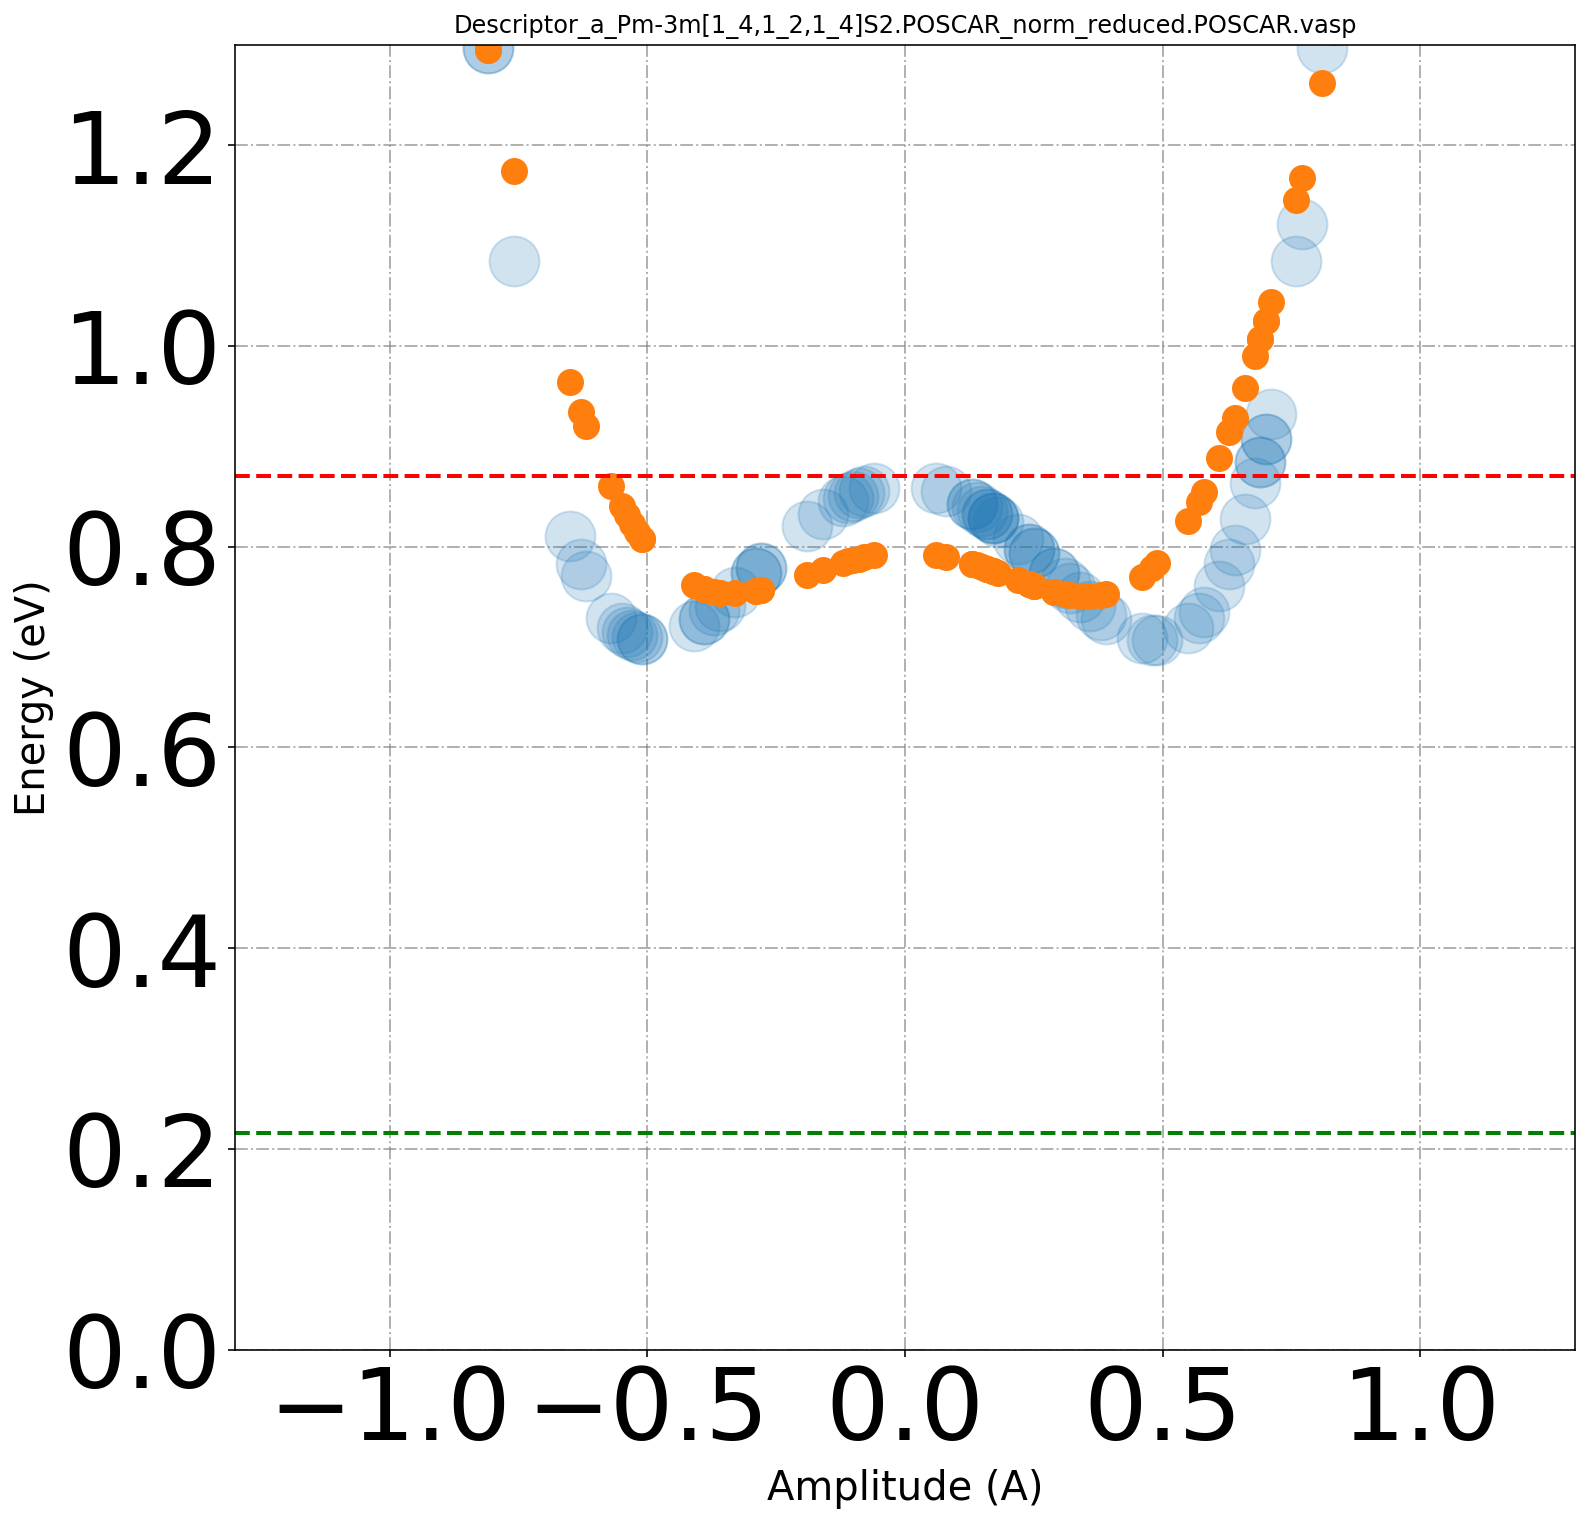

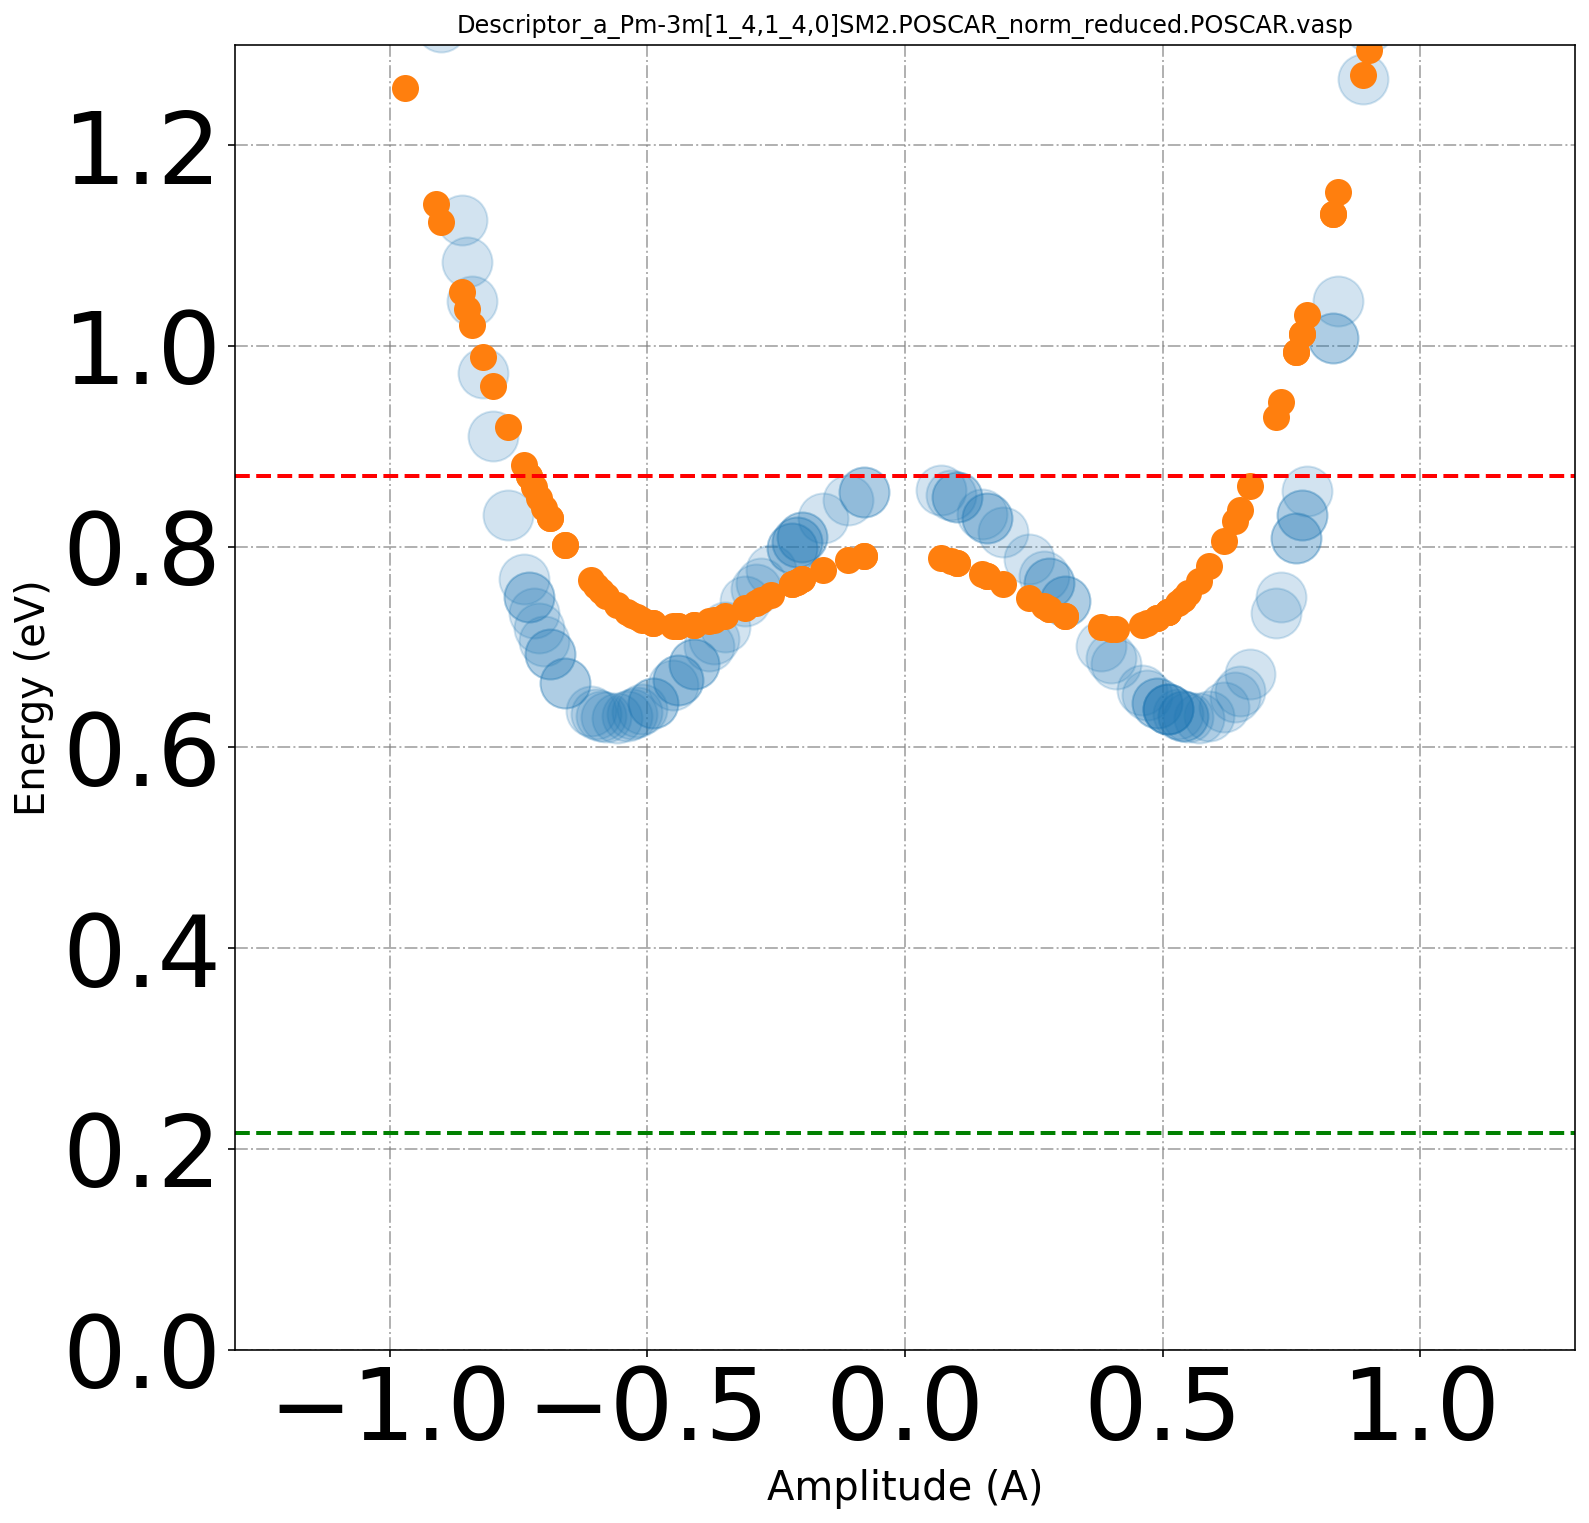

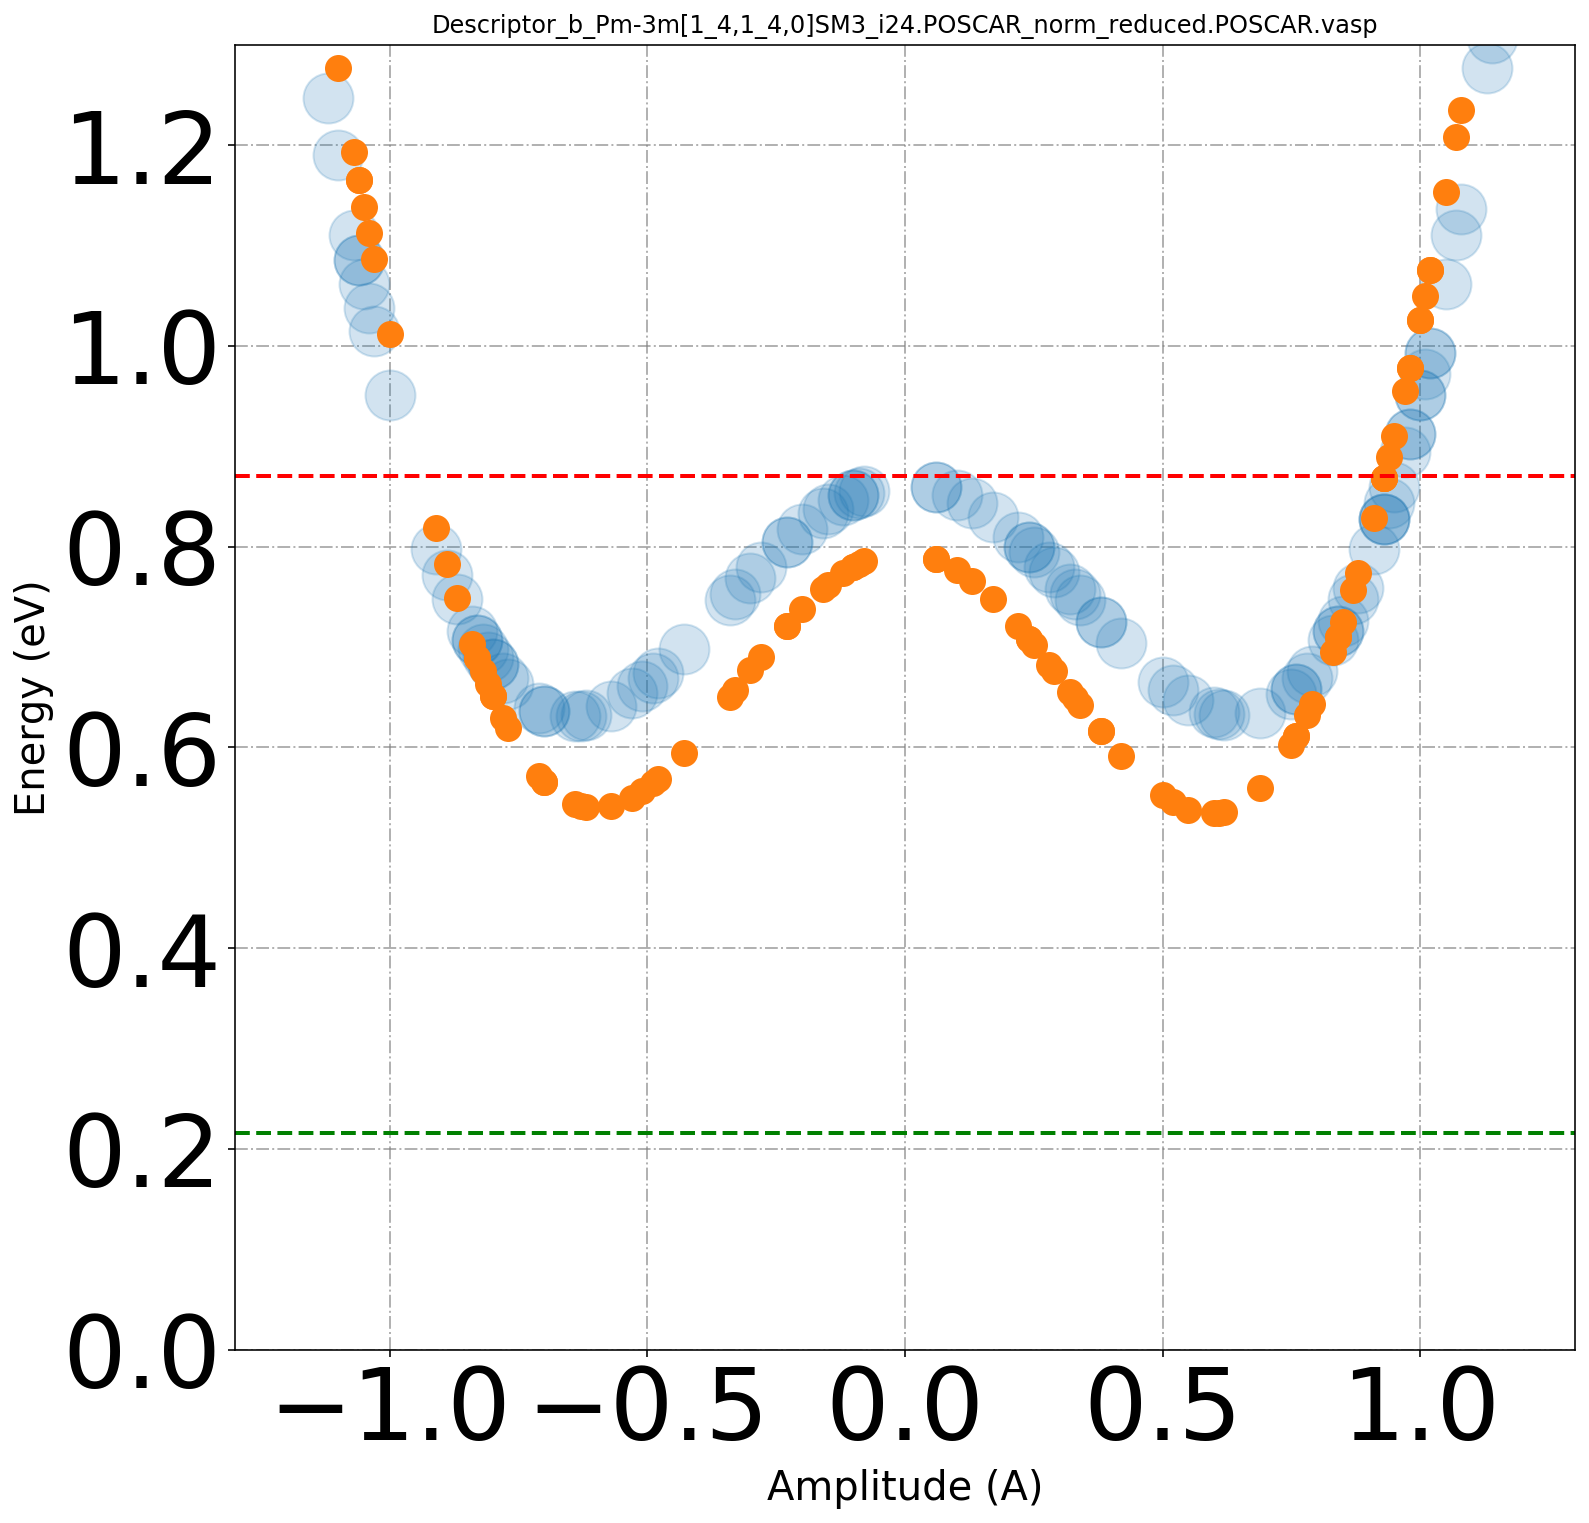

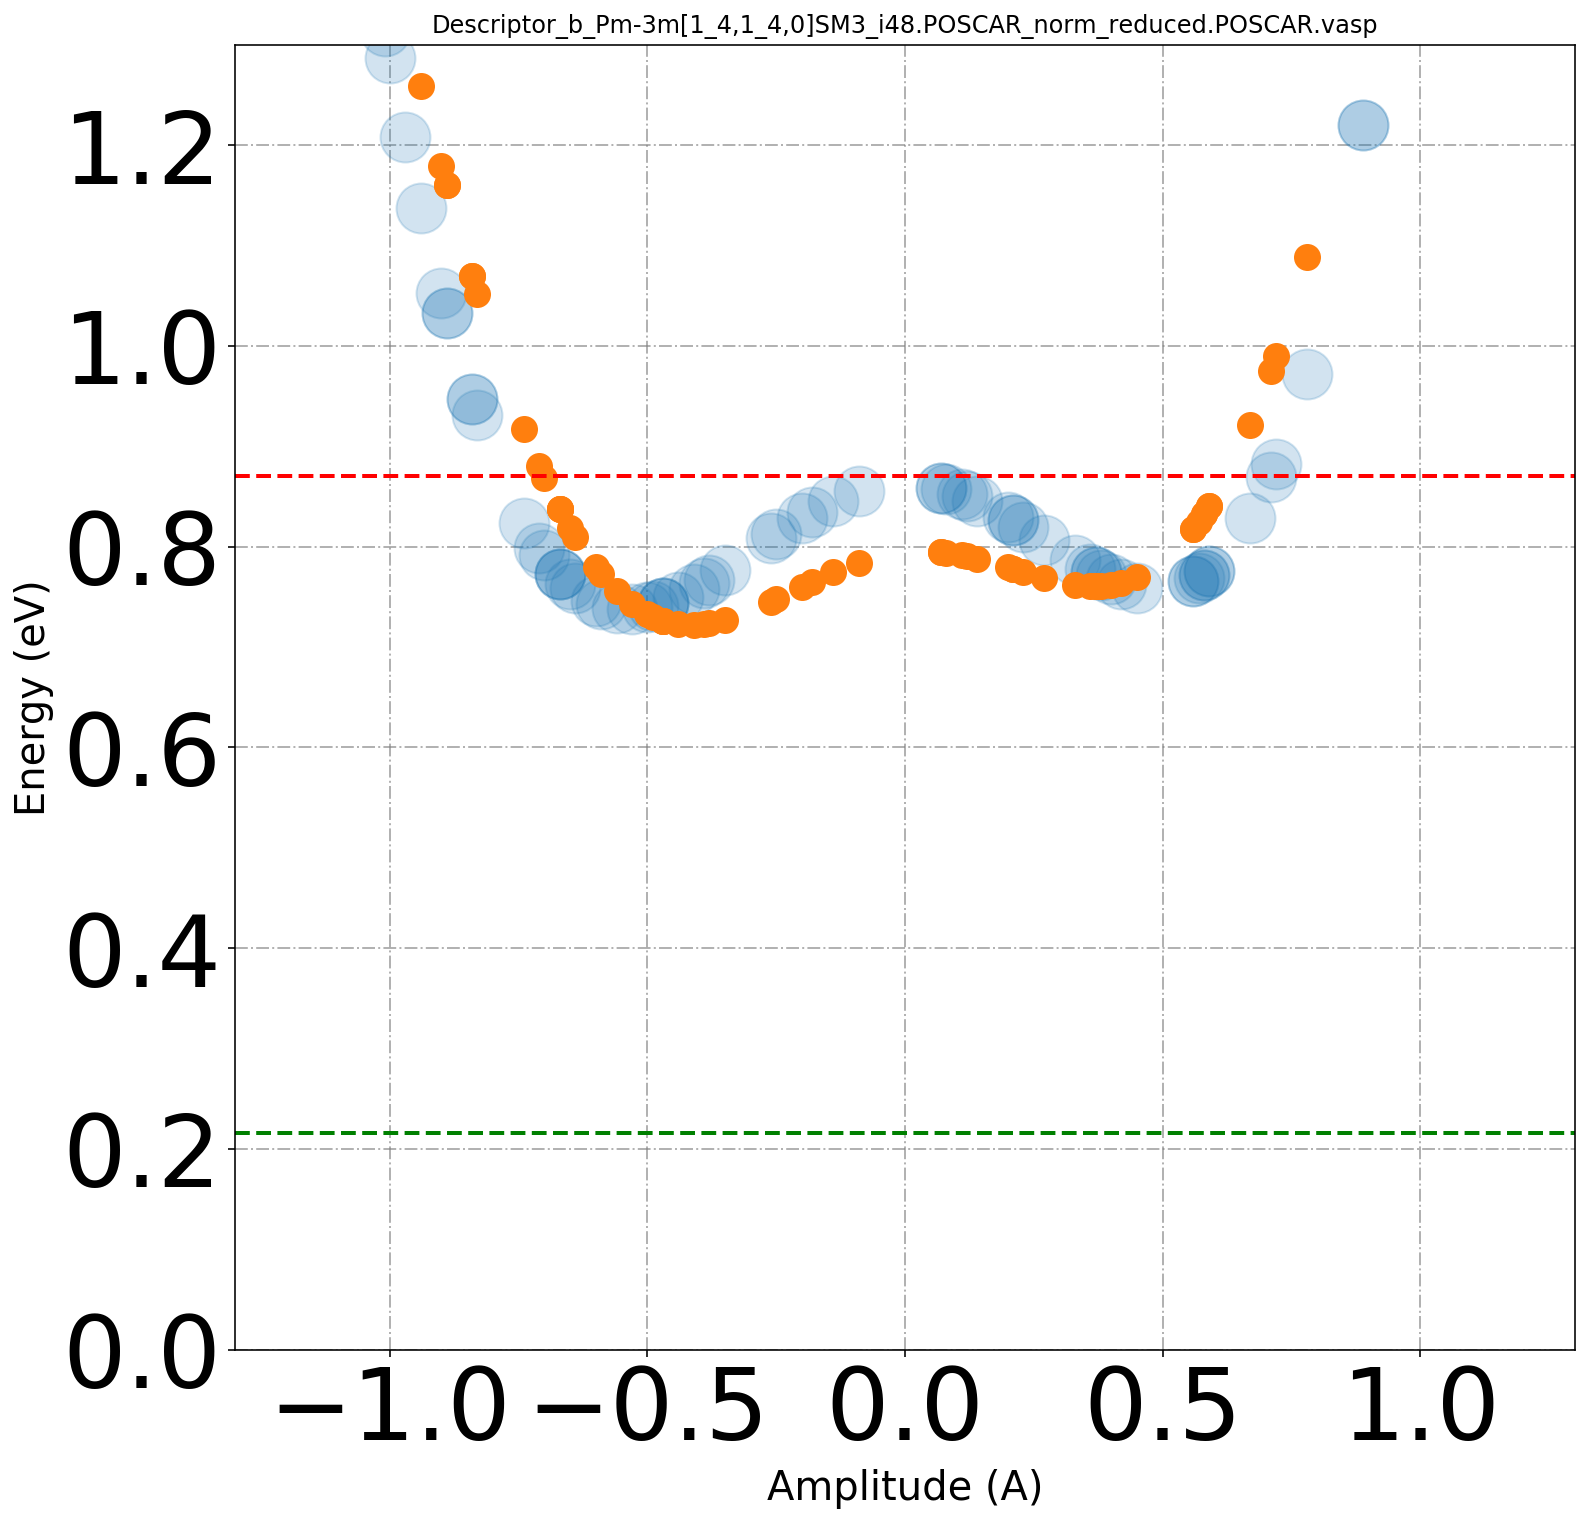

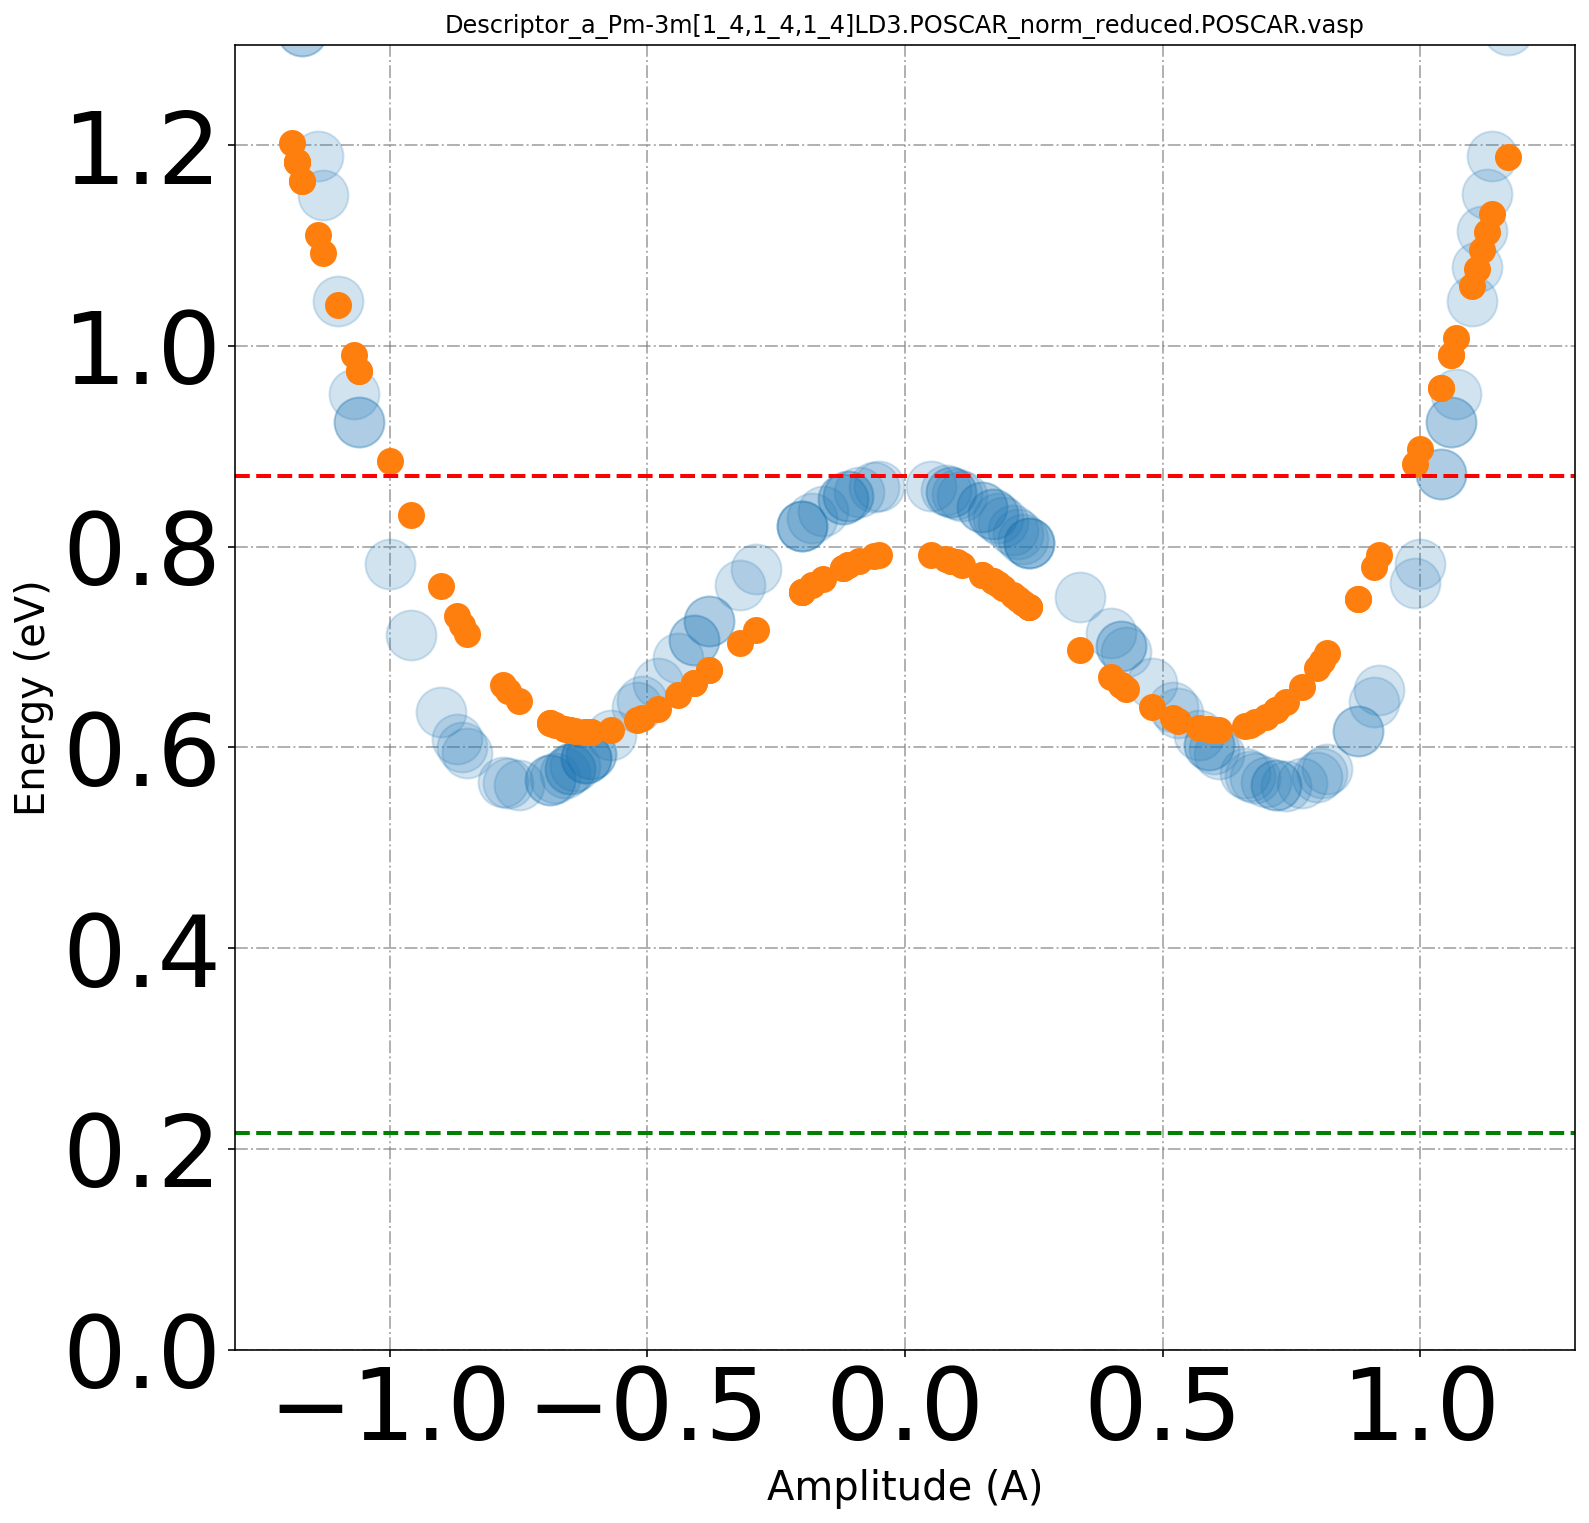

In [40]:
l = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12','M13','M14','M15','M16','M17','M18','M19','M20','M21']
incr = -1
rootdir = '.'
os.chdir(rootdir)

for i in l:
    incr = incr + 1
    fig,ax = plt.subplots(figsize=(12,12))
    axis_font = {'fontname':'Times', 'size':'20'}
    title_plot = list_files[incr]
    plt.title(title_plot)
    x_tmp = X_onemode[i]
    x_tmp_cut = x_tmp[abs(x_tmp) > 0.0001]
#    ax.scatter(x_tmp_cut, y_act_test_1[abs(x_tmp) > 0.0001] - ref_GS, edgecolors=(0, 0, 0), alpha = 0.2)
#    ax.scatter(x_tmp_cut, y_pred_test_1[abs(x_tmp) > 0.0001] - ref_GS, edgecolors=(1, 1, 1))
    plt.plot(x_tmp_cut, y_act_test_1[abs(x_tmp) > 0.0001] - ref_GS,'o',markersize=25,alpha= 0.2)
    plt.plot(x_tmp_cut, y_pred_test_1[abs(x_tmp) > 0.0001] - ref_GS,'.',markersize=25)
    plt.axhline(y=ref_cub-ref_GS,color='r', linestyle='--',lw=2)
    plt.axhline(y=ref_R3c_cub-ref_GS,color='g', linestyle='--',lw=2)
    #ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Amplitude (A)',fontsize = 20)
    ax.set_ylabel('Energy (eV)',fontsize= 20)
    plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1)
    ax.set_xlim([-1.3,1.3])
    ax.set_ylim([0,1.3])
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=50)
    plt.show()
    titl_fig = "Plot_1mode_" + title_plot + ".png"
    
    fig.savefig(titl_fig, dpi=300, bbox_inches='tight')